# Dataset at a glance and EDA Highlights of<br>The Office Story: That's what the data said.

# Analysis and Visualization of the show's dialogues and ratings dataset 

1) Performed data pre-processing, feature engineering and data analysis on a dataset having every dialogue from the popular American TV series “The Office” to summarize character stats, relationships and their influence on the popularity and success of the show (in terms of ratings and votes), presented through interactive visualizations. 

2) Goal - To determine what kind of questions can be answered from the show's script and ratings data analysis that can lead the makers to better data-driven decisions while investing in a season revival/reboot using pandas, plotly, d3graph and chord packages.

3) Two datasets are used - The dialogues dataset from theofficequotes.net and IMDB ratings dataset from Kaggle.

Author: Swarnita Venkatraman

Date: 15/12/2020

## 1) EDA 

## 1a) EDA for Dialogues dataset (df) 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

#reading file 1- dialogues dataset
df = pd.read_excel("the-office-lines.xlsx")

## Datasets at a glance:

In [2]:
df.head()#dialogues dataset

id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker  deleted  
0  All right Jim. Your quarterlies look very good...  Michael    False  
1         Oh, I told you. I couldn't close it. So...      Jim    False  
2  So you've come to the master for guidance? Is ...  Michael    False  
3         Actually, you called me in here, but yeah.      Jim    False  
4    All right. Well, let me show you how it's done.  Michael    False

In [250]:
#reading file 2 - IMDB ratings dataset 
df_imdb = pd.read_csv("TheOfficeIMDBPerEpisode.csv")

In [253]:
df_imdb.head() #IMDB ratings dataset

Season          Title     AirDate  Rating  Num_Votes  \
0       1          Pilot  2005-03-24     7.5       4349   
1       1  Diversity Day  2005-03-29     8.3       4213   
2       1    Health Care  2005-04-05     7.8       3536   
3       1   The Alliance  2005-04-12     8.1       3428   
4       1     Basketball  2005-04-19     8.4       3745   

                                         Description       DirectedBy  \
0  The premiere episode introduces the boss and s...       Ken Kwapis   
1  Michael's off color remark puts a sensitivity ...       Ken Kwapis   
2  Michael leaves Dwight in charge of picking the...  Ken Whittingham   
3  Just for a laugh, Jim agrees to an alliance wi...     Bryan Gordon   
4  Michael and his staff challenge the warehouse ...     Greg Daniels   

                                          WrittenBy  
0  Ricky Gervais |Stephen Merchant and Greg Daniels  
1                                       B. J. Novak  
2                                  Paul Lieberstein  
3                                     Michael Schur  
4                                      Greg Daniels

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59909 non-null  int64 
 1   season     59909 non-null  int64 
 2   episode    59909 non-null  int64 
 3   scene      59909 non-null  int64 
 4   line_text  59909 non-null  object
 5   speaker    59909 non-null  object
 6   deleted    59909 non-null  bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


In [4]:
df.shape

(59909, 7)

In [5]:
#column names
column_names = df.columns
print(column_names)
#column data types
df.dtypes
#check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Index(['id', 'season', 'episode', 'scene', 'line_text', 'speaker', 'deleted'], dtype='object')
id is unique: True
season is unique: False
episode is unique: False
scene is unique: False
line_text is unique: False
speaker is unique: False
deleted is unique: False


### EXPLORING DELETED SCENES DATA (column - "deleted")

In [6]:
df['deleted'].value_counts()#57973 lines spoken in the non-deleted scenes throughout the show

False    57973
True      1936
Name: deleted, dtype: int64

In [7]:
df[df['deleted']==True] #deleted scenes data - present from season 1 to season 3

id  season  episode  scene  \
229      230       1        1     40   
230      231       1        1     40   
231      232       1        1     40   
232      233       1        1     41   
233      234       1        1     41   
...      ...     ...      ...    ...   
13320  13321       3       12     40   
13321  13322       3       12     40   
13322  13323       3       12     40   
13323  13324       3       12     40   
13324  13325       3       12     40   

                                               line_text  speaker  deleted  
229    Dwight Schrute. My father's name, also Dwight ...   Dwight     True  
230    [holding up a Dundie and pretending it is talk...  Michael     True  
231    My name is Jim Halpert and I am a sales rep, w...      Jim     True  
232    Pam! Pam-Pam! Pam has been with us for...  for...  Michael     True  
233                                             I guess.      Pam     True  
...                                                  ...      ...      ...  
13320                Yeah. Can I see it when I get back?      Jim     True  
13321                                              Yeah.      Pam     True  
13322                                   Congratulations.      Jim     True  
13323                                            Thanks.      Pam     True  
13324                                          Big deal.      Jim     True  

[1936 rows x 7 columns]

In [8]:
#isolating only single scenes wise data
df_del=df.drop_duplicates(['season','episode','scene','deleted'])
df_del

id  season  episode  scene  \
0          1       1        1      1   
5          6       1        1      2   
6          7       1        1      3   
15        16       1        1      4   
16        17       1        1      5   
...      ...     ...      ...    ...   
59904  59905       9       23    112   
59905  59906       9       23    113   
59906  59907       9       23    114   
59907  59908       9       23    115   
59908  59909       9       23    116   

                                               line_text   speaker  deleted  
0      All right Jim. Your quarterlies look very good...   Michael    False  
5      [on the phone] Yes, I'd like to speak to your ...   Michael    False  
6      I've, uh, I've been at Dunder Mifflin for 12 y...   Michael    False  
15     People say I am the best boss. They go, 'God w...   Michael    False  
16     [singing] Shall I play for you? Pa rum pump um...    Dwight    False  
...                                                  ...       ...      ...  
59904  It all seems so very arbitrary. I applied for ...     Creed    False  
59905  I just feel lucky that I got a chance to share...  Meredith    False  
59906  I���m happy that this was all filmed so I can ...   Phyllis    False  
59907  I sold paper at this company for 12 years. My ...       Jim    False  
59908  I thought it was weird when you picked us to m...       Pam    False  

[9161 rows x 7 columns]

In [9]:
df_del.groupby('season')['deleted'].value_counts().to_dict()#season wise breakdown

{(1, False): 238,
 (1, True): 68,
 (2, False): 1053,
 (2, True): 239,
 (3, False): 1386,
 (3, True): 5,
 (4, False): 882,
 (5, False): 1130,
 (6, False): 1023,
 (7, False): 1002,
 (8, False): 1027,
 (9, False): 1108}

In [10]:
df_del.groupby('season')['deleted'].value_counts().tolist()

[238, 68, 1053, 239, 1386, 5, 882, 1130, 1023, 1002, 1027, 1108]

In [11]:
df_del['deleted'].value_counts().values #8849 non-deleted scenes, 312 deleted scenes

array([8849,  312], dtype=int64)

##### Visualizing percent of deleted scenes :

In [12]:
import numpy as np
import plotly.graph_objects as go

labels=['Not deleted','Deleted']
values=df_del['deleted'].value_counts().values

colors = ['rgb(33, 75, 99)', 'brickred']

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             text = [[238, 1053,1386, 882, 1130, 1023, 1002, 1027, 1108],[68,239,5]],
                             customdata=np.array(("1-9","1-3")),
                             hovertemplate = "%{value} scenes distributed between <br>Seasons %{customdata[0]} as %{text}<extra></extra> ")])

fig1.update_traces(textfont_size=14,textposition='outside', textinfo='label+percent',
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))

fig1.update_layout(
        
    hoverlabel_align = 'left',
    width=1000,height=500,
    showlegend=False,
    autosize=False,    


    title={
        'text': "The Office - Distribution of deleted scenes",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    })
fig1.show()

After visualizing using a pie chart, I used a Sunburst chart since I also wanted to visualize season-wise number of deleted scenes.

In [13]:
import plotly.graph_objects as go
from chart_studio import plotly
from plotly.offline import plot

fig2 =go.Figure(go.Sunburst(
     ids=[
    "Deleted", "Not deleted", "Deleted-Season 1", "Deleted-Season 2", "Deleted-Season 3",
    "Not deleted - Season 1", "Not deleted - Season 2", "Not deleted - Season 3",
    "Not deleted - Season 4","Not deleted - Season 5", "Not deleted - Season 6",
    "Not deleted - Season 7", "Not deleted - Season 8", "Not deleted - Season 9"
  ],

  labels= ["Deleted", "Not deleted", "Season 1", "Season 2","Season 3","Season 1", "Season 2", "Season 3",
      "Season 4","Season 5","Season 6","Season 7","Season 8","Season 9"
  ],
  parents=[
    "", "", "Deleted", "Deleted","Deleted","Not deleted","Not deleted","Not deleted",
    "Not deleted","Not deleted","Not deleted","Not deleted","Not deleted","Not deleted"  
  ],
  values= [312, 8849, 68, 239, 5, 238, 1053,1386, 882, 1130, 1023, 1002, 1027, 1108],
    branchvalues="total"
))


colors = ['rgb(175, 51, 21)','rgb(56, 75, 126)']
 
fig2.update_traces(textfont_size=12,textinfo='label+percent parent',text=['scenes']*14,hoverinfo='value+text',
                  marker_colors=colors,
                  marker=dict(line=dict(color='#000000', width=1.5)))
fig2.update_layout(
         annotations=[
            dict(
                text='Click on any of center slices to expand.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.9,
                y=0.01,
                #bordercolor='blue',
                #borderwidth=0.6,
                font=dict(
                family="Arial",
                size=12,
            ),    
            ),    
    
        ],
        margin = dict(t=10, l=0, r=0, b=10),
        hoverlabel_align = 'left',
        width=1000,height=550,
        showlegend=False,
    title={
        'text': "The Office - Distribution of deleted scenes",
        'y':0.99,
        'x':0.01,
        'xanchor': 'left',
        'yanchor': 'top'    })
fig2.show()

The show has 9 seasons in total. As seen from the percentage value, number of non-deleted scenes are almost evenly distributed among all seasons except season 1 where it is lowest and season 3 where it is highest. This dataset has deleted scenes only upto season 3. Highest chunk of deleted scenes belong to season 2.

##### Filtering out deleted scenes :


In [14]:
df = df[df['deleted'] == False] 

In [15]:
df.head()

id  season  episode  scene  \
0   1       1        1      1   
1   2       1        1      1   
2   3       1        1      1   
3   4       1        1      1   
4   5       1        1      1   

                                           line_text  speaker  deleted  
0  All right Jim. Your quarterlies look very good...  Michael    False  
1         Oh, I told you. I couldn't close it. So...      Jim    False  
2  So you've come to the master for guidance? Is ...  Michael    False  
3         Actually, you called me in here, but yeah.      Jim    False  
4    All right. Well, let me show you how it's done.  Michael    False

In [16]:
df.shape

(57973, 7)

### Dropping columns "id" and "deleted" 

In [17]:
# Create list of the columns to drop
columns_to_drop = [column_names[i] for i in [0, 6]]
# Drop unwanted columns
df.drop(columns_to_drop, inplace=True, axis=1)

In [18]:
df.head()

season  episode  scene                                          line_text  \
0       1        1      1  All right Jim. Your quarterlies look very good...   
1       1        1      1         Oh, I told you. I couldn't close it. So...   
2       1        1      1  So you've come to the master for guidance? Is ...   
3       1        1      1         Actually, you called me in here, but yeah.   
4       1        1      1    All right. Well, let me show you how it's done.   

   speaker  
0  Michael  
1      Jim  
2  Michael  
3      Jim  
4  Michael

### Checking if there are any missing values 

In [19]:
df.isnull().sum()

season       0
episode      0
scene        0
line_text    0
speaker      0
dtype: int64

### EXPLORING EPISODES DATA (column = "episode")

##### Number of episodes per season:

In [20]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

In [21]:
seasons=df['season'].unique().tolist() #storing seasons in a list

In [22]:
episodes=df.groupby('season')['episode'].nunique().tolist() #storing number of episodes season-wise in a list

## Summary of Datasets:

In [291]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Lines', x=seasons, y=episodes,text=episodes,textposition='auto'),
])
fig.update_layout(title="Season-wise episodes distribution")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of episodes")
fig.show()

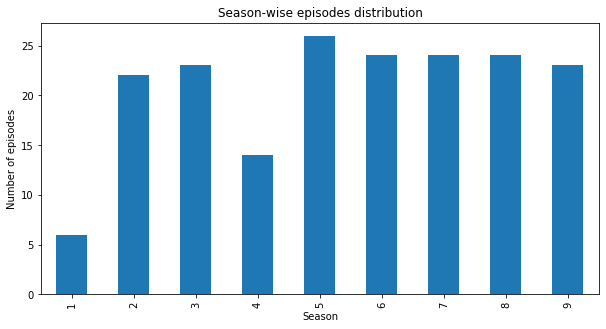

In [307]:
df.groupby('season')['episode'].nunique().plot(kind='bar',figsize=(10, 5))
plt.title(label="Season-wise episodes distribution")
plt.xlabel('Season')
plt.ylabel('Number of episodes')
plt.show()

Season 5 has highest number of episodes while season 1 has lowest. Season 4 has only 14 episodes as the show had to stop production in November 2007 due to a writer’s strike when it was being shot.

### EXPLORING SCENES DATA(column - "scene")

##### Number of scenes per season:

In [24]:
df_scenes = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene'],keep='first')
df_scenes

season  episode  scene  \
0           1        1      1   
5           1        1      2   
6           1        1      3   
15          1        1      4   
16          1        1      5   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                               line_text   speaker  
0      All right Jim. Your quarterlies look very good...   Michael  
5      [on the phone] Yes, I'd like to speak to your ...   Michael  
6      I've, uh, I've been at Dunder Mifflin for 12 y...   Michael  
15     People say I am the best boss. They go, 'God w...   Michael  
16     [singing] Shall I play for you? Pa rum pump um...    Dwight  
...                                                  ...       ...  
59904  It all seems so very arbitrary. I applied for ...     Creed  
59905  I just feel lucky that I got a chance to share...  Meredith  
59906  I���m happy that this was all filmed so I can ...   Phyllis  
59907  I sold paper at this company for 12 years. My ...       Jim  
59908  I thought it was weird when you picked us to m...       Pam  

[8849 rows x 5 columns]

In [25]:
df_scenes.groupby(['season','episode'])['scene'].count()

season  episode
1       1           39
        2           35
        3           39
        4           49
        5           40
                  ... 
9       19          49
        20          46
        21          53
        22          70
        23         116
Name: scene, Length: 186, dtype: int64

In [26]:
df_scenes.groupby(['season','episode'])['scene'].count().nlargest()
#largest from season 4 cus it had lesser episodes hence more scenes maybe

season  episode
5       1          116
9       23         116
4       14         103
        1           92
        4           92
Name: scene, dtype: int64

In [27]:
df_scenes.groupby(['season','episode'])['scene'].count().nsmallest()

season  episode
6       13         21
8       20         25
7       14         26
        16         26
5       12         27
Name: scene, dtype: int64

In [28]:
ff = df_scenes.pivot_table(index='season', columns='episode', values='scene',aggfunc='count')
ff.head()

episode     1     2     3     4     5     6     7     8     9     10  ...  \
season                                                                ...   
1         39.0  35.0  39.0  49.0  40.0  36.0   NaN   NaN   NaN   NaN  ...   
2         62.0  45.0  50.0  53.0  43.0  37.0  44.0  41.0  38.0  70.0  ...   
3         61.0  51.0  66.0  55.0  60.0  52.0  51.0  76.0  32.0  88.0  ...   
4         92.0  80.0  90.0  92.0  46.0  50.0  61.0  46.0  31.0  49.0  ...   
5        116.0  30.0  49.0  50.0  54.0  51.0  36.0  29.0  30.0  49.0  ...   

episode    17    18    19    20    21    22    23    24    25    26  
season                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2        45.0  44.0  42.0  39.0  59.0  57.0   NaN   NaN   NaN   NaN  
3        61.0  57.0  59.0  75.0  60.0  77.0  88.0   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5        32.0  35.0  46.0  40.0  39.0  46.0  32.0  35.0  54.0  42.0  

[5 rows x 26 columns]

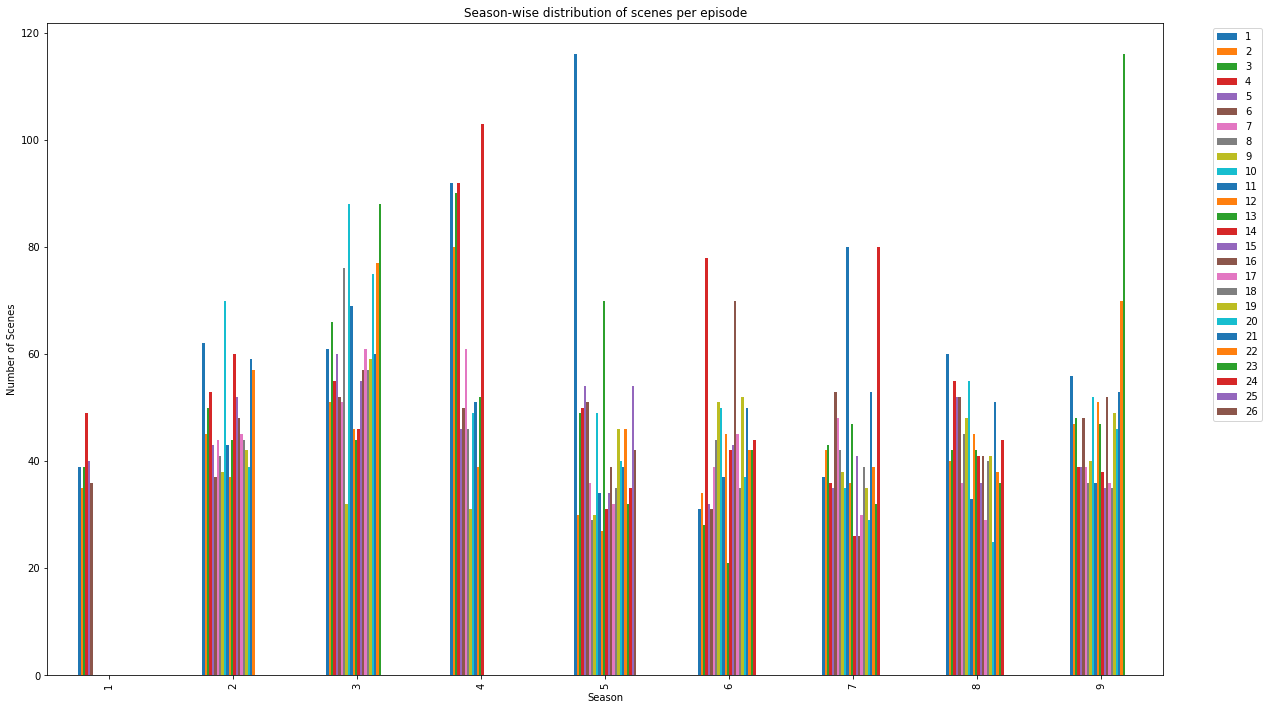

In [29]:
import matplotlib.pyplot as plt
ff.plot(kind='bar',figsize=(20,12),title="Season-wise distribution of scenes per episode")
plt.xlabel('Season')
plt.ylabel('Number of Scenes')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [30]:
df_scenes_t=ff.sum(axis=1)
df_scenes_t

season
1     238.0
2    1053.0
3    1386.0
4     882.0
5    1130.0
6    1023.0
7    1002.0
8    1027.0
9    1108.0
dtype: float64

<AxesSubplot:xlabel='season'>

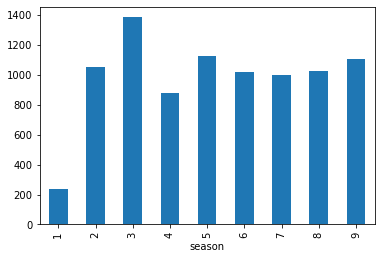

In [31]:
df_scenes_t.plot(kind='bar')

Season 3 has overall highest number of scenes followed by Season 5. Seasons 1 and 4 comparatively have lesser scenes owing to lesser number of episodes.  Also as confirmed from non-deleted scenes distribution. Highest peaks seen during seasons 5 and 9.

### EXPLORING LINES DATA (column - "line_text")

##### Number of lines per season:

In [32]:
df.groupby(['season','episode'])['line_text'].count()

season  episode
1       1          229
        2          217
        3          244
        4          265
        5          235
                  ... 
9       19         273
        20         234
        21         382
        22         501
        23         522
Name: line_text, Length: 186, dtype: int64

In [33]:
df.groupby(['season','episode'])['line_text'].count().nlargest() #again season 4 features here thrice in top 5

season  episode
6       16         625
4       14         617
        2          615
7       11         598
4       3          597
Name: line_text, dtype: int64

In [34]:
df.groupby(['season','episode'])['line_text'].count().nsmallest()

season  episode
7       16          72
6       13         131
3       1          173
        15         180
        9          191
Name: line_text, dtype: int64

In [35]:
df.groupby('season')['line_text'].count().sum() #total number of lines spoken in the show

57973

In [36]:
fff = df.pivot_table(index='season', columns='episode', values='line_text',aggfunc='count')
fff

episode     1      2      3      4      5      6      7      8      9      10  \
season                                                                          
1        229.0  217.0  244.0  265.0  235.0  346.0    NaN    NaN    NaN    NaN   
2        279.0  283.0  287.0  319.0  276.0  278.0  254.0  284.0  275.0  292.0   
3        173.0  335.0  291.0  313.0  312.0  279.0  260.0  584.0  191.0  547.0   
4        560.0  615.0  597.0  557.0  269.0  324.0  274.0  300.0  331.0  276.0   
5        569.0  265.0  311.0  311.0  435.0  417.0  325.0  298.0  323.0  240.0   
6        332.0  268.0  303.0  552.0  353.0  315.0  319.0  367.0  247.0  267.0   
7        240.0  268.0  229.0  321.0  390.0  284.0  286.0  278.0  307.0  310.0   
8        274.0  320.0  317.0  267.0  291.0  324.0  321.0  282.0  299.0  352.0   
9        225.0  296.0  243.0  316.0  292.0  283.0  294.0  322.0  287.0  253.0   

episode  ...     17     18     19     20     21     22     23     24     25  \
season   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...  220.0  267.0  250.0  213.0  257.0  385.0    NaN    NaN    NaN   
3        ...  340.0  356.0  386.0  398.0  323.0  365.0  544.0    NaN    NaN   
4        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...  311.0  297.0  267.0  309.0  256.0  298.0  288.0  319.0  298.0   
6        ...  279.0  281.0  359.0  267.0  328.0  308.0  326.0  245.0    NaN   
7        ...  313.0  290.0  244.0  262.0  329.0  265.0  257.0  494.0    NaN   
8        ...  259.0  264.0  261.0  307.0  292.0  239.0  288.0  295.0    NaN   
9        ...  219.0  318.0  273.0  234.0  382.0  501.0  522.0    NaN    NaN   

episode     26  
season          
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5        273.0  
6          NaN  
7          NaN  
8          NaN  
9          NaN  

[9 rows x 26 columns]

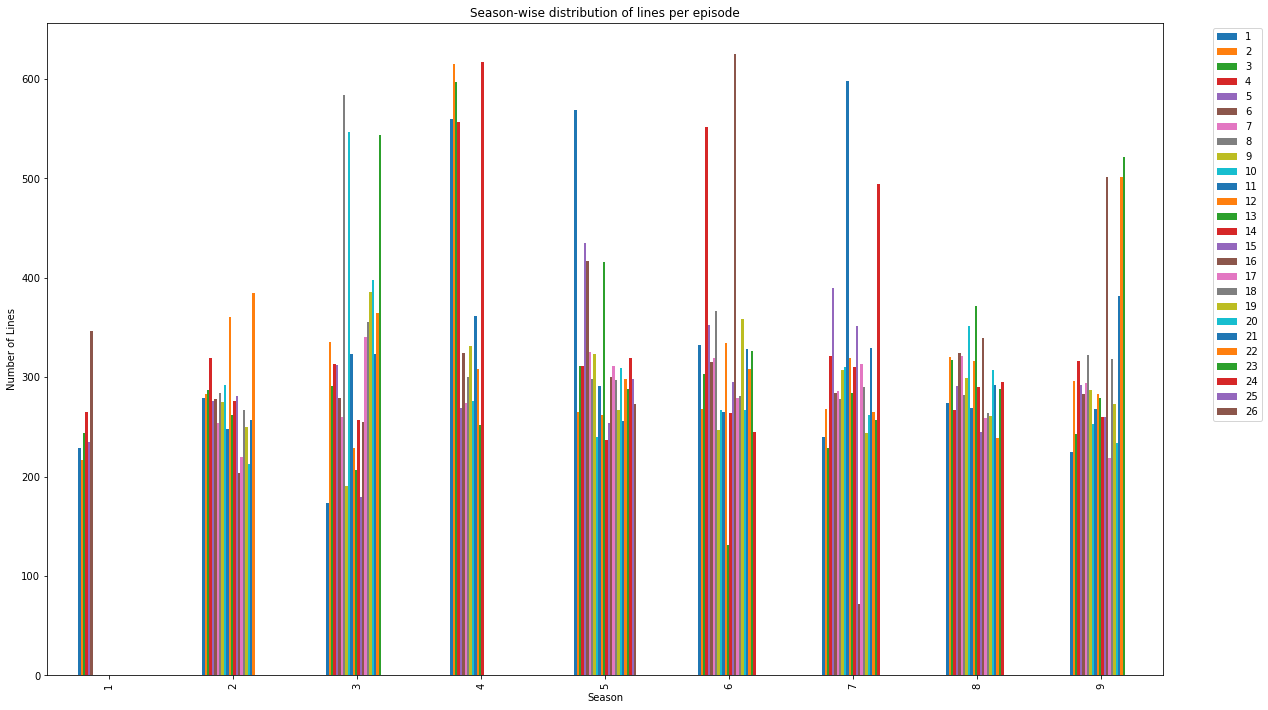

In [37]:
fff.plot(kind='bar',figsize=(20,12),title="Season-wise distribution of lines per episode")
plt.xlabel('Season')
plt.ylabel('Number of Lines')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [38]:
df.groupby('season')['line_text'].count()

season
1    1536
2    6051
3    7448
4    5642
5    8170
6    7630
7    7302
8    7083
9    7111
Name: line_text, dtype: int64

<AxesSubplot:xlabel='season'>

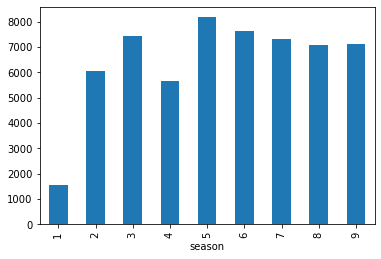

In [39]:
df.groupby('season')['line_text'].count().plot(kind='bar')

Season 5 (with the highest episodes) had the highest number of lines followed by season 6. Although season 3 had the highest number of scenes it appears third on the list of highest number of lines. Confirms that more scenes does not necessarily mean more lines in a season.

### EXPLORING SPEAKERS DATA (column - "speaker")

In [40]:
df['speaker'].nunique()

790

In [41]:
df.groupby('season')['speaker'].nunique()

season
1     31
2    125
3    120
4    117
5    145
6    151
7    155
8    136
9    194
Name: speaker, dtype: int64

<AxesSubplot:xlabel='season'>

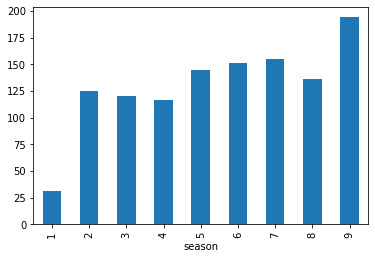

In [42]:
df.groupby('season')['speaker'].nunique().plot(kind='bar')

In [43]:
df['speaker'].value_counts()#max lines

Michael                            11574
Dwight                              7167
Jim                                 6609
Pam                                 5205
Andy                                3968
                                   ...  
Blogger 2                              1
HCT Member #1                          1
Meredith, Creed, Oscar and Matt        1
Co-worker #2                           1
Man in Video                           1
Name: speaker, Length: 790, dtype: int64

Season 9 has the highest number of unique speakers probably because it was the last season, season 7 comes second. Top 5 characters with maximum lines include Michael,Dwight,Jim,Pam and Andy.

##### Number of scenes each character appeared in every season:

In [44]:
dff1 = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene','speaker'],keep='first')
dff1#singled out every character's appearance per scene

season  episode  scene  \
0           1        1      1   
1           1        1      1   
5           1        1      2   
6           1        1      3   
7           1        1      3   
...       ...      ...    ...   
59904       9       23    112   
59905       9       23    113   
59906       9       23    114   
59907       9       23    115   
59908       9       23    116   

                                               line_text   speaker  
0      All right Jim. Your quarterlies look very good...   Michael  
1             Oh, I told you. I couldn't close it. So...       Jim  
5      [on the phone] Yes, I'd like to speak to your ...   Michael  
6      I've, uh, I've been at Dunder Mifflin for 12 y...   Michael  
7                                    Well. I don't know.       Pam  
...                                                  ...       ...  
59904  It all seems so very arbitrary. I applied for ...     Creed  
59905  I just feel lucky that I got a chance to share...  Meredith  
59906  I���m happy that this was all filmed so I can ...   Phyllis  
59907  I sold paper at this company for 12 years. My ...       Jim  
59908  I thought it was weird when you picked us to m...       Pam  

[21016 rows x 5 columns]

In [45]:
df_char_scene = dff1.pivot_table(index='speaker', columns=['season','episode'], values='scene',aggfunc='count')
#applying threshold of min 19 episodes to include characters appearing in atleast 10% of total 186 episodes
df_char_scene=df_char_scene.dropna(axis=0,how='any',thresh=19)
df_char_scene

season       1                                   2                    ...  \
episode     1     2     3     4     5     6     1     2     3     4   ...   
speaker                                                               ...   
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andy       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angela     1.0   1.0   3.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0  ...   
Clark      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Creed      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Darryl     NaN   NaN   NaN   NaN   7.0   NaN   1.0   2.0   NaN   NaN  ...   
David      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Dwight    10.0   6.0  16.0  24.0   9.0   7.0  13.0   5.0  20.0  20.0  ...   
Erin       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Everyone   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN  ...   
Gabe       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Jan        3.0   NaN   2.0   NaN   NaN   1.0   1.0   4.0   NaN   NaN  ...   
Jim       11.0  11.0  11.0  21.0  13.0   9.0  16.0   8.0  22.0  14.0  ...   
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Kelly      NaN   2.0   NaN   NaN   NaN   NaN   4.0   NaN   NaN   2.0  ...   
Kevin      1.0   5.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0   4.0  ...   
Meredith   NaN   NaN   2.0   3.0   NaN   NaN   NaN   1.0   1.0   3.0  ...   
Michael   20.0  25.0  19.0  19.0  31.0  21.0  36.0  26.0  22.0  26.0  ...   
Nellie     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Oscar      3.0   2.0   5.0   4.0   2.0   1.0   3.0   NaN   5.0   2.0  ...   
Pam       14.0   7.0  10.0  10.0   6.0  11.0  22.0  13.0  12.0   9.0  ...   
Pete       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Phyllis    2.0   NaN   NaN   2.0   3.0   NaN   5.0   2.0   2.0   3.0  ...   
Robert     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Roy        2.0   NaN   NaN   1.0   8.0   2.0   3.0   3.0   NaN   2.0  ...   
Ryan       5.0   1.0   1.0   2.0   5.0   4.0   2.0   1.0   3.0  18.0  ...   
Stanley    2.0   2.0   5.0   2.0   1.0   1.0   3.0   1.0   3.0   4.0  ...   
Toby       NaN   1.0   NaN   2.0   NaN   1.0   NaN  10.0   NaN   NaN  ...   

season       9                                                        
episode     14    15    16    17    18    19    20    21    22    23  
speaker                                                               
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.0  
Andy       NaN  11.0  19.0   3.0   6.0  12.0  12.0  20.0   9.0  15.0  
Angela     6.0   2.0   7.0   4.0  11.0   2.0  11.0   8.0   9.0   9.0  
Clark      1.0   5.0   3.0   3.0   7.0  12.0   4.0   3.0   3.0   3.0  
Creed      1.0   NaN   2.0   3.0   NaN   1.0   1.0   2.0   3.0   6.0  
Darryl     9.0   2.0   3.0   1.0   4.0   NaN   6.0   2.0   9.0  10.0  
David      NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Dwight    11.0   9.0   8.0  18.0   8.0  19.0  10.0  13.0  30.0  27.0  
Erin       7.0  10.0   8.0   4.0   3.0   7.0   9.0   5.0   9.0   6.0  
Everyone   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   1.0   NaN  
Gabe       NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jan        NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jim        7.0   7.0   4.0   3.0   4.0   5.0   7.0  16.0  23.0  33.0  
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Kelly      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  
Kevin      4.0   4.0   3.0   6.0   6.0   2.0   4.0   9.0  11.0  14.0  
Meredith   1.0   2.0   3.0   3.0   3.0   2.0   NaN   1.0   6.0   9.0  
Michael    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Nellie     5.0   4.0   3.0   2.0   4.0   6.0  10.0   3.0   NaN   5.0  
Oscar      8.0   5.0   4.0   5.0   9.0   5.0   1.0

In [46]:
df_scene_total=df_char_scene.sum(level=[0],axis=1)
df_scene_total

season        1      2      3      4      5      6      7      8      9
speaker                                                                
All         0.0    1.0    1.0    4.0    2.0    2.0   13.0   14.0   14.0
Andy        0.0    0.0  155.0   95.0  171.0  194.0  202.0  342.0  182.0
Angela     12.0   71.0  126.0   77.0   95.0   66.0   77.0   80.0  134.0
Clark       0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   91.0
Creed       0.0   28.0   50.0   35.0   37.0   31.0   40.0   29.0   43.0
Darryl      7.0   21.0   21.0   20.0   36.0   30.0   94.0  125.0  116.0
David       0.0    5.0   15.0    1.0   31.0   23.0    1.0    5.0    5.0
Dwight     72.0  289.0  363.0  189.0  306.0  273.0  226.0  315.0  333.0
Erin        0.0    0.0    0.0    0.0   20.0  122.0  132.0  180.0  160.0
Everyone    0.0    2.0    5.0    4.0    4.0   10.0    1.0   11.0   12.0
Gabe        0.0    0.0    0.0    0.0    0.0   33.0   82.0   63.0    3.0
Jan         6.0   60.0   69.0   48.0   21.0    0.0    5.0    0.0    5.0
Jim        76.0  263.0  268.0  224.0  276.0  273.0  236.0  291.0  243.0
Karen       0.0    0.0  129.0    9.0    5.0    0.0    1.0    0.0    0.0
Kelly       2.0   48.0   74.0   43.0   69.0   54.0   75.0   64.0    7.0
Kevin      15.0   82.0  119.0   72.0   94.0  106.0  116.0  137.0  132.0
Meredith    5.0   25.0   39.0   25.0   55.0   52.0   46.0   52.0   73.0
Michael   135.0  541.0  601.0  418.0  506.0  478.0  347.0    0.0    2.0
Nellie      0.0    0.0    0.0    0.0    0.0    0.0    2.0   83.0  126.0
Oscar      17.0   58.0   43.0   64.0   98.0   88.0   86.0  118.0  145.0
Pam        58.0  260.0  270.0  216.0  255.0  225.0  218.0  173.0  246.0
Pete        0.0    0.0    0.0    0.0    4.0    2.0    0.0    0.0   77.0
Phyllis     7.0   55.0   68.0   55.0   98.0   83.0   88.0   88.0   80.0
Robert      0.0    0.0    0.0    0.0    0.0    0.0    7.0  124.0    4.0
Roy        13.0   31.0   34.0    0.0    2.0    0.0    0.0    0.0    3.0
Ryan       18.0   82.0   96.0   63.0   66.0   48.0   76.0   85.0    6.0
Stanley    13.0   47.0   60.0   43.0   71.0   48.0   52.0   68.0   63.0
Toby        4.0   47.0   51.0   58.0   25.0   36.0   45.0   44.0   48.0

In [47]:
#function that plots scenes for the given character
def name_plot(speaker):
    data = df_scene_total.loc[speaker]
    plt.plot(data.index,data.values)

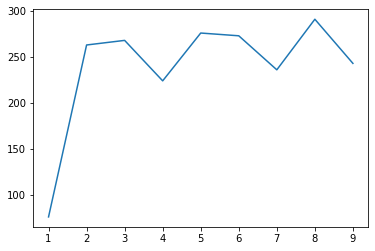

In [48]:
name_plot('Jim')

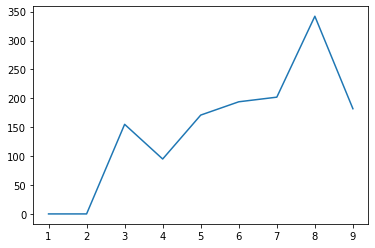

In [49]:
name_plot('Andy')

In [50]:
#function that returns particular season scenes value for given char
def season_scene_no(speaker,season):
    return len(dff1[(dff1['speaker']==speaker)& (dff1['season']==season)])

In [51]:
season_scene_no('Pam',8)

173

In [52]:
season_scene_no('Creed',5)

37

In [53]:
#transposing pivot table
df_scene_total_trans=df_scene_total.transpose()
df_scene_total_trans

speaker   All   Andy  Angela  Clark  Creed  Darryl  David  Dwight   Erin  \
season                                                                     
1         0.0    0.0    12.0    0.0    0.0     7.0    0.0    72.0    0.0   
2         1.0    0.0    71.0    0.0   28.0    21.0    5.0   289.0    0.0   
3         1.0  155.0   126.0    0.0   50.0    21.0   15.0   363.0    0.0   
4         4.0   95.0    77.0    0.0   35.0    20.0    1.0   189.0    0.0   
5         2.0  171.0    95.0    0.0   37.0    36.0   31.0   306.0   20.0   
6         2.0  194.0    66.0    1.0   31.0    30.0   23.0   273.0  122.0   
7        13.0  202.0    77.0    0.0   40.0    94.0    1.0   226.0  132.0   
8        14.0  342.0    80.0    0.0   29.0   125.0    5.0   315.0  180.0   
9        14.0  182.0   134.0   91.0   43.0   116.0    5.0   333.0  160.0   

speaker  Everyone  ...  Nellie  Oscar    Pam  Pete  Phyllis  Robert   Roy  \
season             ...                                                      
1             0.0  ...     0.0   17.0   58.0   0.0      7.0     0.0  13.0   
2             2.0  ...     0.0   58.0  260.0   0.0     55.0     0.0  31.0   
3             5.0  ...     0.0   43.0  270.0   0.0     68.0     0.0  34.0   
4             4.0  ...     0.0   64.0  216.0   0.0     55.0     0.0   0.0   
5             4.0  ...     0.0   98.0  255.0   4.0     98.0     0.0   2.0   
6            10.0  ...     0.0   88.0  225.0   2.0     83.0     0.0   0.0   
7             1.0  ...     2.0   86.0  218.0   0.0     88.0     7.0   0.0   
8            11.0  ...    83.0  118.0  173.0   0.0     88.0   124.0   0.0   
9            12.0  ...   126.0  145.0  246.0  77.0     80.0     4.0   3.0   

speaker  Ryan  Stanley  Toby  
season                        
1        18.0     13.0   4.0  
2        82.0     47.0  47.0  
3        96.0     60.0  51.0  
4        63.0     43.0  58.0  
5        66.0     71.0  25.0  
6        48.0     48.0  36.0  
7        76.0     52.0  45.0  
8        85.0     68.0  44.0  
9         6.0     63.0  48.0  

[9 rows x 28 columns]

##### Number of lines each character spoke in every season:

In [55]:
df_char_lines = df.pivot_table(index='speaker', columns=['season','episode'], values='line_text',aggfunc='count')
#applying threshold of min 19 episodes to include characters appearing in atleast 10% of total 186 episodes
df_char_lines=df_char_lines.dropna(axis=0,how='any',thresh=19)
df_char_lines

season       1                                      2                     ...  \
episode     1     2     3     4      5      6      1      2     3     4   ...   
speaker                                                                   ...   
All        NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Andy       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Angela     1.0   4.0   5.0   7.0    3.0    3.0    3.0    2.0   6.0  17.0  ...   
Clark      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Creed      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Darryl     NaN   NaN   NaN   NaN   15.0    NaN    1.0    9.0   NaN   NaN  ...   
David      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Dwight    29.0  19.0  62.0  58.0   26.0   28.0   39.0   11.0  58.0  65.0  ...   
Erin       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Everyone   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   1.0   NaN  ...   
Gabe       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Jan       12.0   NaN  18.0   NaN    NaN    8.0    9.0   11.0   NaN   NaN  ...   
Jim       36.0  27.0  42.0  49.0   22.0   55.0   33.0   16.0  56.0  51.0  ...   
Karen      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Kelly      NaN   2.0   NaN   NaN    NaN    NaN    8.0    NaN   NaN   4.0  ...   
Kevin      1.0   8.0   6.0   3.0    1.0    5.0    1.0    6.0   9.0   5.0  ...   
Meredith   NaN   NaN   3.0  10.0    NaN    NaN    NaN    1.0   1.0   4.0  ...   
Michael   81.0  81.0  56.0  79.0  106.0  106.0  106.0  100.0  83.0  69.0  ...   
Nellie     NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Oscar      3.0  13.0   9.0  14.0    2.0    1.0    4.0    NaN  10.0   4.0  ...   
Pam       41.0  16.0  32.0  22.0   14.0   45.0   41.0   27.0  35.0  22.0  ...   
Pete       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Phyllis    2.0   NaN   NaN   5.0    4.0    NaN   10.0    6.0   2.0   6.0  ...   
Robert     NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Roy        5.0   NaN   NaN   3.0   12.0   14.0    6.0   14.0   NaN   6.0  ...   
Ryan       8.0   4.0   1.0   4.0    8.0   12.0    2.0    1.0   5.0  40.0  ...   
Stanley    5.0   5.0   6.0   2.0    3.0    3.0    8.0    1.0   3.0   5.0  ...   
Toby       NaN   2.0   NaN   4.0    NaN    7.0    NaN   26.0   NaN   NaN  ...   

season       9                                                        
episode     14    15    16    17    18    19    20    21    22    23  
speaker                                                               
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  10.0  
Andy       NaN  62.0  83.0   5.0  11.0  31.0  39.0  68.0  44.0  31.0  
Angela    15.0   4.0  42.0   8.0  32.0   4.0  16.0  30.0  39.0  23.0  
Clark      4.0   9.0   9.0   5.0  23.0  37.0   6.0   8.0   5.0   3.0  
Creed      1.0   NaN   4.0   3.0   NaN   2.0   1.0   2.0   4.0   8.0  
Darryl    35.0   3.0   5.0   1.0  12.0   NaN  10.0  11.0  30.0  19.0  
David      NaN   NaN  15.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Dwight    37.0  32.0  44.0  51.0  37.0  61.0  21.0  54.0  87.0  76.0  
Erin      10.0  26.0  33.0   4.0   3.0  10.0  16.0   9.0  22.0  11.0  
Everyone   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   1.0   NaN  
Gabe       NaN   NaN  20.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jan        NaN   8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jim       30.0  26.0  28.0   6.0  31.0  15.0  17.0  63.0  89.0  73.0  
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Kelly      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  12.0  
Kevin      6.0   6.0   5.0  12.0   9.0   5.0  10.0  13.0  30.0  31.0  
Meredith   1.0   2.0   7.0   3.0   3.0   2.0   NaN   1.0   9.0  15.0  
Michael    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0

In [56]:
df_lines_total=df_char_lines.sum(level=[0],axis=1)
df_lines_total

season        1       2       3       4       5       6       7       8  \
speaker                                                                   
All         0.0     1.0     1.0     7.0     2.0     2.0    18.0    15.0   
Andy        0.0     0.0   391.0   223.0   497.0   538.0   557.0  1125.0   
Angela     23.0   138.0   239.0   193.0   221.0   136.0   161.0   166.0   
Clark       0.0     0.0     0.0     0.0     0.0    13.0     0.0     0.0   
Creed       0.0    52.0    71.0    67.0    52.0    38.0    66.0    33.0   
Darryl     15.0    63.0    88.0    59.0   102.0    84.0   227.0   312.0   
David       0.0    12.0    64.0     3.0   127.0   113.0    12.0    26.0   
Dwight    222.0   856.0   939.0   547.0  1074.0   811.0   703.0   946.0   
Erin        0.0     0.0     0.0     0.0    53.0   298.0   311.0   427.0   
Everyone    0.0     2.0     5.0     4.0     5.0    14.0     1.0    13.0   
Gabe        0.0     0.0     0.0     0.0     0.0    86.0   211.0   119.0   
Jan        38.0   234.0   298.0   214.0    64.0     0.0    17.0     0.0   
Jim       231.0   764.0   773.0   684.0   875.0   928.0   687.0   869.0   
Karen       0.0     0.0   292.0    25.0    22.0     0.0     1.0     0.0   
Kelly       2.0    96.0   176.0    95.0   156.0   120.0   153.0   123.0   
Kevin      24.0   126.0   209.0   141.0   187.0   228.0   240.0   247.0   
Meredith   13.0    32.0    60.0    62.0   115.0    82.0    70.0    83.0   
Michael   509.0  1894.0  1989.0  1633.0  2163.0  1983.0  1401.0     0.0   
Nellie      0.0     0.0     0.0     0.0     0.0     0.0     9.0   233.0   
Oscar      42.0   100.0    72.0   111.0   216.0   177.0   197.0   235.0   
Pam       170.0   625.0   648.0   528.0   706.0   706.0   612.0   475.0   
Pete        0.0     0.0     0.0     0.0    15.0     6.0     0.0     0.0   
Phyllis    11.0    94.0   112.0    99.0   180.0   138.0   147.0   123.0   
Robert      0.0     0.0     0.0     0.0     0.0     0.0    17.0   404.0   
Roy        34.0    85.0    89.0     0.0    14.0     0.0     0.0     0.0   
Ryan       37.0   164.0   197.0   228.0   169.0   125.0   176.0   189.0   
Stanley    24.0    82.0    94.0    81.0   113.0    72.0    75.0    91.0   
Toby       13.0   111.0   122.0   144.0    71.0   100.0    97.0   106.0   

season         9  
speaker           
All         16.0  
Andy       637.0  
Angela     381.0  
Clark      247.0  
Creed       52.0  
Darryl     278.0  
David       25.0  
Dwight    1069.0  
Erin       380.0  
Everyone    15.0  
Gabe        20.0  
Jan         33.0  
Jim        798.0  
Karen        0.0  
Kelly       14.0  
Kevin      266.0  
Meredith   114.0  
Michael      2.0  
Nellie     287.0  
Oscar      294.0  
Pam        735.0  
Pete       192.0  
Phyllis    127.0  
Robert       9.0  
Roy         11.0  
Ryan        16.0  
Stanley    100.0  
Toby       125.0

In [57]:
#function that plots lines for the given character
def name_plot_lines(speaker):
    data = df_lines_total.loc[speaker]
    plt.plot(data.index,data.values)

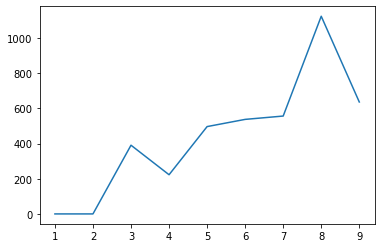

In [58]:
name_plot_lines('Andy')

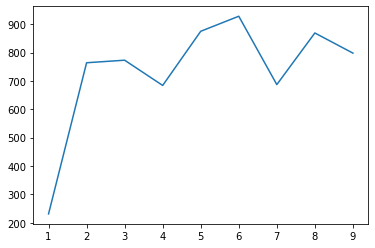

In [59]:
name_plot_lines('Jim')

In [60]:
#function that returns particular season lines value for given char
def season_lines_no(speaker,season):
    return len(df[(df['speaker']==speaker)& (df['season']==season)])

In [61]:
season_lines_no('Pam',8)

475

In [62]:
season_lines_no('Clark',9)

247

In [63]:
season_lines_no('Clark',4) #correctly identified as Clark only came in season 9

0

In [64]:
#transposing pivot table
df_lines_total_trans=df_lines_total.transpose()
df_lines_total_trans

speaker   All    Andy  Angela  Clark  Creed  Darryl  David  Dwight   Erin  \
season                                                                      
1         0.0     0.0    23.0    0.0    0.0    15.0    0.0   222.0    0.0   
2         1.0     0.0   138.0    0.0   52.0    63.0   12.0   856.0    0.0   
3         1.0   391.0   239.0    0.0   71.0    88.0   64.0   939.0    0.0   
4         7.0   223.0   193.0    0.0   67.0    59.0    3.0   547.0    0.0   
5         2.0   497.0   221.0    0.0   52.0   102.0  127.0  1074.0   53.0   
6         2.0   538.0   136.0   13.0   38.0    84.0  113.0   811.0  298.0   
7        18.0   557.0   161.0    0.0   66.0   227.0   12.0   703.0  311.0   
8        15.0  1125.0   166.0    0.0   33.0   312.0   26.0   946.0  427.0   
9        16.0   637.0   381.0  247.0   52.0   278.0   25.0  1069.0  380.0   

speaker  Everyone  ...  Nellie  Oscar    Pam   Pete  Phyllis  Robert   Roy  \
season             ...                                                       
1             0.0  ...     0.0   42.0  170.0    0.0     11.0     0.0  34.0   
2             2.0  ...     0.0  100.0  625.0    0.0     94.0     0.0  85.0   
3             5.0  ...     0.0   72.0  648.0    0.0    112.0     0.0  89.0   
4             4.0  ...     0.0  111.0  528.0    0.0     99.0     0.0   0.0   
5             5.0  ...     0.0  216.0  706.0   15.0    180.0     0.0  14.0   
6            14.0  ...     0.0  177.0  706.0    6.0    138.0     0.0   0.0   
7             1.0  ...     9.0  197.0  612.0    0.0    147.0    17.0   0.0   
8            13.0  ...   233.0  235.0  475.0    0.0    123.0   404.0   0.0   
9            15.0  ...   287.0  294.0  735.0  192.0    127.0     9.0  11.0   

speaker   Ryan  Stanley   Toby  
season                          
1         37.0     24.0   13.0  
2        164.0     82.0  111.0  
3        197.0     94.0  122.0  
4        228.0     81.0  144.0  
5        169.0    113.0   71.0  
6        125.0     72.0  100.0  
7        176.0     75.0   97.0  
8        189.0     91.0  106.0  
9         16.0    100.0  125.0  

[9 rows x 28 columns]

## 1b) EDA for IMDB Ratings dataset (df_imdb)

In [66]:
#reading file 2 - IMDB ratings dataset 
df_imdb = pd.read_csv("TheOfficeIMDBPerEpisode.csv")

In [67]:
df_imdb.head() #IMDB ratings dataset

Season          Title     AirDate  Rating  Num_Votes  \
0       1          Pilot  2005-03-24     7.5       4349   
1       1  Diversity Day  2005-03-29     8.3       4213   
2       1    Health Care  2005-04-05     7.8       3536   
3       1   The Alliance  2005-04-12     8.1       3428   
4       1     Basketball  2005-04-19     8.4       3745   

                                         Description       DirectedBy  \
0  The premiere episode introduces the boss and s...       Ken Kwapis   
1  Michael's off color remark puts a sensitivity ...       Ken Kwapis   
2  Michael leaves Dwight in charge of picking the...  Ken Whittingham   
3  Just for a laugh, Jim agrees to an alliance wi...     Bryan Gordon   
4  Michael and his staff challenge the warehouse ...     Greg Daniels   

                                          WrittenBy  
0  Ricky Gervais |Stephen Merchant and Greg Daniels  
1                                       B. J. Novak  
2                                  Paul Lieberstein  
3                                     Michael Schur  
4                                      Greg Daniels

In [68]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       188 non-null    int64  
 1   Title        188 non-null    object 
 2   AirDate      188 non-null    object 
 3   Rating       188 non-null    float64
 4   Num_Votes    188 non-null    int64  
 5   Description  188 non-null    object 
 6   DirectedBy   188 non-null    object 
 7   WrittenBy    188 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ KB


In [69]:
#get column names
column_names2 = df_imdb.columns
print(column_names2)

Index(['Season', 'Title', 'AirDate', 'Rating', 'Num_Votes', 'Description',
       'DirectedBy', 'WrittenBy'],
      dtype='object')


In [70]:
# Drop unwanted columns-Description in this case
df_imdb.drop('Description', inplace=True, axis=1)

In [71]:
df_imdb.groupby('Season')['Title'].nunique() 
#comparing with df to verify if df_imdb has same number of episodes in every season

Season
1     6
2    22
3    23
4    14
5    26
6    26
7    24
8    24
9    23
Name: Title, dtype: int64

In [72]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

In [73]:
#df_imdb counts Niagara part 1 and 2 and The Delivery part 1 and 2 of season 6 as separate episodes whereas in df 
#they are counted as single episodes, since most of the analysis is based on df,we will consider Niagara and 
#The Delivery as single episodes
df_imdb[df_imdb['Season']==6]

Season                 Title     AirDate  Rating  Num_Votes  \
91        6                Gossip  2009-09-17     8.8       2504   
92        6           The Meeting  2009-09-24     8.1       2057   
93        6         The Promotion  2009-10-01     8.0       2052   
94        6       Niagara: Part 1  2009-10-08     9.4       4055   
95        6       Niagara: Part 2  2009-10-08     9.4       2509   
96        6                 Mafia  2009-10-15     7.6       2156   
97        6             The Lover  2009-10-22     8.6       2262   
98        6              Koi Pond  2009-10-29     8.2       2047   
99        6           Double Date  2009-11-05     8.1       2018   
100       6                Murder  2009-11-12     8.6       2385   
101       6   Shareholder Meeting  2009-11-19     8.2       2034   
102       6          Scott's Tots  2009-12-03     8.3       2345   
103       6          Secret Santa  2009-12-10     8.5       2162   
104       6            The Banker  2010-01-21     6.8       2665   
105       6                 Sabre  2010-02-04     7.7       1963   
106       6  Manager and Salesman  2010-02-11     8.1       1942   
107       6  The Delivery: Part 1  2010-03-04     8.4       2048   
108       6  The Delivery: Part 2  2010-03-04     8.5       2065   
109       6     St. Patrick's Day  2010-03-11     7.7       1922   
110       6             New Leads  2010-03-18     7.8       1885   
111       6            Happy Hour  2010-03-25     8.6       2199   
112       6       Secretary's Day  2010-04-22     7.9       1892   
113       6         Body Language  2010-04-29     8.0       1922   
114       6          The Cover-Up  2010-05-06     8.2       1920   
115       6             The Chump  2010-05-13     7.8       1850   
116       6         Whistleblower  2010-05-20     8.0       1909   

            DirectedBy                              WrittenBy  
91    Paul Lieberstein                       Paul Lieberstein  
92     Randall Einhorn                            Aaron Shure  
93    Jennifer Celotta                       Jennifer Celotta  
94           Paul Feig            Greg Daniels | Mindy Kaling  
95           Paul Feig            Greg Daniels | Mindy Kaling  
96        David Rogers                        Brent Forrester  
97       Lee Eisenberg        Lee Eisenberg | Gene Stupnitsky  
98       Reggie Hudlin  Warren Lieberstein | Halsted Sullivan  
99         Seth Gordon                         Charlie Grandy  
100       Greg Daniels                            Daniel Chun  
101  Charles McDougall                         Justin Spitzer  
102        B. J. Novak        Gene Stupnitsky | Lee Eisenberg  
103    Randall Einhorn                           Mindy Kaling  
104      Jeffrey Blitz                          Jason Kessler  
105     John Krasinski                       Jennifer Celotta  
106          Marc Webb                           Mindy Kaling  
107        Seth Gordon                            Daniel Chun  
108        Seth Gordon                            Daniel Chun  
109    Randall Einhorn                        Jonathan Hughes  
110    Brent Forrester                        Brent Forrester  
111          Matt Sohn                            B. J. Novak  
112       Steve Carell                           Mindy Kaling  
113       Mindy Kaling                         Justin Spitzer  
114       Rainn Wilson        Gene Stupnitsky | Lee Eisenberg  
115    Randall Einhorn                            Aaron Shure  
116   Paul Lieberstein  Warren Lieberstein | Halsted Sullivan

In [74]:
#taking average of ratings for episodes Niagara Part 1 and 2
(df_imdb.loc[94]['Rating']+df_imdb.loc[95]['Rating'])/2

9.4

In [75]:
#taking average of ratings for episodes The Delivery Part 1 and 2
df_imdb.loc[107]['Rating']+df_imdb.loc[108]['Rating']/2
np.around((df_imdb.loc[107]['Rating']+df_imdb.loc[108]['Rating'])/2,1)

8.4

In [76]:
#combining parts 1 and 2 of season 6 episodes Niagara and The Delivery into one.
#all other feature values remain same,only votes and title change
#keeping the higher number of votes assuming those many people must have seen both the parts
df_imdb.loc[94,"Num_Votes"]=df_imdb.loc[94]['Num_Votes']
df_imdb.loc[107,"Num_Votes"]=df_imdb.loc[108]['Num_Votes']
df_imdb.loc[94,"Title"]="Niagara: Part 1 & 2"
df_imdb.loc[107,"Title"]="The Delivery: Part 1 & 2"

In [77]:
#dropping the extra rows and resetting index
df_imdb.drop(df_imdb.index[[95,108]], inplace=True)
df_imdb.reset_index(drop=True,inplace=True)

In [78]:
df_imdb[df_imdb['Season']==6]

Season                     Title     AirDate  Rating  Num_Votes  \
91        6                    Gossip  2009-09-17     8.8       2504   
92        6               The Meeting  2009-09-24     8.1       2057   
93        6             The Promotion  2009-10-01     8.0       2052   
94        6       Niagara: Part 1 & 2  2009-10-08     9.4       4055   
95        6                     Mafia  2009-10-15     7.6       2156   
96        6                 The Lover  2009-10-22     8.6       2262   
97        6                  Koi Pond  2009-10-29     8.2       2047   
98        6               Double Date  2009-11-05     8.1       2018   
99        6                    Murder  2009-11-12     8.6       2385   
100       6       Shareholder Meeting  2009-11-19     8.2       2034   
101       6              Scott's Tots  2009-12-03     8.3       2345   
102       6              Secret Santa  2009-12-10     8.5       2162   
103       6                The Banker  2010-01-21     6.8       2665   
104       6                     Sabre  2010-02-04     7.7       1963   
105       6      Manager and Salesman  2010-02-11     8.1       1942   
106       6  The Delivery: Part 1 & 2  2010-03-04     8.4       2065   
107       6         St. Patrick's Day  2010-03-11     7.7       1922   
108       6                 New Leads  2010-03-18     7.8       1885   
109       6                Happy Hour  2010-03-25     8.6       2199   
110       6           Secretary's Day  2010-04-22     7.9       1892   
111       6             Body Language  2010-04-29     8.0       1922   
112       6              The Cover-Up  2010-05-06     8.2       1920   
113       6                 The Chump  2010-05-13     7.8       1850   
114       6             Whistleblower  2010-05-20     8.0       1909   

            DirectedBy                              WrittenBy  
91    Paul Lieberstein                       Paul Lieberstein  
92     Randall Einhorn                            Aaron Shure  
93    Jennifer Celotta                       Jennifer Celotta  
94           Paul Feig            Greg Daniels | Mindy Kaling  
95        David Rogers                        Brent Forrester  
96       Lee Eisenberg        Lee Eisenberg | Gene Stupnitsky  
97       Reggie Hudlin  Warren Lieberstein | Halsted Sullivan  
98         Seth Gordon                         Charlie Grandy  
99        Greg Daniels                            Daniel Chun  
100  Charles McDougall                         Justin Spitzer  
101        B. J. Novak        Gene Stupnitsky | Lee Eisenberg  
102    Randall Einhorn                           Mindy Kaling  
103      Jeffrey Blitz                          Jason Kessler  
104     John Krasinski                       Jennifer Celotta  
105          Marc Webb                           Mindy Kaling  
106        Seth Gordon                            Daniel Chun  
107    Randall Einhorn                        Jonathan Hughes  
108    Brent Forrester                        Brent Forrester  
109          Matt Sohn                            B. J. Novak  
110       Steve Carell                           Mindy Kaling  
111       Mindy Kaling                         Justin Spitzer  
112       Rainn Wilson        Gene Stupnitsky | Lee Eisenberg  
113    Randall Einhorn                            Aaron Shure  
114   Paul Lieberstein  Warren Lieberstein | Halsted Sullivan

In [79]:
import seaborn as sns

##### Pearson's Correlation Coefficient Heatmap:

<AxesSubplot:>

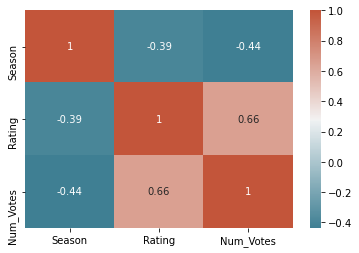

In [80]:
#Pearson's coefficient
corrmat=df_imdb.corr()
sns.heatmap(corrmat, xticklabels=corrmat.columns, yticklabels=corrmat.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Votes and ratings negatively correlated with season.

In [81]:
df_imdb.groupby('Season').mean()

Rating    Num_Votes
Season                       
1       7.983333  3773.833333
2       8.450000  3069.045455
3       8.600000  2835.826087
4       8.564286  2816.214286
5       8.496154  2524.000000
6       8.141667  2175.458333
7       8.320833  2398.500000
8       7.629167  1803.666667
9       7.921739  2174.913043

Ratings dropped in seasons 8 and 9, overall votes seem to decrease over the seasons as expected.

### EXPLORING AIR DATE DATA (column - "AirDate")

In [82]:
#converting air date to datetime object
df_imdb['AirDate']=pd.to_datetime(df_imdb['AirDate'])
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Season      186 non-null    int64         
 1   Title       186 non-null    object        
 2   AirDate     186 non-null    datetime64[ns]
 3   Rating      186 non-null    float64       
 4   Num_Votes   186 non-null    int64         
 5   DirectedBy  186 non-null    object        
 6   WrittenBy   186 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 10.3+ KB


In [83]:
df_imdb['year'] = df_imdb['AirDate'].dt.year
df_imdb['month'] = df_imdb['AirDate'].dt.month#jan is 1,dec is 12
df_imdb['day'] = df_imdb['AirDate'].dt.weekday #mon is 0,sun is 6
df_imdb.head(60)

Season                           Title    AirDate  Rating  Num_Votes  \
0        1                           Pilot 2005-03-24     7.5       4349   
1        1                   Diversity Day 2005-03-29     8.3       4213   
2        1                     Health Care 2005-04-05     7.8       3536   
3        1                    The Alliance 2005-04-12     8.1       3428   
4        1                      Basketball 2005-04-19     8.4       3745   
5        1                        Hot Girl 2005-04-26     7.8       3372   
6        2                     The Dundies 2005-09-20     8.7       3780   
7        2               Sexual Harassment 2005-09-27     8.2       3218   
8        2                 Office Olympics 2005-10-04     8.4       3218   
9        2                        The Fire 2005-10-11     8.4       3183   
10       2                       Halloween 2005-10-18     8.1       2992   
11       2                       The Fight 2005-11-01     8.2       2981   
12       2                      The Client 2005-11-08     8.6       3087   
13       2              Performance Review 2005-11-15     8.2       2828   
14       2             E-Mail Surveillance 2005-11-22     8.4       2940   
15       2                 Christmas Party 2005-12-06     8.9       3204   
16       2                    Booze Cruise 2006-01-05     8.6       3115   
17       2                      The Injury 2006-01-12     9.1       3783   
18       2                      The Secret 2006-01-19     8.3       2762   
19       2                      The Carpet 2006-01-26     7.9       2745   
20       2                  Boys and Girls 2006-02-02     8.2       2723   
21       2                 Valentine's Day 2006-02-09     8.3       2731   
22       2                 Dwight's Speech 2006-03-02     8.5       2875   
23       2  Take Your Daughter to Work Day 2006-03-16     8.3       2819   
24       2              Michael's Birthday 2006-03-30     8.1       2719   
25       2                    Drug Testing 2006-04-27     8.4       2783   
26       2             Conflict Resolution 2006-05-04     8.7       2838   
27       2                    Casino Night 2006-05-11     9.4       4195   
28       3                  Gay Witch Hunt 2006-09-21     9.0       3608   
29       3                  The Convention 2006-09-28     8.2       2663   
30       3                        The Coup 2006-10-05     8.6       2787   
31       3                Grief Counseling 2006-10-12     8.0       2686   
32       3                      Initiation 2006-10-19     8.2       2622   
33       3                          Diwali 2006-11-02     8.0       2697   
34       3                  Branch Closing 2006-11-09     8.6       2642   
35       3                      The Merger 2006-11-16     8.7       2768   
36       3                     The Convict 2006-11-30     8.3       2772   
37       3            A Benihana Christmas 2006-12-14     8.8       2935   
38       3              Back from Vacation 2007-01-04     8.5       2623   
39       3              Traveling Salesmen 2007-01-11     8.6       2688   
40       3                      The Return 2007-01-18     8.8       2822   
41       3                    Ben Franklin 2007-02-01     8.1       2618   
42       3                Phyllis' Wedding 2007-02-08     8.2       2641   
43       3                 Business School 2007-02-15     8.9       3028   
44       3                       Cocktails 2007-02-22     8.5       2622   
45       3                 The Negotiation 2007-04-05     9.0       2968   
46       3                 Safety Training 2007-04-12     8.8       2798   
47       3                  Product Recall 2007-04-26     8.8       2790   
48       3            Women's Appreciation 2007-05-03     8.8       2785   
49       3                     Beach Games 2007-05-10     9.1       3200   
50       3                         The Job 2007-05-17     9.3       3461   
51       4                         Fun Run 2007-09-2

##### Days on which the show aired:

In [84]:
df_imdb['day'].value_counts() #thursdays and tuesdays

3    170
1     15
6      1
Name: day, dtype: int64

In [85]:
df_imdb[df_imdb['day']==6]

Season          Title    AirDate  Rating  Num_Votes     DirectedBy  \
77       5  Stress Relief 2009-02-01     9.7       7058  Jeffrey Blitz   

           WrittenBy  year  month  day  
77  Paul Lieberstein  2009      2    6

From the above data, we can conclude the show aired initially on Tuesdays(Season 1 and few episodes of Season 2). Later on the show moved to its regular Thursday airing slot for the rest of the seasons(joining the "Must See TV" and "Comedy Night Done Right" Thursday night lineup) except one episode "Stress Relief" which aired on a Sunday. 

Point to note about episode "Stress Relief" - 
This special episode aired on NBC in the US right after the broadcast of Super Bowl XLIII, in anticipation of the high post-Super Bowl viewership.
According to Paul  Lieberstein who wrote this episode, the makers wanted to attract new viewers while retaining the regular ones through an out and out comedy episode hence they focused less on the long-standing story arcs. Besides, the episode also had celebrity guest appearances from Jack Black, Jessica Alba and Cloris Leachman in the film called Mrs. Albert Hannaday that Andy, Jim and Pam watch in the episode.
In its original American broadcast on February 1, 2009, "Stress Relief" was viewed by 22.9 million viewers in 13.34 million homes, according to Nielsen Media Research, making it the most watched episode of The Office and the only episode to reach over 20 million viewers.


Source - Wikipedia

##### Months when the show aired:

In [86]:
df_imdb.groupby('Season')['month'].value_counts().tail(60)

Season  month
2       4        1
        12       1
3       2        4
        11       4
        1        3
        4        3
        5        3
        10       3
        9        2
        12       1
4       10       4
        4        3
        5        3
        11       3
        9        1
5       4        5
        3        4
        10       4
        2        3
        11       3
        1        2
        5        2
        12       2
        9        1
6       10       5
        3        4
        5        3
        11       3
        2        2
        4        2
        9        2
        12       2
        1        1
7       2        4
        10       4
        4        3
        5        3
        11       3
        1        2
        9        2
        12       2
        3        1
8       2        4
        3        3
        4        3
        10       3
        11       3
        1        2
        5        2
        9        2
        12       2
9       1        

<AxesSubplot:xlabel='month', ylabel='count'>

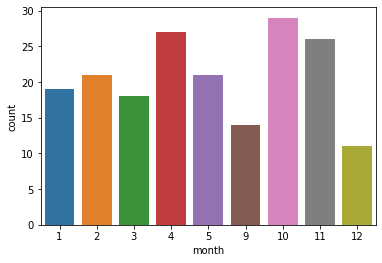

In [87]:
sns.countplot(x=df_imdb['month'])

The show aired most of its episodes in the months of October,April and November.

##### Years when the show aired:

In [88]:
df_imdb['year'].value_counts()

2009    28
2012    23
2011    23
2010    23
2006    22
2007    21
2008    16
2005    16
2013    14
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

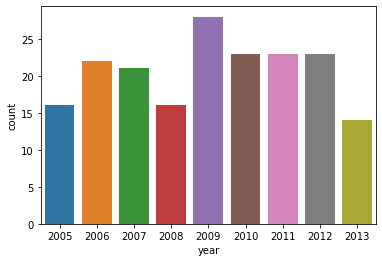

In [89]:
sns.countplot(x=df_imdb['year'])

In [90]:
df_imdb.groupby('year')['Season'].value_counts()

year  Season
2005  2         10
      1          6
2006  2         12
      3         10
2007  3         13
      4          8
2008  5         10
      4          6
2009  5         16
      6         12
2010  6         12
      7         11
2011  7         13
      8         10
2012  8         14
      9          9
2013  9         14
Name: Season, dtype: int64

<AxesSubplot:xlabel='year,Season'>

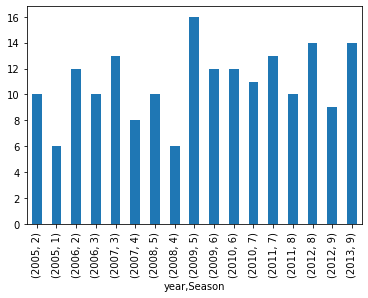

In [91]:
df_imdb.groupby('year')['Season'].value_counts().plot(kind='bar')

The show aired from year 2005 to 2013;the highest number of episodes aired in 2009.

##### Longest running season:

In [92]:
df_imdb['Difference in days between air dates(season-wise)'] = df_imdb.groupby('Season')['AirDate'].apply(lambda x: x.dt.date - x.min().date()).astype('timedelta64[D]')
df_imdb.head(60)

Season                           Title    AirDate  Rating  Num_Votes  \
0        1                           Pilot 2005-03-24     7.5       4349   
1        1                   Diversity Day 2005-03-29     8.3       4213   
2        1                     Health Care 2005-04-05     7.8       3536   
3        1                    The Alliance 2005-04-12     8.1       3428   
4        1                      Basketball 2005-04-19     8.4       3745   
5        1                        Hot Girl 2005-04-26     7.8       3372   
6        2                     The Dundies 2005-09-20     8.7       3780   
7        2               Sexual Harassment 2005-09-27     8.2       3218   
8        2                 Office Olympics 2005-10-04     8.4       3218   
9        2                        The Fire 2005-10-11     8.4       3183   
10       2                       Halloween 2005-10-18     8.1       2992   
11       2                       The Fight 2005-11-01     8.2       2981   
12       2                      The Client 2005-11-08     8.6       3087   
13       2              Performance Review 2005-11-15     8.2       2828   
14       2             E-Mail Surveillance 2005-11-22     8.4       2940   
15       2                 Christmas Party 2005-12-06     8.9       3204   
16       2                    Booze Cruise 2006-01-05     8.6       3115   
17       2                      The Injury 2006-01-12     9.1       3783   
18       2                      The Secret 2006-01-19     8.3       2762   
19       2                      The Carpet 2006-01-26     7.9       2745   
20       2                  Boys and Girls 2006-02-02     8.2       2723   
21       2                 Valentine's Day 2006-02-09     8.3       2731   
22       2                 Dwight's Speech 2006-03-02     8.5       2875   
23       2  Take Your Daughter to Work Day 2006-03-16     8.3       2819   
24       2              Michael's Birthday 2006-03-30     8.1       2719   
25       2                    Drug Testing 2006-04-27     8.4       2783   
26       2             Conflict Resolution 2006-05-04     8.7       2838   
27       2                    Casino Night 2006-05-11     9.4       4195   
28       3                  Gay Witch Hunt 2006-09-21     9.0       3608   
29       3                  The Convention 2006-09-28     8.2       2663   
30       3                        The Coup 2006-10-05     8.6       2787   
31       3                Grief Counseling 2006-10-12     8.0       2686   
32       3                      Initiation 2006-10-19     8.2       2622   
33       3                          Diwali 2006-11-02     8.0       2697   
34       3                  Branch Closing 2006-11-09     8.6       2642   
35       3                      The Merger 2006-11-16     8.7       2768   
36       3                     The Convict 2006-11-30     8.3       2772   
37       3            A Benihana Christmas 2006-12-14     8.8       2935   
38       3              Back from Vacation 2007-01-04     8.5       2623   
39       3              Traveling Salesmen 2007-01-11     8.6       2688   
40       3                      The Return 2007-01-18     8.8       2822   
41       3                    Ben Franklin 2007-02-01     8.1       2618   
42       3                Phyllis' Wedding 2007-02-08     8.2       2641   
43       3                 Business School 2007-02-15     8.9       3028   
44       3                       Cocktails 2007-02-22     8.5       2622   
45       3                 The Negotiation 2007-04-05     9.0       2968   
46       3                 Safety Training 2007-04-12     8.8       2798   
47       3                  Product Recall 2007-04-26     8.8       2790   
48       3            Women's Appreciation 2007-05-03     8.8       2785   
49       3                     Beach Games 2007-05-10     9.1       3200   
50       3                         The Job 2007-05-17     9.3       3461   
51       4                         Fun Run 2007-09-2

In [93]:
df_imdb.groupby('Season')['Difference in days between air dates(season-wise)'].nlargest(1).sort_values(ascending=False)

Season     
6       114    245.0
9       185    238.0
7       138    238.0
3       50     238.0
2       27     233.0
8       162    231.0
5       90     231.0
4       64     231.0
1       5       33.0
Name: Difference in days between air dates(season-wise), dtype: float64

<AxesSubplot:xlabel='Season,None'>

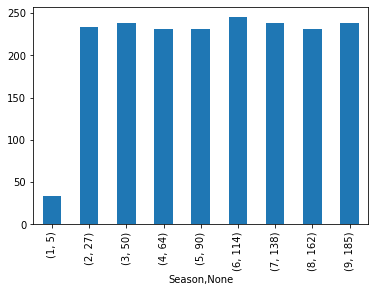

In [94]:
df_imdb.groupby('Season')['Difference in days between air dates(season-wise)'].nlargest(1).plot(kind='bar')

In [95]:
df_imdb['Season'].value_counts()

5    26
8    24
7    24
6    24
9    23
3    23
2    22
4    14
1     6
Name: Season, dtype: int64

The longest running season was season 6 despite season 5 having the maximum number of episodes. All seasons (except season 1 which had only 6 episodes) ran for a similar number of days including season 4 which comparatively had lesser episodes (14).

### EXPLORING RATINGS DATA (column - "Rating")

In [96]:
#descriptive stats
df_imdb['Rating'].describe() 

count    186.00000
mean       8.24086
std        0.57530
min        6.60000
25%        7.80000
50%        8.20000
75%        8.60000
max        9.80000
Name: Rating, dtype: float64

According to IMDB there are 188 episodes but since the dialogues dataset counts The Niagara and The Delivery as single episodes, the show had 186 episodes in total.

In [97]:
df_imdb.groupby('Season')['Rating'].describe()

count      mean       std  min    25%   50%    75%  max
Season                                                         
1         6.0  7.983333  0.343026  7.5  7.800  7.95  8.250  8.4
2        22.0  8.450000  0.350170  7.9  8.200  8.40  8.600  9.4
3        23.0  8.600000  0.364318  8.0  8.250  8.60  8.800  9.3
4        14.0  8.564286  0.437839  7.8  8.300  8.55  8.775  9.4
5        26.0  8.496154  0.404456  8.0  8.200  8.40  8.700  9.7
6        24.0  8.141667  0.498621  6.8  7.875  8.10  8.425  9.4
7        24.0  8.320833  0.638598  7.4  7.800  8.20  8.725  9.8
8        24.0  7.629167  0.417528  6.6  7.450  7.70  7.925  8.2
9        23.0  7.921739  0.682879  7.0  7.550  7.80  8.000  9.8

Season 8's highest rated episode rating is same as the median rating across all episodes.

In [98]:
df_imdb['Rating'].median()

8.2

In [99]:
df_imdb['Rating'].mode()

0    8.2
dtype: float64

Point to note - The rating of an episode is not an average of all ratings received from the voters. IMDB uses weighted average system.

AS MENTIONED ON THEIR OFFICIAL WEBSITE-
"We take all the individual ratings cast by IMDb registered users and use them to calculate a single rating. We don't use the arithmetic mean (i.e. the sum of all votes divided by the number of votes), although we do display the mean and average votes on the votes breakdown page; instead the rating displayed on a title's page is a weighted average. 

The IMDb weighted average does not change upon receipt of each new vote, but instead is updated numerous times per day."

##### Ratings Distribution:

In [100]:
df_imdb['Rating'].value_counts()

8.2    19
8.0    14
8.3    14
8.1    14
7.8    13
8.8    11
7.7    11
8.7    11
8.4    11
8.6    10
8.5     7
7.6     7
9.0     6
7.9     5
7.5     5
9.4     4
9.3     3
7.1     3
8.9     2
9.1     2
7.4     2
7.3     2
9.8     2
7.2     1
6.6     1
9.2     1
9.7     1
6.8     1
9.5     1
7.0     1
6.9     1
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='Count'>

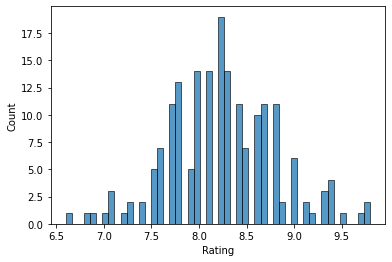

In [101]:
sns.histplot(x=df_imdb['Rating'],bins=50)

Can see peaks around 7.7,7.8 and from 8-8.4.

##### Number of episodes  above the mean rating:

In [102]:
df_imdb[df_imdb['Rating']>df_imdb['Rating'].mean()]

Season             Title    AirDate  Rating  Num_Votes  \
1         1     Diversity Day 2005-03-29     8.3       4213   
4         1        Basketball 2005-04-19     8.4       3745   
6         2       The Dundies 2005-09-20     8.7       3780   
8         2   Office Olympics 2005-10-04     8.4       3218   
9         2          The Fire 2005-10-11     8.4       3183   
..      ...               ...        ...     ...        ...   
138       7  Search Committee 2011-05-19     8.8       2344   
171       9  Dwight Christmas 2012-12-06     8.3       1918   
183       9  Livin' the Dream 2013-05-02     9.0       2439   
184       9          A.A.R.M. 2013-05-09     9.5       3401   
185       9            Finale 2013-05-16     9.8       9269   

            DirectedBy             WrittenBy  year  month  day  \
1           Ken Kwapis           B. J. Novak  2005      3    1   
4         Greg Daniels          Greg Daniels  2005      4    1   
6         Greg Daniels          Mindy Kaling  2005      9    1   
8            Paul Feig         Michael Schur  2005     10    1   
9           Ken Kwapis           B. J. Novak  2005     10    1   
..                 ...                   ...   ...    ...  ...   
138      Jeffrey Blitz      Paul Lieberstein  2011      5    3   
171  Charles McDougall        Robert Padnick  2012     12    3   
183      Jeffrey Blitz  Niki Schwartz-Wright  2013      5    3   
184       David Rogers       Brent Forrester  2013      5    3   
185         Ken Kwapis          Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
1                                                  5.0  
4                                                 26.0  
6                                                  0.0  
8                                                 14.0  
9                                                 21.0  
..                                                 ...  
138                                              238.0  
171                                               77.0  
183                                              224.0  
184                                              231.0  
185                                              238.0  

[86 rows x 11 columns]

86 episodes(46%) had a rating above the mean/median rating of 8.2

##### Highest and lowest rated episodes:

In [105]:
df_imdb[df_imdb['Rating']==df_imdb['Rating'].max()]

Season             Title    AirDate  Rating  Num_Votes  DirectedBy  \
135       7  Goodbye, Michael 2011-04-28     9.8       6909   Paul Feig   
185       9            Finale 2013-05-16     9.8       9269  Ken Kwapis   

        WrittenBy  year  month  day  \
135  Greg Daniels  2011      4    3   
185  Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
135                                              217.0  
185                                              238.0

In [106]:
df_imdb[df_imdb['Rating']==df_imdb['Rating'].min()]

Season         Title    AirDate  Rating  Num_Votes    DirectedBy  \
157       8  Get the Girl 2012-03-15     6.6       1944  Rainn Wilson   

          WrittenBy  year  month  day  \
157  Charlie Grandy  2012      3    3   

     Difference in days between air dates(season-wise)  
157                                              175.0

Both the highest rated episodes were written by Greg Daniels. Point to note here is that season 7 episode "Goodbye, Michael" marks the leaving of Michael from the show whereas he reappears after two complete seasons in the Finale episode of season 9 for a cameo!Lowest rated episode belonged to season 8.

### EXPLORING VOTES DATA (column - "Num_Votes")

In [107]:
df_imdb['Num_Votes'].describe() 

count     186.000000
mean     2492.059140
std       929.401657
min      1630.000000
25%      1918.000000
50%      2295.000000
75%      2771.000000
max      9269.000000
Name: Num_Votes, dtype: float64

In [108]:
df_imdb.groupby('Season')['Num_Votes'].describe()

count         mean          std     min      25%     50%      75%  \
Season                                                                      
1         6.0  3773.833333   415.247115  3372.0  3455.00  3640.5  4096.00   
2        22.0  3069.045455   392.830325  2719.0  2792.00  2960.5  3198.75   
3        23.0  2835.826087   265.815324  2618.0  2652.50  2772.0  2878.50   
4        14.0  2816.214286   660.534769  2305.0  2473.50  2559.5  2752.00   
5        26.0  2524.000000   946.336684  2132.0  2195.75  2299.0  2425.50   
6        24.0  2175.458333   452.015965  1850.0  1922.00  2049.5  2214.75   
7        24.0  2398.500000  1096.799336  1871.0  1934.00  1996.5  2251.00   
8        24.0  1803.666667   113.483447  1630.0  1717.75  1796.0  1857.25   
9        23.0  2174.913043  1591.441054  1641.0  1695.00  1743.0  1838.00   

           max  
Season          
1       4349.0  
2       4195.0  
3       3608.0  
4       4824.0  
5       7058.0  
6       4055.0  
7       6909.0  
8       2102.0  
9       9269.0

Season 8 has the lowest mean and its maximum value too lower than the other seasons.

##### Votes Distribution:

In [109]:
df_imdb['Num_Votes'].value_counts()

1918    2
3218    2
1720    2
1922    2
2065    2
       ..
1958    1
2981    1
1950    1
2723    1
2581    1
Name: Num_Votes, Length: 177, dtype: int64

<AxesSubplot:xlabel='Num_Votes', ylabel='Count'>

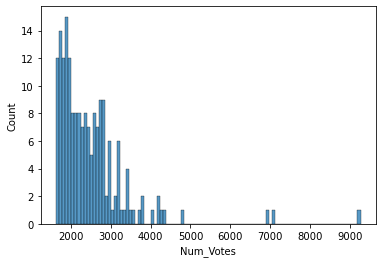

In [110]:
sns.histplot(x=df_imdb['Num_Votes'],bins=100)

In [111]:
df_imdb['Num_Votes'].min()

1630

High number of votes concentration below 2000, rest spread mostly between 2000-3000 votes 

##### Inspecting highest and lowest voted episodes:

In [112]:
df_imdb.sort_values(by=['Num_Votes'],ascending=False).head(10)

Season                  Title    AirDate  Rating  Num_Votes  \
185       9                 Finale 2013-05-16     9.8       9269   
77        5          Stress Relief 2009-02-01     9.7       7058   
135       7       Goodbye, Michael 2011-04-28     9.8       6909   
59        4           Dinner Party 2008-04-10     9.4       4824   
0         1                  Pilot 2005-03-24     7.5       4349   
130       7  Threat Level Midnight 2011-02-17     9.4       4236   
1         1          Diversity Day 2005-03-29     8.3       4213   
27        2           Casino Night 2006-05-11     9.4       4195   
94        6    Niagara: Part 1 & 2 2009-10-08     9.4       4055   
17        2             The Injury 2006-01-12     9.1       3783   

        DirectedBy                                         WrittenBy  year  \
185     Ken Kwapis                                      Greg Daniels  2013   
77   Jeffrey Blitz                                  Paul Lieberstein  2009   
135      Paul Feig                                      Greg Daniels  2011   
59       Paul Feig                   Gene Stupnitsky | Lee Eisenberg  2008   
0       Ken Kwapis  Ricky Gervais |Stephen Merchant and Greg Daniels  2005   
130   Tucker Gates                                       B. J. Novak  2011   
1       Ken Kwapis                                       B. J. Novak  2005   
27      Ken Kwapis                                      Steve Carell  2006   
94       Paul Feig                       Greg Daniels | Mindy Kaling  2009   
17    Bryan Gordon                                      Mindy Kaling  2006   

     month  day  Difference in days between air dates(season-wise)  
185      5    3                                              238.0  
77       2    6                                              129.0  
135      4    3                                              217.0  
59       4    3                                              196.0  
0        3    3                                                0.0  
130      2    3                                              147.0  
1        3    1                                                5.0  
27       5    3                                              233.0  
94      10    3                                               21.0  
17       1    3                                              114.0

Since most episodes' number of votes are concentrated in the 1700-3000 range,the top 5 episodes on the list here are not just highly rated (>75th percentile of the ratings-8.6) but also the most popular episodes considering the comparatively much higher number of votes they has received!

In [113]:
df_imdb.sort_values(by=['Num_Votes'],ascending=True).head(10)

Season                Title    AirDate  Rating  Num_Votes  \
161       8             Turf War 2012-05-03     7.6       1630   
176       9            Vandalism 2013-01-31     7.5       1641   
175       9      Junior Salesman 2013-01-31     7.6       1644   
169       9            The Whale 2012-11-15     7.6       1652   
177       9     Couples Discount 2013-02-07     7.3       1655   
152       8      Special Project 2012-02-09     7.7       1671   
156       8  Last Day in Florida 2012-03-08     7.8       1681   
180       9               Promos 2013-04-04     8.0       1691   
170       9           The Target 2012-11-29     7.8       1693   
160       8           Fundraiser 2012-04-26     7.1       1694   

           DirectedBy                              WrittenBy  year  month  \
161       Daniel Chun  Warren Lieberstein | Halsted Sullivan  2012      5   
176          Lee Kirk                         Owen Ellickson  2013      1   
175      David Rogers                          Carrie Kemper  2013      1   
169    Rodman Flender                          Carrie Kemper  2012     11   
177       Troy Miller                      Allison Silverman  2013      2   
152      David Rogers                        Amelie Gillette  2012      2   
156         Matt Sohn                         Robert Padnick  2012      3   
180  Jennifer Celotta                          Tim McAuliffe  2013      4   
170   Brent Forrester                          Graham Wagner  2012     11   
160      David Rogers                         Owen Ellickson  2012      4   

     day  Difference in days between air dates(season-wise)  
161    3                                              224.0  
176    3                                              133.0  
175    3                                              133.0  
169    3                                               56.0  
177    3                                              140.0  
152    3                                              140.0  
156    3                                              168.0  
180    3                                              196.0  
170    3                                               70.0  
160    3                                              217.0

The low votes suggest that after Michael left viewers lost interest hence didnt watch the show/didnt want to vote.

##### Highest and lowest voted episodes:

In [117]:
#Highest voted episode (also a highest rated episode)
df_imdb[df_imdb['Num_Votes']==df_imdb['Num_Votes'].max()]

Season   Title    AirDate  Rating  Num_Votes  DirectedBy     WrittenBy  \
185       9  Finale 2013-05-16     9.8       9269  Ken Kwapis  Greg Daniels   

     year  month  day  Difference in days between air dates(season-wise)  
185  2013      5    3                                              238.0

In [118]:
df_imdb[df_imdb['Num_Votes']==df_imdb['Num_Votes'].min()]

Season     Title    AirDate  Rating  Num_Votes   DirectedBy  \
161       8  Turf War 2012-05-03     7.6       1630  Daniel Chun   

                                 WrittenBy  year  month  day  \
161  Warren Lieberstein | Halsted Sullivan  2012      5    3   

     Difference in days between air dates(season-wise)  
161                                              224.0

The season finale is the highest rated and voted episode.Lowest voted episode belonged to season 8.

### EXPLORING DIRECTORS OF THE SHOW DATA (column - "DirectedBy")

In [120]:
df_imdb['DirectedBy'].nunique()

55

In [121]:
df_imdb['DirectedBy'].value_counts()

Randall Einhorn      15
Paul Feig            14
Greg Daniels         13
Ken Kwapis           13
Jeffrey Blitz        11
Ken Whittingham       9
David Rogers          9
Charles McDougall     8
Matt Sohn             8
Paul Lieberstein      7
B. J. Novak           5
Brent Forrester       4
Tucker Gates          4
Steve Carell          3
John Krasinski        3
Harold Ramis          3
Troy Miller           3
Rainn Wilson          3
Jennifer Celotta      3
Claire Scanlon        2
Seth Gordon           2
Dean Holland          2
Jason Reitman         2
Julian Farino         2
Rodman Flender        2
Bryan Gordon          2
Joss Whedon           2
Ed Helms              2
Victor Nelli, Jr.     2
Mindy Kaling          2
Dennie Gordon         2
Miguel Arteta         1
Kelly Cantley         1
Eric Appel            1
John Stuart Scott     1
Lee Eisenberg         1
Gene Stupnitsky       1
Reggie Hudlin         1
Charlie Grandy        1
Asaad Kelada          1
Stephen Merchant      1
Danny Leiner    

Characters of the show like Paul Lieberstein(Toby),B. J. Novak(Ryan),Rainn Wilson(Dwight),Steve Carell(Michael),John Krasinski(Jim),Ed Helms(Andy),Mindy Kaling(Kelly) and Brian Baumgartner(Kevin) directed episodes apart from acting too.

In [122]:
df_imdb.groupby('Season')['DirectedBy'].nunique()

Season
1     5
2     8
3    12
4    11
5    16
6    19
7    20
8    16
9    18
Name: DirectedBy, dtype: int64

Season 7 had the highest number of unique directors. Except for one episode in season 1 all episodes were directed by a different director, while for season 7- 20 out of 24 episodes were directed by a different director.

##### Relation between Directors and Rating:

In [123]:
ab=df_imdb['DirectedBy'].unique() #checking for spelling errors
print(sorted(ab))

['Alex Hardcastle', 'Amy Heckerling', 'Asaad Kelada', 'B. J. Novak', 'Brent Forrester', 'Brian Baumgartner', 'Bryan Cranston', 'Bryan Gordon', 'Charles McDougall', 'Charlie Grandy', 'Claire Scanlon', 'Craig Zisk', 'Daniel Chun', 'Danny Leiner', 'David Rogers', 'Dean Holland', 'Dennie Gordon', 'Ed Helms', 'Eric Appel', 'Gene Stupnitsky', 'Greg Daniels', 'Harold Ramis', 'J. J. Abrams', 'Jason Reitman', 'Jeffrey Blitz', 'Jennifer Celotta', 'Jesse Peretz', 'John Krasinski', 'John Stuart Scott', 'Jon Favreau', 'Joss Whedon', 'Julian Farino', 'Kelly Cantley', 'Ken Kwapis', 'Ken Whittingham', 'Lee Eisenberg', 'Lee Kirk', 'Marc Webb', 'Matt Sohn', 'Michael Spiller', 'Miguel Arteta', 'Mindy Kaling', 'Paul Feig', 'Paul Lieberstein', 'Rainn Wilson', 'Randall Einhorn', 'Reggie Hudlin', 'Rodman Flender', 'Roger Nygard', 'Seth Gordon', 'Stephen Merchant', 'Steve Carell', 'Troy Miller', 'Tucker Gates', 'Victor Nelli, Jr.']


In [124]:
#considering directors who directed atleast 6 episodes (season 1 length)
ccc=df_imdb['DirectedBy'].value_counts().head(10).index.tolist()
ccc

['Randall Einhorn',
 'Paul Feig',
 'Greg Daniels',
 'Ken Kwapis',
 'Jeffrey Blitz',
 'Ken Whittingham',
 'David Rogers',
 'Charles McDougall',
 'Matt Sohn',
 'Paul Lieberstein']

In [125]:
df_dir=df_imdb[df_imdb['DirectedBy'].isin(ccc)]
df_dir

Season             Title    AirDate  Rating  Num_Votes        DirectedBy  \
0         1             Pilot 2005-03-24     7.5       4349        Ken Kwapis   
1         1     Diversity Day 2005-03-29     8.3       4213        Ken Kwapis   
2         1       Health Care 2005-04-05     7.8       3536   Ken Whittingham   
4         1        Basketball 2005-04-19     8.4       3745      Greg Daniels   
6         2       The Dundies 2005-09-20     8.7       3780      Greg Daniels   
..      ...               ...        ...     ...        ...               ...   
179       9          The Farm 2013-03-14     7.5       1931  Paul Lieberstein   
181       9     Stairmageddon 2013-04-11     8.0       1743         Matt Sohn   
183       9  Livin' the Dream 2013-05-02     9.0       2439     Jeffrey Blitz   
184       9          A.A.R.M. 2013-05-09     9.5       3401      David Rogers   
185       9            Finale 2013-05-16     9.8       9269        Ken Kwapis   

                                            WrittenBy  year  month  day  \
0    Ricky Gervais |Stephen Merchant and Greg Daniels  2005      3    3   
1                                         B. J. Novak  2005      3    1   
2                                    Paul Lieberstein  2005      4    1   
4                                        Greg Daniels  2005      4    1   
6                                        Mindy Kaling  2005      9    1   
..                                                ...   ...    ...  ...   
179                                  Paul Lieberstein  2013      3    3   
181                                      Dan Sterling  2013      4    3   
183                              Niki Schwartz-Wright  2013      5    3   
184                                   Brent Forrester  2013      5    3   
185                                      Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
0                                                  0.0  
1                                                  5.0  
2                                                 12.0  
4                                                 26.0  
6                                                  0.0  
..                                                 ...  
179                                              175.0  
181                                              203.0  
183                                              224.0  
184                                              231.0  
185                                              238.0  

[107 rows x 11 columns]

### EXPLORING WRITERS OF THE SHOW DATA (column - "WrittenBy")

In [127]:
df_imdb['WrittenBy'].nunique()

47

In [128]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                        20
B. J. Novak                                         15
Paul Lieberstein                                    13
Greg Daniels                                         9
Brent Forrester                                      9
Justin Spitzer                                       9
Gene Stupnitsky | Lee Eisenberg                      8
Jennifer Celotta                                     8
Charlie Grandy                                       7
Michael Schur                                        7
Daniel Chun                                          6
Aaron Shure                                          6
Lee Eisenberg | Gene Stupnitsky                      5
Robert Padnick                                       4
Warren Lieberstein | Halsted Sullivan                4
Owen Ellickson                                       4
Carrie Kemper                                        4
Steve Hely                                           3
Halsted Su

In [129]:
#cleaning
df_imdb['WrittenBy'].replace(['Lee Eisenberg | Gene Stupnitsky'], "Gene Stupnitsky | Lee Eisenberg", inplace=True)
df_imdb['WrittenBy'].replace(['Warren Lieberstein | Halsted Sullivan'], "Halsted Sullivan | Warren Lieberstein", inplace=True)
df_imdb['WrittenBy'].replace(['Michael Schur | Lee Eisenberg | Gene Stupnitsky'], "Lee Eisenberg | Gene Stupnitsky | Michael Schur", inplace=True)
df_imdb['WrittenBy'].replace(['Justin Spitzer | Brent Forrester'], "Brent Forrester | Justin Spitzer", inplace=True)
df_imdb['WrittenBy'].replace(['Ricky Gervais |Stephen Merchant and Greg Daniels'], "Ricky Gervais | Stephen Merchant | Greg Daniels", inplace=True)

In [130]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                       20
B. J. Novak                                        15
Gene Stupnitsky | Lee Eisenberg                    13
Paul Lieberstein                                   13
Greg Daniels                                        9
Brent Forrester                                     9
Justin Spitzer                                      9
Jennifer Celotta                                    8
Charlie Grandy                                      7
Michael Schur                                       7
Halsted Sullivan | Warren Lieberstein               7
Daniel Chun                                         6
Aaron Shure                                         6
Robert Padnick                                      4
Owen Ellickson                                      4
Carrie Kemper                                       4
Steve Hely                                          3
Allison Silverman                                   3
Jennifer Celotta | Paul Lieb

Mindy Kaling(Kelly), B. J. Novak(Ryan) and Paul Lieberstein(Toby) were regular writers of the show, having written the highest number of episodes!Steve Carell also wrote couple of episodes.

In [131]:
df_imdb.groupby('Season')['WrittenBy'].nunique()

Season
1     6
2     9
3    15
4    11
5    14
6    14
7    16
8    15
9    14
Name: WrittenBy, dtype: int64

Season 7 had the highest number of unique writers too.

In [132]:
abc=df_imdb['WrittenBy'].unique() #checking for spelling errors
print(sorted(abc))

['Aaron Shure', 'Allison Silverman', 'Amelie Gillette', 'Anthony Q. Farrell', 'B. J. Novak', 'Brent Forrester', 'Brent Forrester | Justin Spitzer', 'Caroline Williams', 'Carrie Kemper', 'Charlie Grandy', 'Dan Greaney', 'Dan Sterling', 'Daniel Chun', 'Gene Stupnitsky | Lee Eisenberg', 'Graham Wagner', 'Greg Daniels', 'Greg Daniels | Mindy Kaling', 'Halsted Sullivan | Warren Lieberstein', 'Jason Kessler', 'Jennifer Celotta', 'Jennifer Celotta | Greg Daniels', 'Jennifer Celotta | Paul Lieberstein', 'Jon Vitti', 'Jonathan Green | Gabe Miller', 'Jonathan Hughes', 'Justin Spitzer', 'Larry Wilmore', 'Lee Eisenberg | Gene Stupnitsky | Michael Schur', 'Lester Lewis', 'Michael Schur', 'Mindy Kaling', 'Niki Schwartz-Wright', 'Owen Ellickson', 'Paul Lieberstein', 'Paul Lieberstein | Michael Schur', 'Peter Ocko', 'Ricky Gervais | Stephen Merchant', 'Ricky Gervais | Stephen Merchant | Greg Daniels', 'Robert Padnick', 'Ryan Koh', 'Steve Carell', 'Steve Hely', 'Tim McAuliffe']


In [133]:
#considering writers who directed atleast 6 episodes (season 1 length)
cccc=df_imdb['WrittenBy'].value_counts().head(13).index.tolist()
cccc

['Mindy Kaling',
 'B. J. Novak',
 'Gene Stupnitsky | Lee Eisenberg',
 'Paul Lieberstein',
 'Greg Daniels',
 'Brent Forrester',
 'Justin Spitzer',
 'Jennifer Celotta',
 'Charlie Grandy',
 'Michael Schur',
 'Halsted Sullivan | Warren Lieberstein',
 'Daniel Chun',
 'Aaron Shure']

In [134]:
df_wri=df_imdb[df_imdb['WrittenBy'].isin(cccc)]
df_wri

Season           Title    AirDate  Rating  Num_Votes        DirectedBy  \
1         1   Diversity Day 2005-03-29     8.3       4213        Ken Kwapis   
2         1     Health Care 2005-04-05     7.8       3536   Ken Whittingham   
3         1    The Alliance 2005-04-12     8.1       3428      Bryan Gordon   
4         1      Basketball 2005-04-19     8.4       3745      Greg Daniels   
5         1        Hot Girl 2005-04-26     7.8       3372    Amy Heckerling   
..      ...             ...        ...     ...        ...               ...   
166       9        Work Bus 2012-10-18     7.8       1809    Bryan Cranston   
179       9        The Farm 2013-03-14     7.5       1931  Paul Lieberstein   
182       9  Paper Airplane 2013-04-25     8.0       1748      Jesse Peretz   
184       9        A.A.R.M. 2013-05-09     9.5       3401      David Rogers   
185       9          Finale 2013-05-16     9.8       9269        Ken Kwapis   

                                 WrittenBy  year  month  day  \
1                              B. J. Novak  2005      3    1   
2                         Paul Lieberstein  2005      4    1   
3                            Michael Schur  2005      4    1   
4                             Greg Daniels  2005      4    1   
5                             Mindy Kaling  2005      4    1   
..                                     ...   ...    ...  ...   
166                        Brent Forrester  2012     10    3   
179                       Paul Lieberstein  2013      3    3   
182  Halsted Sullivan | Warren Lieberstein  2013      4    3   
184                        Brent Forrester  2013      5    3   
185                           Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  
1                                                  5.0  
2                                                 12.0  
3                                                 19.0  
4                                                 26.0  
5                                                 33.0  
..                                                 ...  
166                                               28.0  
179                                              175.0  
182                                              217.0  
184                                              231.0  
185                                              238.0  

[129 rows x 11 columns]

In [136]:
d=df_imdb.groupby('Season')['DirectedBy'].nunique().tolist()#saving number of unique directors season-wise in a list

In [137]:
w=df_imdb.groupby('Season')['WrittenBy'].nunique().tolist()

In [138]:
dp=(df_imdb.groupby('Season')['DirectedBy'].nunique()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
dp=np.around(dp,1)
dp

array([83.3, 36.4, 52.2, 78.6, 61.5, 79.2, 83.3, 66.7, 78.3])

In [139]:
wp=(df_imdb.groupby('Season')['WrittenBy'].nunique()*100/df.groupby('season')['episode'].nunique()).tolist()
wp=np.around(wp,1)
wp

array([100. ,  40.9,  65.2,  78.6,  53.8,  58.3,  66.7,  62.5,  60.9])

In [269]:
import plotly.graph_objects as go


fig = go.Figure(data=[
   
    go.Bar(name='Directors', x=[1,2,3,4,5,6,7,8,9], y=d,text=dp,textposition='auto'),
     go.Bar(name='Writers', x=[1,2,3,4,5,6,7,8,9], y=w,text=wp,textposition='auto')
])
# Change the bar mode
fig.update_layout(title='Season-wise number of unique directors and writers',barmode='group')
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of directors/writers")
fig.show()

Percentages displayed with respect to total number of episodes in that particular season. Apart from season 1, Season 7 has the highest number of unique directors(20) and unique writers(16) for the 24 episodes that it had. Can say that season 7 is the season whose each episode was the most unique.

#### Is there a relation between ratings and the number of co-writers? 

In [141]:
df_imdb['new_written']=df_imdb.WrittenBy.str.replace('|',',')

In [142]:
df_cowri=df_imdb[df_imdb['new_written'].str.contains(',')] #saving all episodes that were written by more than one writer

In [143]:
len(df_cowri)

33

In [144]:
df_1wri=df_imdb[~df_imdb['new_written'].str.contains(',')] #only one writer

In [272]:
fig=go.Figure()
fig.add_trace(go.Box(x=df_cowri['Season'], y=df_cowri['Rating'],boxpoints='all', name='More than 1 writer'
))
fig.add_trace(go.Box(x=df_1wri['Season'], y=df_1wri['Rating'],boxpoints='all', name='One writer'
))

fig.update_layout(title='Season-wise relation between number of co-writers and rating',boxmode='group') # group together boxes of the different traces for each value of x)
fig.update_xaxes(title="Season",tickvals=[1,2,3,4,5,6,7,8,9])
fig.update_yaxes(title="Rating")
fig.show()

In [146]:
df_imdb[~df_imdb['new_written'].str.contains(',')]['Rating'].median() #only 1 writer

8.2

In [147]:
df_imdb[df_imdb['new_written'].str.contains(',')]['Rating'].median() #more than one writer

8.3

Nothing conclusive can be said here since the number of episodes written by more than one writer is only 33/186 making the data too skewed for comparison.

#### Do any particular director-writer combination fare better ratings?

In [148]:
gj=list(zip(df_imdb['DirectedBy'],df_imdb['WrittenBy'])) #combining writers and directors in a list
gj

[('Ken Kwapis', 'Ricky Gervais | Stephen Merchant | Greg Daniels'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Ken Whittingham', 'Paul Lieberstein'),
 ('Bryan Gordon', 'Michael Schur'),
 ('Greg Daniels', 'Greg Daniels'),
 ('Amy Heckerling', 'Mindy Kaling'),
 ('Greg Daniels', 'Mindy Kaling'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Paul Feig', 'Michael Schur'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Paul Feig', 'Greg Daniels'),
 ('Ken Kwapis', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Greg Daniels', 'Paul Lieberstein'),
 ('Paul Feig', 'Larry Wilmore'),
 ('Paul Feig', 'Jennifer Celotta'),
 ('Charles McDougall', 'Michael Schur'),
 ('Ken Kwapis', 'Greg Daniels'),
 ('Bryan Gordon', 'Mindy Kaling'),
 ('Dennie Gordon', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Victor Nelli, Jr.', 'Paul Lieberstein'),
 ('Dennie Gordon', 'B. J. Novak'),
 ('Greg Daniels', 'Michael Schur'),
 ('Charles McDougall', 'Paul Lieberstein'),
 ('Victor Nelli, Jr.', 'Mindy Kaling'),
 ('Ken Whittingham', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Gre

In [149]:
df_imdb['Combined']=gj #assigning a column
df_imdb

Season             Title    AirDate  Rating  Num_Votes       DirectedBy  \
0         1             Pilot 2005-03-24     7.5       4349       Ken Kwapis   
1         1     Diversity Day 2005-03-29     8.3       4213       Ken Kwapis   
2         1       Health Care 2005-04-05     7.8       3536  Ken Whittingham   
3         1      The Alliance 2005-04-12     8.1       3428     Bryan Gordon   
4         1        Basketball 2005-04-19     8.4       3745     Greg Daniels   
..      ...               ...        ...     ...        ...              ...   
181       9     Stairmageddon 2013-04-11     8.0       1743        Matt Sohn   
182       9    Paper Airplane 2013-04-25     8.0       1748     Jesse Peretz   
183       9  Livin' the Dream 2013-05-02     9.0       2439    Jeffrey Blitz   
184       9          A.A.R.M. 2013-05-09     9.5       3401     David Rogers   
185       9            Finale 2013-05-16     9.8       9269       Ken Kwapis   

                                           WrittenBy  year  month  day  \
0    Ricky Gervais | Stephen Merchant | Greg Daniels  2005      3    3   
1                                        B. J. Novak  2005      3    1   
2                                   Paul Lieberstein  2005      4    1   
3                                      Michael Schur  2005      4    1   
4                                       Greg Daniels  2005      4    1   
..                                               ...   ...    ...  ...   
181                                     Dan Sterling  2013      4    3   
182            Halsted Sullivan | Warren Lieberstein  2013      4    3   
183                             Niki Schwartz-Wright  2013      5    3   
184                                  Brent Forrester  2013      5    3   
185                                     Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  \
0                                                  0.0   
1                                                  5.0   
2                                                 12.0   
3                                                 19.0   
4                                                 26.0   
..                                                 ...   
181                                              203.0   
182                                              217.0   
183                                              224.0   
184                                              231.0   
185                                              238.0   

                                         new_written  \
0    Ricky Gervais , Stephen Merchant , Greg Daniels   
1                                        B. J. Novak   
2                                   Paul Lieberstein   
3                                      Michael Schur   
4                                       Greg Daniels   
..                                               ...   
181                                     Dan Sterling   
182            Halsted Sullivan , Warren Lieberstein   
183                             Niki Schwartz-Wright   
184                                  Brent Forrester   
185                                     Greg Daniels   

                                              Combined  
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...  
1                            (Ken Kwapis, B. J. Novak)  
2                  (Ken Whittingham, Paul Lieberstein)  
3                        (Bryan Gordon, Michael Schur)  
4                         (Greg Daniels, Greg Daniels)  
..                                                 ...  
181                          (Matt Sohn, Dan Sterling)  
182  (Jesse Peretz, Halsted Sullivan | Warren Liebe...  
183              (Jeffrey Blitz, Niki Schwartz-Wright)  
184                    (David Rogers, Brent Forrester)  
185                         (Ken Kwapis, Greg Daniels)  

[186 rows x 13 columns]

In [150]:
#adding episode numbers
ep_no=[]
for i in range (1,187):
    ep_no.append(i)
    
df_imdb['episode_no']=ep_no

In [151]:
import itertools
from pprint import pprint

# Flatten the list and make all names unique
unique_names = set(gj)

# Get all combinations of pairs
result = {pair: (len([x for x in gj if set(pair) == set(x)])) for (pair) in (unique_names)} 

import operator
cd = sorted(result.items(),key=operator.itemgetter(1),reverse=True)
cd

[(('Randall Einhorn', 'Mindy Kaling'), 4),
 (('Paul Feig', 'Gene Stupnitsky | Lee Eisenberg'), 4),
 (('Paul Lieberstein', 'Paul Lieberstein'), 4),
 (('Greg Daniels', 'Greg Daniels'), 3),
 (('Ken Kwapis', 'B. J. Novak'), 3),
 (('Ken Kwapis', 'Greg Daniels'), 3),
 (('Jeffrey Blitz', 'Paul Lieberstein'), 2),
 (('Ken Whittingham', 'Gene Stupnitsky | Lee Eisenberg'), 2),
 (('Greg Daniels', 'Paul Lieberstein'), 2),
 (('Randall Einhorn', 'Brent Forrester | Justin Spitzer'), 2),
 (('B. J. Novak', 'B. J. Novak'), 2),
 (('Tucker Gates', 'Gene Stupnitsky | Lee Eisenberg'), 2),
 (('David Rogers', 'Carrie Kemper'), 2),
 (('Randall Einhorn', 'Brent Forrester'), 2),
 (('Paul Feig', 'Greg Daniels'), 2),
 (('Greg Daniels', 'Lee Eisenberg | Gene Stupnitsky | Michael Schur'), 2),
 (('Randall Einhorn', 'Aaron Shure'), 2),
 (('Jeffrey Blitz', 'B. J. Novak'), 2),
 (('Charles McDougall', 'Paul Lieberstein'), 2),
 (('David Rogers', 'Brent Forrester'), 2),
 (('B. J. Novak', 'Steve Hely'), 2),
 (('Matt Sohn', '

In [152]:
cddd=[a_tup[0] for a_tup in cd[:23]] 
cddd #pairs who directed+wrote more than one episode

[('Randall Einhorn', 'Mindy Kaling'),
 ('Paul Feig', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Paul Lieberstein', 'Paul Lieberstein'),
 ('Greg Daniels', 'Greg Daniels'),
 ('Ken Kwapis', 'B. J. Novak'),
 ('Ken Kwapis', 'Greg Daniels'),
 ('Jeffrey Blitz', 'Paul Lieberstein'),
 ('Ken Whittingham', 'Gene Stupnitsky | Lee Eisenberg'),
 ('Greg Daniels', 'Paul Lieberstein'),
 ('Randall Einhorn', 'Brent Forrester | Justin Spitzer'),
 ('B. J. Novak', 'B. J. Novak'),
 ('Tucker Gates', 'Gene Stupnitsky | Lee Eisenberg'),
 ('David Rogers', 'Carrie Kemper'),
 ('Randall Einhorn', 'Brent Forrester'),
 ('Paul Feig', 'Greg Daniels'),
 ('Greg Daniels', 'Lee Eisenberg | Gene Stupnitsky | Michael Schur'),
 ('Randall Einhorn', 'Aaron Shure'),
 ('Jeffrey Blitz', 'B. J. Novak'),
 ('Charles McDougall', 'Paul Lieberstein'),
 ('David Rogers', 'Brent Forrester'),
 ('B. J. Novak', 'Steve Hely'),
 ('Matt Sohn', 'Allison Silverman'),
 ('Ken Kwapis', 'Mindy Kaling')]

In [153]:
df_dir_wri=df_imdb[df_imdb['Combined'].isin(cddd)]
df_dir_wri #saving pairs who worked together in more than one ep

Season                        Title    AirDate  Rating  Num_Votes  \
1         1                Diversity Day 2005-03-29     8.3       4213   
4         1                   Basketball 2005-04-19     8.4       3745   
7         2            Sexual Harassment 2005-09-27     8.2       3218   
9         2                     The Fire 2005-10-11     8.4       3183   
10        2                    Halloween 2005-10-18     8.1       2992   
12        2                   The Client 2005-11-08     8.6       3087   
16        2                 Booze Cruise 2006-01-05     8.6       3115   
22        2              Dwight's Speech 2006-03-02     8.5       2875   
24        2           Michael's Birthday 2006-03-30     8.1       2719   
28        3               Gay Witch Hunt 2006-09-21     9.0       3608   
29        3               The Convention 2006-09-28     8.2       2663   
30        3                     The Coup 2006-10-05     8.6       2787   
39        3           Traveling Salesmen 2007-01-11     8.6       2688   
40        3                   The Return 2007-01-18     8.8       2822   
41        3                 Ben Franklin 2007-02-01     8.1       2618   
47        3               Product Recall 2007-04-26     8.8       2790   
48        3         Women's Appreciation 2007-05-03     8.8       2785   
51        4                      Fun Run 2007-09-27     8.8       3262   
54        4                        Money 2007-10-18     8.7       2707   
59        4                 Dinner Party 2008-04-10     9.4       4824   
60        4                  Chair Model 2008-04-17     8.1       2439   
62        4               Did I Stutter? 2008-05-01     8.3       2434   
63        4                     Job Fair 2008-05-08     7.8       2305   
65        5                  Weight Loss 2008-09-25     8.8       2880   
71        5                Business Trip 2008-11-13     8.2       2201   
73        5                  The Surplus 2008-12-04     8.8       2437   
77        5                Stress Relief 2009-02-01     9.7       7058   
78        5      Lecture Circuit: Part 1 2009-02-05     8.2       2169   
79        5      Lecture Circuit: Part 2 2009-02-12     8.2       2132   
80        5                  Blood Drive 2009-03-05     8.0       2164   
81        5                Golden Ticket 2009-03-12     8.7       2333   
82        5                     New Boss 2009-03-19     8.3       2194   
91        6                       Gossip 2009-09-17     8.8       2504   
92        6                  The Meeting 2009-09-24     8.1       2057   
95        6                        Mafia 2009-10-15     7.6       2156   
102       6                 Secret Santa 2009-12-10     8.5       2162   
113       6                    The Chump 2010-05-13     7.8       1850   
116       7                   Counseling 2010-09-30     8.2       1991   
118       7                       Sex Ed 2010-10-14     7.9       1937   
119       7                    The Sting 2010-10-21     7.8       1896   
126       7                    Ultimatum 2011-01-20     8.3       2002   
127       7                  The Seminar 2011-01-27     7.7       1904   
135       7             Goodbye, Michael 2011-04-28     9.8       6909   
138       7             Search Committee 2011-05-19     8.8       2344   
139       8                     The List 2011-09-22     8.2       2102   
140       8                The Incentive 2011-09-29     8.1       1943   
145       8            Pam's Replacement 2011-11-10     7.7       1833   
149       8                       Trivia 2012-01-12     7.9       1742   
162       8  Free Family Portrait Studio 2012-05-10     7.7       1702   
163       9                     New Guys 2012-09-20     7.6       1837   
164       9                Roy's Wedding 2012-09-27     7.2       1730   
175       9              Junior Salesman 2013-01-31     7.6       1644   
179       9                     The Farm 2013-03-14     7.5       1931   
184      

In [154]:
cddc=[a_tup[0] for a_tup in cd[23:]] 
cddc #pairs who directed+wrote only 1 episode

[('Charlie Grandy', 'Dan Greaney'),
 ('Julian Farino', 'Justin Spitzer'),
 ('Matt Sohn', 'B. J. Novak'),
 ('David Rogers', 'Justin Spitzer'),
 ('Joss Whedon', 'Brent Forrester'),
 ('Ken Kwapis', 'Ricky Gervais | Stephen Merchant | Greg Daniels'),
 ('Brent Forrester', 'Anthony Q. Farrell'),
 ('Troy Miller', 'Allison Silverman'),
 ('John Krasinski', 'Charlie Grandy'),
 ('Matt Sohn', 'Charlie Grandy'),
 ('Charles McDougall', 'Robert Padnick'),
 ('Roger Nygard', 'Jennifer Celotta'),
 ('Randall Einhorn', 'Amelie Gillette'),
 ('Charles McDougall', 'Justin Spitzer'),
 ('Tucker Gates', 'B. J. Novak'),
 ('Tucker Gates', 'Michael Schur'),
 ('Charles McDougall', 'Halsted Sullivan | Warren Lieberstein'),
 ('Jesse Peretz', 'Halsted Sullivan | Warren Lieberstein'),
 ('Jason Reitman', 'B. J. Novak'),
 ('Steve Carell', 'Charlie Grandy'),
 ('John Stuart Scott', 'Charlie Grandy'),
 ('Stephen Merchant', 'Lester Lewis'),
 ('Paul Feig', 'Steve Carell'),
 ('David Rogers', 'Owen Ellickson'),
 ('Paul Feig', '

In [155]:
df_dir_wrin=df_imdb[df_imdb['Combined'].isin(cddc)]
df_dir_wrin #saving pairs who worked together in only one ep

Season             Title    AirDate  Rating  Num_Votes        DirectedBy  \
0         1             Pilot 2005-03-24     7.5       4349        Ken Kwapis   
2         1       Health Care 2005-04-05     7.8       3536   Ken Whittingham   
3         1      The Alliance 2005-04-12     8.1       3428      Bryan Gordon   
5         1          Hot Girl 2005-04-26     7.8       3372    Amy Heckerling   
6         2       The Dundies 2005-09-20     8.7       3780      Greg Daniels   
..      ...               ...        ...     ...        ...               ...   
178       9         Moving On 2013-02-14     8.1       1839       Jon Favreau   
180       9            Promos 2013-04-04     8.0       1691  Jennifer Celotta   
181       9     Stairmageddon 2013-04-11     8.0       1743         Matt Sohn   
182       9    Paper Airplane 2013-04-25     8.0       1748      Jesse Peretz   
183       9  Livin' the Dream 2013-05-02     9.0       2439     Jeffrey Blitz   

                                           WrittenBy  year  month  day  \
0    Ricky Gervais | Stephen Merchant | Greg Daniels  2005      3    3   
2                                   Paul Lieberstein  2005      4    1   
3                                      Michael Schur  2005      4    1   
5                                       Mindy Kaling  2005      4    1   
6                                       Mindy Kaling  2005      9    1   
..                                               ...   ...    ...  ...   
178                                    Graham Wagner  2013      2    3   
180                                    Tim McAuliffe  2013      4    3   
181                                     Dan Sterling  2013      4    3   
182            Halsted Sullivan | Warren Lieberstein  2013      4    3   
183                             Niki Schwartz-Wright  2013      5    3   

     Difference in days between air dates(season-wise)  \
0                                                  0.0   
2                                                 12.0   
3                                                 19.0   
5                                                 33.0   
6                                                  0.0   
..                                                 ...   
178                                              147.0   
180                                              196.0   
181                                              203.0   
182                                              217.0   
183                                              224.0   

                                         new_written  \
0    Ricky Gervais , Stephen Merchant , Greg Daniels   
2                                   Paul Lieberstein   
3                                      Michael Schur   
5                                       Mindy Kaling   
6                                       Mindy Kaling   
..                                               ...   
178                                    Graham Wagner   
180                                    Tim McAuliffe   
181                                     Dan Sterling   
182            Halsted Sullivan , Warren Lieberstein   
183                             Niki Schwartz-Wright   

                                              Combined  episode_no  
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1  
2                  (Ken Whittingham, Paul Lieberstein)           3  
3                        (Bryan Gordon, Michael Schur)           4  
5                       (Amy Heckerling, Mindy Kaling)           6  
6                         (Greg Daniels, Mindy Kaling)           7  
..                                                 ...         ...  
178                       (Jon Favreau, Graham Wagner)         179  
180                  (Jennifer Celotta, Tim McAuliffe)         181  
181                          (Matt Sohn, Dan Sterling)         182  
182  (Jesse Peretz, Halsted Sullivan | Warren Liebe...         183  
183           

In [273]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_dir_wri['Rating'],boxpoints='all',name='Worked together in atleast 2 episodes'))
fig.add_trace(go.Box(y=df_dir_wrin['Rating'],boxpoints='all',name='Worked together in only 1 episode'))
fig.update_layout(title='Comparison of director-writer pairs and Rating')
fig.update_yaxes(title="Rating")
fig.show()

Director-Writer pairs who have worked together in more than one episode seem to rake in slightly better ratings than those pairs who have worked together in only one episode.

In [157]:
df_dir_wri.groupby('Combined')['Rating'].value_counts()

Combined                                                         Rating
(B. J. Novak, B. J. Novak)                                       7.7       1
                                                                 8.2       1
(B. J. Novak, Steve Hely)                                        7.7       1
                                                                 7.9       1
(Charles McDougall, Paul Lieberstein)                            8.1       1
                                                                 8.5       1
(David Rogers, Brent Forrester)                                  7.6       1
                                                                 9.5       1
(David Rogers, Carrie Kemper)                                    7.6       1
                                                                 8.3       1
(Greg Daniels, Greg Daniels)                                     7.6       1
                                                                 8.4       1
    

In [158]:
df_dir_wri[df_dir_wri['Rating']>8.6].groupby('Combined')['Rating'].value_counts()

Combined                                                         Rating
(David Rogers, Brent Forrester)                                  9.5       1
(Greg Daniels, Greg Daniels)                                     8.8       1
(Greg Daniels, Lee Eisenberg | Gene Stupnitsky | Michael Schur)  8.8       1
(Jeffrey Blitz, Paul Lieberstein)                                8.8       1
                                                                 9.7       1
(Ken Kwapis, Greg Daniels)                                       9.0       1
                                                                 9.8       1
(Paul Feig, Gene Stupnitsky | Lee Eisenberg)                     8.8       2
                                                                 9.4       1
(Paul Feig, Greg Daniels)                                        9.8       1
(Paul Lieberstein, Paul Lieberstein)                             8.7       1
                                                                 8.8       1
(Ran

In [159]:
df_dir_wri[df_dir_wri['Rating']<7.8].groupby('Combined')['Rating'].value_counts()

Combined                              Rating
(B. J. Novak, B. J. Novak)            7.7       1
(B. J. Novak, Steve Hely)             7.7       1
(David Rogers, Brent Forrester)       7.6       1
(David Rogers, Carrie Kemper)         7.6       1
(Greg Daniels, Greg Daniels)          7.6       1
(Matt Sohn, Allison Silverman)        7.2       1
                                      7.7       1
(Paul Lieberstein, Paul Lieberstein)  7.5       1
Name: Rating, dtype: int64

For (Jeffrey Blitz, Paul Lieberstein)-2/2 episodes,(Ken Kwapis, Greg Daniels)-2/3 episodes and (Paul Feig, Gene Stupnitsky | Lee Eisenberg)-3/4 episodes that they worked together on have ratings > 75th percentile of ratings(>8.6).

While for (Matt Sohn, Allison Silverman)-2/2 episodes that they worked together on have ratings < 25th percentile of ratings(<7.8). 

In [275]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=df_dir_wrin['episode_no'], y=df_dir_wrin['Rating'],mode='markers',
                         name='Worked together in only 1 episode'
)) #one-time
fig.add_trace(go.Scatter(x=df_dir_wri['episode_no'], y=df_dir_wri['Rating'],mode='markers',
                         name='Worked together in atleast 2 episodes'
))#many
fig.update_layout(title='Episode-wise comparison of director-writer pairs and rating') # group together boxes of the different traces for each value of x)
fig.update_xaxes(title="Episode")
fig.update_yaxes(title="Rating")
fig.show()

Initially there is a mix of red and blue dots with similar ratings distribution but towards the last few episodes (Season 8 and 9-47 odd episodes) we see more blue dots than red dots. This means that the show experimented with fresh director-writer pairs(who directed only one episode) more often in the last few seasons.Let us inspect this further.

In [161]:
dp1=df_dir_wri.groupby('Season')['DirectedBy'].count().tolist() #saving number of director-writer pairs season-wise 
dp2=df_dir_wrin.groupby('Season')['DirectedBy'].count().tolist()

In [162]:
dpp1=(df_dir_wri.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist()
dpp1=np.around(dpp1,1)
dpp1

array([33.3, 31.8, 34.8, 42.9, 34.6, 20.8, 29.2, 20.8, 26.1])

In [163]:
dpp2=(df_dir_wrin.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist()
dpp2=np.around(dpp2,1)
dpp2

array([66.7, 68.2, 65.2, 57.1, 65.4, 79.2, 70.8, 79.2, 73.9])

#### Do actors make good directors/writers considering they know the show from a different perspective? 

In [165]:
listofdirs=['B. J. Novak','Steve Carell','Rainn Wilson','John Krasinski','Mindy Kaling','Ed Helms','Brian Baumgartner']
listofwrit=['Steve Carell']

In [166]:
df_star=df_imdb[df_imdb['DirectedBy'].isin(listofdirs)]

In [167]:
len(df_star)

19

In [168]:
import plotly.express as px
fig = px.strip(df_star,x='DirectedBy', y='Rating',title="Ratings distribution of episodes directed by Actors of the show",color='Season',
             hover_data=["Season","Title","episode_no"])
fig.show()

Although the number of episodes here are too less to form any conclusive observations,in Season 6 and 8, 5/7 actors directed an episode maybe to revive the low ratings. Half of the episodes belong to seasons 8 and 9 and most episodes are below median rating of 8.2. John Krasinski's all three episodes are lowly rated. Some iconic episodes like "Scott's Tots", "Michael's last dundies" and "Garage sale" feature here.

In [169]:
df_imdb[df_imdb['DirectedBy'].isin(listofdirs)].groupby('DirectedBy')['Rating'].value_counts()

DirectedBy         Rating
B. J. Novak        7.7       2
                   7.9       1
                   8.2       1
                   8.3       1
Brian Baumgartner  8.1       1
Ed Helms           7.1       1
                   8.0       1
John Krasinski     7.7       2
                   7.3       1
Mindy Kaling       8.0       1
                   9.0       1
Rainn Wilson       6.6       1
                   8.2       1
                   9.0       1
Steve Carell       7.9       1
                   9.2       1
                   9.3       1
Name: Rating, dtype: int64

5 episodes more than median rating of which 4 above 75th percentile.

In [170]:
df_imdb[df_imdb['WrittenBy'].isin(listofwrit)]

Season         Title    AirDate  Rating  Num_Votes  DirectedBy  \
27       2  Casino Night 2006-05-11     9.4       4195  Ken Kwapis   
57       4  Survivor Man 2007-11-08     8.2       2459   Paul Feig   

       WrittenBy  year  month  day  \
27  Steve Carell  2006      5    3   
57  Steve Carell  2007     11    3   

    Difference in days between air dates(season-wise)   new_written  \
27                                              233.0  Steve Carell   
57                                               42.0  Steve Carell   

                      Combined  episode_no  
27  (Ken Kwapis, Steve Carell)          28  
57   (Paul Feig, Steve Carell)          58

Two iconic episodes written by Steve Carell.

1) The show had 9 seasons in total. 86 episodes(46%) had a rating above the mean/median rating of 8.2 and most of the votes are concentrated between 1700-3000.

<br>2) Although season 3(with the highest median rating) had the highest number of scenes it has the third highest number of lines. Confirms that more scenes does not necessarily mean more lines in a season.

<br>3) Season 4 had only 14 episodes as the show had to stop production in November 2007 due to a writer’s strike when it was being shot. But three of its episodes feature in the overall Top 5 maximum lines list and maximum scenes list probably because of it being a shorter season.

<br>4) Season 5(with the highest number of episodes) had the highest number of lines and includes the most watched episode of the show "Stress Relief" which aired on NBC after the broadcast of Super Bowl XLIII, making it the only episode to reach over 20 million viewers.

5) Besides season 1,season 7 had the highest number of unique directors(20) and unique writers(16) for the 24 episodes that it had.

<br>6) Season 8's highest rated episode rating is same as the median rating across all episodes while the season has the lowest mean votes along with season 9.The season also features the lowest voted episode which suggests that after Michael left viewers lost interest hence did not watch the show/didnt want to vote.

<br>7) 57,973 lines were spoken in total by 699 speakers with the show's last season(Season 9) having the highest number of unique speakers(184).

<br>8) Characters of the show like Rainn Wilson(Dwight),Steve Carell(Michael),John Krasinski(Jim),Ed Helms(Andy) and Brian Baumgartner(Kevin) directed episodes while Mindy Kaling(Kelly),B. J. Novak(Ryan) and Paul Lieberstein(Toby) not only directed but were also regular writers of the show apart from acting in it.Steve Carell(Michael) also wrote couple of episodes.

### COMBINING BOTH DATASETS (df and df_imdb)

In [171]:
df_ep=df.drop_duplicates(['season','episode'])
df_ep

season  episode  scene  \
0           1        1      1   
270         1        2      1   
567         1        3      1   
891         1        4      1   
1251        1        5      1   
...       ...      ...    ...   
57997       9       19      1   
58270       9       20      1   
58504       9       21      1   
58886       9       22      1   
59387       9       23      1   

                                               line_text  speaker  
0      All right Jim. Your quarterlies look very good...  Michael  
270                 Hey, uh, can I help you out in here?  Michael  
567     Pam. Pamela. Pam-elama-ding-dong. Making copies.  Michael  
891                                            Michael!?   Dwight  
1251                           [to Jim]: Hey, you ready?  Michael  
...                                                  ...      ...  
57997  [humming] What the hell? No. This is NOT happe...  Stanley  
58270                                Oh. Hey, champions.     Erin  
58504  I���m taking some time off from work���well, m...      Jim  
58886                      The tea in Nepal is very hot.     Erin  
59387  The documentary series finished airing ages ag...   Dwight  

[186 rows x 5 columns]

In [172]:
df_ep.reset_index(drop=True, inplace=True)
df_ep

season  episode  scene  \
0         1        1      1   
1         1        2      1   
2         1        3      1   
3         1        4      1   
4         1        5      1   
..      ...      ...    ...   
181       9       19      1   
182       9       20      1   
183       9       21      1   
184       9       22      1   
185       9       23      1   

                                             line_text  speaker  
0    All right Jim. Your quarterlies look very good...  Michael  
1                 Hey, uh, can I help you out in here?  Michael  
2     Pam. Pamela. Pam-elama-ding-dong. Making copies.  Michael  
3                                            Michael!?   Dwight  
4                            [to Jim]: Hey, you ready?  Michael  
..                                                 ...      ...  
181  [humming] What the hell? No. This is NOT happe...  Stanley  
182                                Oh. Hey, champions.     Erin  
183  I���m taking some time off from work���well, m...      Jim  
184                      The tea in Nepal is very hot.     Erin  
185  The documentary series finished airing ages ag...   Dwight  

[186 rows x 5 columns]

In [173]:
df_ep = pd.concat([df_ep, df_imdb],axis=1) #combining both datasets
df_ep

season  episode  scene  \
0         1        1      1   
1         1        2      1   
2         1        3      1   
3         1        4      1   
4         1        5      1   
..      ...      ...    ...   
181       9       19      1   
182       9       20      1   
183       9       21      1   
184       9       22      1   
185       9       23      1   

                                             line_text  speaker  Season  \
0    All right Jim. Your quarterlies look very good...  Michael       1   
1                 Hey, uh, can I help you out in here?  Michael       1   
2     Pam. Pamela. Pam-elama-ding-dong. Making copies.  Michael       1   
3                                            Michael!?   Dwight       1   
4                            [to Jim]: Hey, you ready?  Michael       1   
..                                                 ...      ...     ...   
181  [humming] What the hell? No. This is NOT happe...  Stanley       9   
182                                Oh. Hey, champions.     Erin       9   
183  I���m taking some time off from work���well, m...      Jim       9   
184                      The tea in Nepal is very hot.     Erin       9   
185  The documentary series finished airing ages ag...   Dwight       9   

                Title    AirDate  Rating  Num_Votes       DirectedBy  \
0               Pilot 2005-03-24     7.5       4349       Ken Kwapis   
1       Diversity Day 2005-03-29     8.3       4213       Ken Kwapis   
2         Health Care 2005-04-05     7.8       3536  Ken Whittingham   
3        The Alliance 2005-04-12     8.1       3428     Bryan Gordon   
4          Basketball 2005-04-19     8.4       3745     Greg Daniels   
..                ...        ...     ...        ...              ...   
181     Stairmageddon 2013-04-11     8.0       1743        Matt Sohn   
182    Paper Airplane 2013-04-25     8.0       1748     Jesse Peretz   
183  Livin' the Dream 2013-05-02     9.0       2439    Jeffrey Blitz   
184          A.A.R.M. 2013-05-09     9.5       3401     David Rogers   
185            Finale 2013-05-16     9.8       9269       Ken Kwapis   

                                           WrittenBy  year  month  day  \
0    Ricky Gervais | Stephen Merchant | Greg Daniels  2005      3    3   
1                                        B. J. Novak  2005      3    1   
2                                   Paul Lieberstein  2005      4    1   
3                                      Michael Schur  2005      4    1   
4                                       Greg Daniels  2005      4    1   
..                                               ...   ...    ...  ...   
181                                     Dan Sterling  2013      4    3   
182            Halsted Sullivan | Warren Lieberstein  2013      4    3   
183                             Niki Schwartz-Wright  2013      5    3   
184                                  Brent Forrester  2013      5    3   
185                                     Greg Daniels  2013      5    3   

     Difference in days between air dates(season-wise)  \
0                                                  0.0   
1                                                  5.0   
2                                                 12.0   
3                                                 19.0   
4                                                 26.0   
..                                                 ...   
181                                              203.0   
182                                              217.0   
183                                              224.0   
184                                              231.0   
185                                              238.0   

                                         new_written  \
0    Ricky Gervais , Stephen Merchant , Greg Daniels   
1                                        B. J. Novak   
2                                   Paul Lieberstein   
3                                      Michael Schur   


In [174]:
# Drop unwanted columns
df_ep.drop(['scene','line_text','speaker','Season','new_written'], inplace=True, axis=1)
df_ep

season  episode             Title    AirDate  Rating  Num_Votes  \
0         1        1             Pilot 2005-03-24     7.5       4349   
1         1        2     Diversity Day 2005-03-29     8.3       4213   
2         1        3       Health Care 2005-04-05     7.8       3536   
3         1        4      The Alliance 2005-04-12     8.1       3428   
4         1        5        Basketball 2005-04-19     8.4       3745   
..      ...      ...               ...        ...     ...        ...   
181       9       19     Stairmageddon 2013-04-11     8.0       1743   
182       9       20    Paper Airplane 2013-04-25     8.0       1748   
183       9       21  Livin' the Dream 2013-05-02     9.0       2439   
184       9       22          A.A.R.M. 2013-05-09     9.5       3401   
185       9       23            Finale 2013-05-16     9.8       9269   

          DirectedBy                                        WrittenBy  year  \
0         Ken Kwapis  Ricky Gervais | Stephen Merchant | Greg Daniels  2005   
1         Ken Kwapis                                      B. J. Novak  2005   
2    Ken Whittingham                                 Paul Lieberstein  2005   
3       Bryan Gordon                                    Michael Schur  2005   
4       Greg Daniels                                     Greg Daniels  2005   
..               ...                                              ...   ...   
181        Matt Sohn                                     Dan Sterling  2013   
182     Jesse Peretz            Halsted Sullivan | Warren Lieberstein  2013   
183    Jeffrey Blitz                             Niki Schwartz-Wright  2013   
184     David Rogers                                  Brent Forrester  2013   
185       Ken Kwapis                                     Greg Daniels  2013   

     month  day  Difference in days between air dates(season-wise)  \
0        3    3                                                0.0   
1        3    1                                                5.0   
2        4    1                                               12.0   
3        4    1                                               19.0   
4        4    1                                               26.0   
..     ...  ...                                                ...   
181      4    3                                              203.0   
182      4    3                                              217.0   
183      5    3                                              224.0   
184      5    3                                              231.0   
185      5    3                                              238.0   

                                              Combined  episode_no  
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant ...           1  
1                            (Ken Kwapis, B. J. Novak)           2  
2                  (Ken Whittingham, Paul Lieberstein)           3  
3                        (Bryan Gordon, Michael Schur)           4  
4                         (Greg Daniels, Greg Daniels)           5  
..                                                 ...         ...  
181                          (Matt Sohn, Dan Sterling)         182  
182  (Jesse Peretz, Halsted Sullivan | Warren Liebe...         183  
183              (Jeffrey Blitz, Niki Schwartz-Wright)         184  
184                    (David Rogers, Brent Forrester)         185  
185                         (Ken Kwapis, Greg Daniels)         186  

[186 rows x 14 columns]

In [175]:
df_ep['Total_lines']=df.groupby(['season','episode'])['line_text'].count().tolist()
df_ep['Total_scenes']=df_scenes.groupby(['season','episode'])['scene'].count().tolist()

In [176]:
df_ep.corr()

season   episode  \
season                                             1.000000  0.128728   
episode                                            0.128728  1.000000   
Rating                                            -0.394148  0.153814   
Num_Votes                                         -0.436543  0.009132   
year                                               0.979065  0.284787   
month                                              0.010409 -0.609125   
day                                                0.427411  0.271058   
Difference in days between air dates(season-wise)  0.111139  0.960357   
episode_no                                         0.990973  0.237118   
Total_lines                                        0.007110 -0.035559   
Total_scenes                                      -0.186123 -0.049914   

                                                     Rating  Num_Votes  \
season                                            -0.394148  -0.436543   
episode                                            0.153814   0.009132   
Rating                                             1.000000   0.655626   
Num_Votes                                          0.655626   1.000000   
year                                              -0.373584  -0.406613   
month                                             -0.003132  -0.073308   
day                                                0.041239  -0.107770   
Difference in days between air dates(season-wise)  0.173232   0.042253   
episode_no                                        -0.383667  -0.414970   
Total_lines                                        0.355638   0.199564   
Total_scenes                                       0.424873   0.400480   

                                                       year     month  \
season                                             0.979065  0.010409   
episode                                            0.284787 -0.609125   
Rating                                            -0.373584 -0.003132   
Num_Votes                                         -0.406613 -0.073308   
year                                               1.000000 -0.182760   
month                                             -0.182760  1.000000   
day                                                0.451791 -0.169312   
Difference in days between air dates(season-wise)  0.276924 -0.653680   
episode_no                                         0.992234 -0.075136   
Total_lines                                       -0.022352  0.195173   
Total_scenes                                      -0.208954  0.163895   

                                                        day  \
season                                             0.427411   
episode                                            0.271058   
Rating                                             0.041239   
Num_Votes                                         -0.107770   
year                                               0.451791   
month                                             -0.169312   
day                                                1.000000   
Difference in days between air dates(season-wise)  0.285656   
episode_no                                         0.421249   
Total_lines                                        0.139659   
Total_scenes                                       0.074628   

                                                   Difference in days between air dates(season-wise)  \
season                                                                                      0.111139   
episode                                                                                     0.960357   
Rating                                                                                      0.173232   
Num_Votes                                                                                   0.042253   
year                                                                                        0.276924   
month                        

Rating is positively correlated to an extent with Total_lines and Total_scenes.

In [177]:
#saving it as excel
df_ep.to_excel("the_office_imdb_ratings_updated.xlsx",sheet_name='Sheet_name_1')  

## EDA Highlights:

### Ques 1 - Is there a relation between total lines and Rating?

In [178]:
df.groupby(['season','episode'])['line_text'].count()

season  episode
1       1          229
        2          217
        3          244
        4          265
        5          235
                  ... 
9       19         273
        20         234
        21         382
        22         501
        23         522
Name: line_text, Length: 186, dtype: int64

In [179]:
df_ep['Total_lines'].describe()

count    186.000000
mean     311.682796
std       91.060547
min       72.000000
25%      264.000000
50%      291.000000
75%      323.750000
max      625.000000
Name: Total_lines, dtype: float64

In [180]:
df_ep.groupby('season')['Total_lines'].describe()

count        mean         std    min     25%    50%     75%    max
season                                                                    
1         6.0  256.000000   46.938257  217.0  230.50  239.5  259.75  346.0
2        22.0  275.045455   41.596105  204.0  254.75  276.0  283.75  385.0
3        23.0  323.826087  112.572664  173.0  256.00  313.0  360.50  584.0
4        14.0  403.000000  147.546081  252.0  282.00  327.5  559.25  617.0
5        26.0  314.230769   72.326652  237.0  268.50  298.0  317.00  569.0
6        24.0  317.916667   97.232986  131.0  267.00  305.5  332.50  625.0
7        24.0  304.250000   95.431856   72.0  264.25  288.0  319.50  598.0
8        24.0  295.125000   33.335335  239.0  268.50  291.5  317.75  372.0
9        23.0  309.173913   86.391104  219.0  260.00  283.0  317.00  522.0

In [181]:
import plotly.express as px
fig = px.scatter(df_ep, x='season', y='Total_lines', title='Season-wise total lines distribution',
                  hover_data=['Title','episode','Rating'],trendline='ols', trendline_color_override='darkblue')
fig.show()

Most of the episodes with high number of lines in every season tend to have generally high ratings(Season 8 does not have a single episode with more than 400 lines). Let us inspect this further.

In [287]:
import plotly.express as px
fig = px.scatter(df_ep, x='Total_lines', y='Rating', color="season", title='Relation between episode-wise total lines and Ratings',
                  hover_data=['Title','episode'],trendline='ols', trendline_color_override='darkblue')
fig.show()

An upward trend seen here - more the total lines better the ratings. Major concentration of episodes lies in the 200-320 lines range wherein most episodes of seasons 7,8 and 9 tend to have the lower ratings. Considering the 75th percentile of total lines across all episodes lies at 323 lines, episodes with more than 323 lines generally tend to have ratings >= show's median rating 8.2.There is an inconsistency in the number of lines recorded in the dataset for Threat-level midnight and The Banker because both episodes featured clips.

• An upward trend seen here - more the total lines better the ratings. Major concentration of episodes lies in the 200-320 lines range wherein most episodes of seasons 7,8 and 9 tend to have the lower ratings. 
<br>• Episodes with more than 75th percentile of total lines across all episodes lies(323 lines) generally tend to have ratings >= show's median rating 8.2.

### Ques 2 - Is there a relation between total scenes and Rating?

In [183]:
df_scenes.groupby(['season','episode'])['scene'].count()

season  episode
1       1           39
        2           35
        3           39
        4           49
        5           40
                  ... 
9       19          49
        20          46
        21          53
        22          70
        23         116
Name: scene, Length: 186, dtype: int64

In [184]:
df_ep['Total_scenes'].describe()

count    186.000000
mean      47.575269
std       15.940675
min       21.000000
25%       37.000000
50%       44.000000
75%       52.000000
max      116.000000
Name: Total_scenes, dtype: float64

In [185]:
df_ep.groupby('season')['Total_scenes'].describe()

count       mean        std   min    25%   50%    75%    max
season                                                              
1         6.0  39.666667   4.966555  35.0  36.75  39.0  39.75   49.0
2        22.0  47.863636   8.983029  37.0  42.25  44.5  52.75   70.0
3        23.0  60.260870  13.788063  32.0  51.50  59.0  67.50   88.0
4        14.0  63.000000  23.389676  31.0  46.75  51.5  87.50  103.0
5        26.0  43.461538  17.949330  27.0  32.50  39.0  49.00  116.0
6        24.0  42.625000  12.437015  21.0  34.75  42.0  46.25   78.0
7        24.0  41.750000  13.822634  26.0  35.00  38.5  44.00   80.0
8        24.0  42.791667   8.495416  25.0  37.50  41.5  48.75   60.0
9        23.0  48.173913  17.084422  35.0  38.50  47.0  51.50  116.0

In [186]:
import plotly.express as px
fig = px.scatter(df_ep, x='season', y='Total_scenes', title='Season-wise total scenes distribution',
                  hover_data=['Title','episode','Rating'],trendline='ols', trendline_color_override='darkblue')
fig.show()

Just like total lines, episodes with comparatively higher scenes have good ratings(Season 8 does not have a single episode with more than 60 scenes when compared to other seasons). Let us inspect this further.

In [288]:
import plotly.express as px
fig = px.scatter(df_ep, x='Total_scenes', y='Rating', color="season",#size='petal_length',
                  hover_data=['Title','episode'],trendline='ols', trendline_color_override='darkblue',
                title="Relation between total number of scenes and ratings")
fig.show()

Similar pattern seen like Total_lines. An upward trend is seen - more the total scenes better the ratings.
Major concentration of episodes lies in the 30-55 scenes range wherein most episodes of seasons 7,8 and 9 tend to have the lower ratings. Considering the 75th percentile of total scenes across all episodes lies at 52 scenes, episodes with more than 52 scenes generally tend to have ratings >= show's median rating 8.2.
Although there are a few episodes with less scenes that are highly rated, most episodes with higher scenes definitely seem to be highly rated.

• Similar pattern seen like Total_lines-an upward trend is seen,more the total scenes better the ratings. Major concentration of episodes lies in the 30-55 scenes range wherein most episodes of seasons 7,8 and 9 tend to have the lower ratings. 
<br>• Episodes with more than 75th percentile of total scenes across all episodes lies(52 scenes) generally tend to have ratings >= show's median rating 8.2. 
<br>•  Although there are a few episodes with less scenes that are highly rated, most episodes with higher scenes definitely seem to be highly rated.

In [188]:

import plotly.express as px
fig = px.scatter(df_ep, x='Total_lines', y='Rating',size="Total_scenes",color="season",
                  hover_data=['Title','episode'],trendline='ols', trendline_color_override='darkblue')


fig.add_shape(type="line",
    x0=0, y0=8.6, x1=650, y1=8.6,
    line=dict(
        color="LightSeaGreen",
        width=1,
        dash="dashdot",
    )
)
fig.update_shapes(dict(xref='x', yref='y'))
fig.show()

scenes above 70,lines above 500 - good rating

### Ques 3 - Is there a relation between number of lines spoken by particular characters and Rating?

In [289]:
figure2=df_lines_total_trans.iplot(title='Season-wise lines distribution for characters appearing in atleast 10% episodes',
                                 xTitle='Season',yTitle='Number of lines')

We know top 5 characters with maximum lines include Michael,Dwight,Jim,Pam and Andy.Michael tops all seasons by a large margin until season 7 with the highest number of lines while Dwight has more lines than Jim in season 7 despite Jim appearing in more scenes. Jim has more lines in season 6 despite him and Dwight tieing with the same number of scenes. Except for top 5 characters all other supporting characters have a limited range of lines. Darryl and Erin's upward curve suggests major shoot up in the last few seasons.

• We know top 5 characters with maximum lines include Michael,Dwight,Jim,Pam and Andy.Michael tops all seasons by a large margin until season 7 with the highest number of lines while Dwight comes second in 5 seasons(2,3,5,7,9),Jim in 3 seasons(1,4,6) and Andy in season 8. 
<br>• Except for top 5 characters all other supporting characters have a limited range of lines.Darryl and Erin's upward curve suggests major shoot up in the last few seasons.

In [189]:
df_charpair_lines = df[df['speaker'].isin(['Andy','Michael','Jim','Pam','Dwight'])]
df_charpair_lines=df_charpair_lines.pivot_table(index='speaker', columns=['season','episode'], values='line_text',aggfunc='count')
df_charpair_lines

season      1                                      2                     ...  \
episode    1     2     3     4      5      6      1      2     3     4   ...   
speaker                                                                  ...   
Andy      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Dwight   29.0  19.0  62.0  58.0   26.0   28.0   39.0   11.0  58.0  65.0  ...   
Jim      36.0  27.0  42.0  49.0   22.0   55.0   33.0   16.0  56.0  51.0  ...   
Michael  81.0  81.0  56.0  79.0  106.0  106.0  106.0  100.0  83.0  69.0  ...   
Pam      41.0  16.0  32.0  22.0   14.0   45.0   41.0   27.0  35.0  22.0  ...   

season      9                                                        
episode    14    15    16    17    18    19    20    21    22    23  
speaker                                                              
Andy      NaN  62.0  83.0   5.0  11.0  31.0  39.0  68.0  44.0  31.0  
Dwight   37.0  32.0  44.0  51.0  37.0  61.0  21.0  54.0  87.0  76.0  
Jim      30.0  26.0  28.0   6.0  31.0  15.0  17.0  63.0  89.0  73.0  
Michael   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Pam      57.0  28.0  55.0  21.0  42.0   9.0  22.0  30.0  34.0  45.0  

[5 rows x 186 columns]

In [190]:
df_charpair_lines=df_charpair_lines.transpose()
df_charpair_lines=df_charpair_lines.reset_index()

In [191]:
del df_charpair_lines['season']
del df_charpair_lines['episode']

In [192]:
df_charpair_lines=pd.concat([df_charpair_lines,df_imdb['Rating']],axis=1)
df_charpair_lines

Andy  Dwight   Jim  Michael   Pam  Rating
0     NaN    29.0  36.0     81.0  41.0     7.5
1     NaN    19.0  27.0     81.0  16.0     8.3
2     NaN    62.0  42.0     56.0  32.0     7.8
3     NaN    58.0  49.0     79.0  22.0     8.1
4     NaN    26.0  22.0    106.0  14.0     8.4
..    ...     ...   ...      ...   ...     ...
181  31.0    61.0  15.0      NaN   9.0     8.0
182  39.0    21.0  17.0      NaN  22.0     8.0
183  68.0    54.0  63.0      NaN  30.0     9.0
184  44.0    87.0  89.0      NaN  34.0     9.5
185  31.0    76.0  73.0      2.0  45.0     9.8

[186 rows x 6 columns]

Text(0.5, 1.08, 'Relation between Total lines and Rating for top 5 characters')

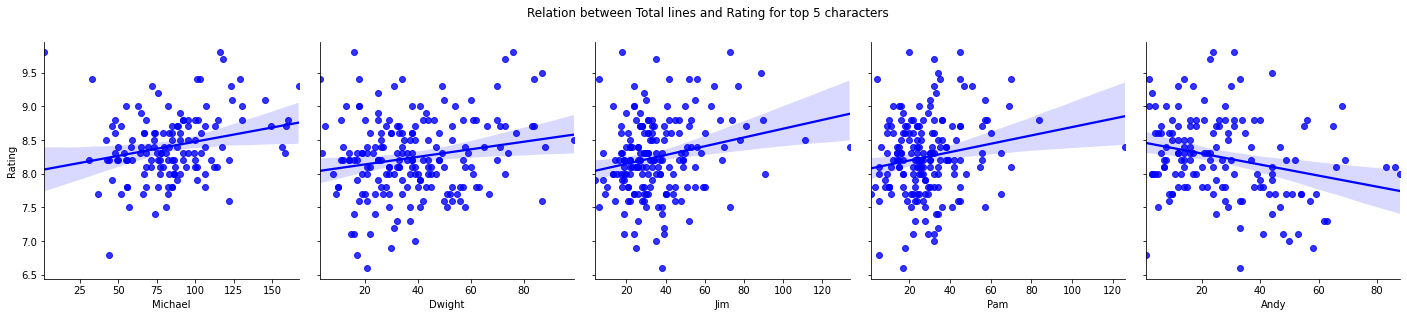

In [193]:
g = sns.PairGrid(df_charpair_lines, y_vars=["Rating"],x_vars=["Michael","Dwight","Jim","Pam","Andy"],height=4)
g.map(sns.regplot,color="blue")
plt.suptitle('Relation between Total lines and Rating for top 5 characters',y=1.08)

• Assumption is that if the character has more lines in an episode they are seen majorly through the episode. 
<br>• Upward trend seen for everyone except Andy-ratings tend to drop when Andy has more lines while Dwight's slope is steeper suggesting lesser jump in ratings compared to other 3, meaning even if Dwight has more lines the ratings are still on the lower side.
<br>• Jim and Pam have a similar graph while for Michael lowly rated episodes cannot be seen as most of those are from seasons 8 and 9 after he left.

##### Testing some frequently seen character pairs 

In [194]:
#taking only common episodes where both characters have lines
df_charpair_lines['M_D']=df_charpair_lines[['Dwight','Michael']].dropna(how='any').sum(axis=1)
df_charpair_lines['J_D']=df_charpair_lines[['Dwight','Jim']].dropna(how='any').sum(axis=1)
df_charpair_lines['P_J']=df_charpair_lines[['Pam','Jim']].dropna(how='any').sum(axis=1)
df_charpair_lines['M_J']=df_charpair_lines[['Jim','Michael']].dropna(how='any').sum(axis=1)
df_charpair_lines['A_D']=df_charpair_lines[['Dwight','Andy']].dropna(how='any').sum(axis=1)

In [195]:
df_charpair_lines['M_D'].isna().value_counts()
#False tells us how many episodes do both characters have atleast 1 line in

False    137
True      49
Name: M_D, dtype: int64

In [196]:
df_charpair_lines['J_D'].isna().value_counts()#Jim and Dwight both have a line in 185 episodes

False    185
True       1
Name: J_D, dtype: int64

In [197]:
df_charpair_lines['P_J'].isna().value_counts() #Pam and Jim both have a line in 181 episodes

False    181
True       5
Name: P_J, dtype: int64

In [198]:
df_charpair_lines['M_J'].isna().value_counts() #Michael and Jim both have a line in 136 episodes

False    136
True      50
Name: M_J, dtype: int64

In [199]:
df_charpair_lines['A_D'].isna().value_counts() #Andy and Dwight both have a line in 144 episodes

False    144
True      42
Name: A_D, dtype: int64

In [200]:
df_charpair_lines.rename(columns={'M_D': 'Michael-Dwight(137 episodes)', 'J_D': 'Jim-Dwight(185 episodes)', 
                              'P_J':'Pam-Jim(181 episodes)','M_J':'Michael-Jim(136 episodes)',
                              'A_D':'Andy-Dwight(144 episodes)'},inplace=True)

Text(0.5, 1.08, 'Relation between Total lines and Rating for top 5 frequently seen characters pairs')

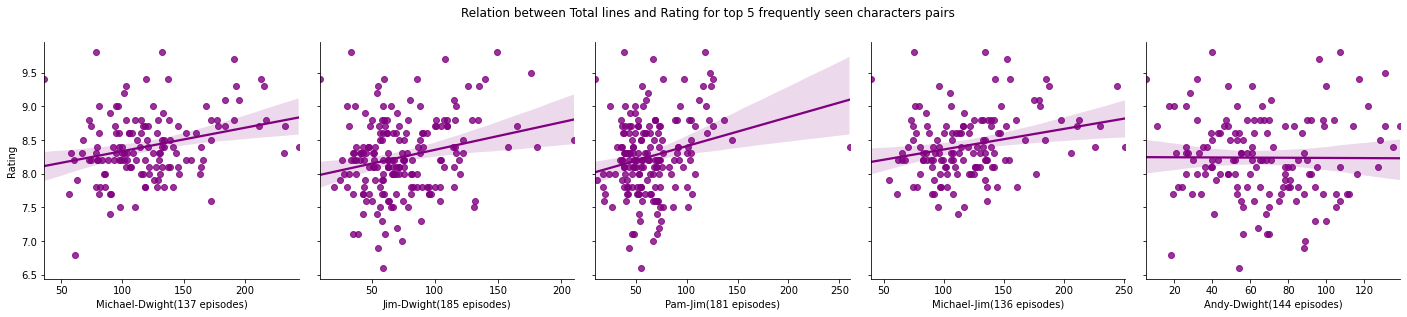

In [201]:
g = sns.PairGrid(df_charpair_lines, y_vars=["Rating"],x_vars=[ 'Michael-Dwight(137 episodes)', 'Jim-Dwight(185 episodes)', 
                              'Pam-Jim(181 episodes)','Michael-Jim(136 episodes)','Andy-Dwight(144 episodes)'],height=4)
g.map(sns.regplot,color="purple")
plt.suptitle('Relation between Total lines and Rating for top 5 frequently seen characters pairs',y=1.08)

Considered only common episodes where both the characters have atleast one line. Assumption is that if both the characters have more lines in an episode they are seen majorly through the episode and interact either with each other or with other characters. Again upward trend seen for all pairs except Andy-Dwight who have a slightly downward trend, considering they both have more lines towards the last two seasons when ratings dipped. Also to note Jim-Dwight have each spoken atleast one line in 185 episodes followed by Pam-Jim(181) and Michael-Dwight(137).

<br>• For the frequently seen character pairs number of common episodes where both the characters have atleast one line-
Jim-Dwight(185), Pam-Jim(181), Michael-Dwight(137) and Michael-Jim(136 episodes).

### Ques 4 - Is there a relation between number of scenes that particular characters appear in  and Rating?

In [290]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()

figure=df_scene_total_trans.iplot(title='Season-wise scenes distribution for characters appearing in atleast 10% episodes',
                                 xTitle='Season',yTitle='Number of scenes')

• We know Top 5 characters with maximum scenes include Michael,Dwight,Jim,Pam and Andy.Michael appears in the highest number of scenes in every season until season 7 after which he left the show.
<br>• Jim and Dwight tie in season 6 despite Jim having more lines while in season 7 Jim appears in more scenes than Dwight despite Dwight having more lines. 
<br>• All the supporting characters seem to follow a somewhat similar limited pattern over 9 seasons.

In [202]:
df_charpair_scenes = dff1[dff1['speaker'].isin(['Andy','Michael','Jim','Pam','Dwight'])]
df_charpair_scenes=df_charpair_scenes.pivot_table(index='speaker', columns=['season','episode'], values='scene',aggfunc='count')
df_charpair_scenes

season      1                                   2                    ...  \
episode    1     2     3     4     5     6     1     2     3     4   ...   
speaker                                                              ...   
Andy      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Dwight   10.0   6.0  16.0  24.0   9.0   7.0  13.0   5.0  20.0  20.0  ...   
Jim      11.0  11.0  11.0  21.0  13.0   9.0  16.0   8.0  22.0  14.0  ...   
Michael  20.0  25.0  19.0  19.0  31.0  21.0  36.0  26.0  22.0  26.0  ...   
Pam      14.0   7.0  10.0  10.0   6.0  11.0  22.0  13.0  12.0   9.0  ...   

season      9                                                        
episode    14    15    16    17    18    19    20    21    22    23  
speaker                                                              
Andy      NaN  11.0  19.0   3.0   6.0  12.0  12.0  20.0   9.0  15.0  
Dwight   11.0   9.0   8.0  18.0   8.0  19.0  10.0  13.0  30.0  27.0  
Jim       7.0   7.0   4.0   3.0   4.0   5.0   7.0  16.0  23.0  33.0  
Michael   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Pam      15.0   6.0  14.0   7.0  11.0   5.0  10.0   6.0  11.0  21.0  

[5 rows x 186 columns]

In [203]:
df_charpair_scenes=df_charpair_scenes.transpose()
df_charpair_scenes=df_charpair_scenes.reset_index()

In [204]:
del df_charpair_scenes['season']
del df_charpair_scenes['episode']

In [205]:
df_charpair_scenes=pd.concat([df_charpair_scenes,df_imdb['Rating']],axis=1)
df_charpair_scenes

Andy  Dwight   Jim  Michael   Pam  Rating
0     NaN    10.0  11.0     20.0  14.0     7.5
1     NaN     6.0  11.0     25.0   7.0     8.3
2     NaN    16.0  11.0     19.0  10.0     7.8
3     NaN    24.0  21.0     19.0  10.0     8.1
4     NaN     9.0  13.0     31.0   6.0     8.4
..    ...     ...   ...      ...   ...     ...
181  12.0    19.0   5.0      NaN   5.0     8.0
182  12.0    10.0   7.0      NaN  10.0     8.0
183  20.0    13.0  16.0      NaN   6.0     9.0
184   9.0    30.0  23.0      NaN  11.0     9.5
185  15.0    27.0  33.0      2.0  21.0     9.8

[186 rows x 6 columns]

Text(0.5, 1.08, 'Relation between Total scenes and Rating for top 5 characters')

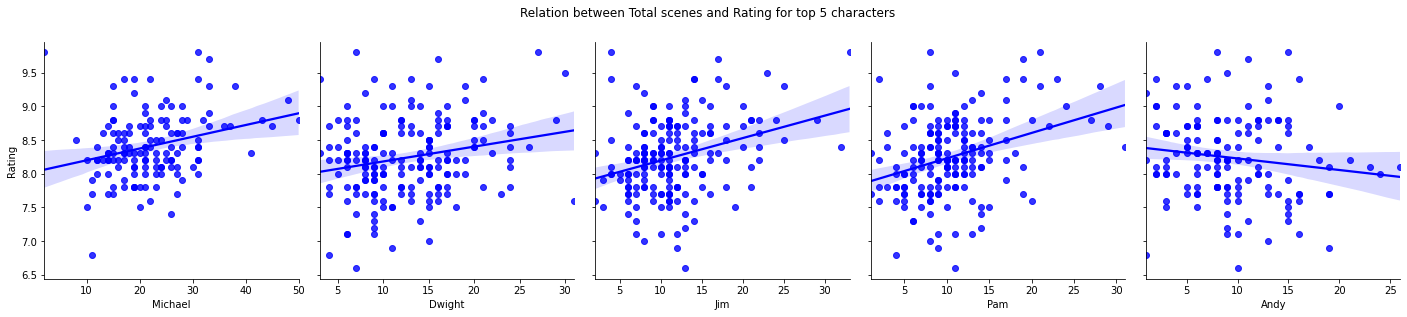

In [206]:
g = sns.PairGrid(df_charpair_scenes, y_vars=["Rating"],x_vars=["Michael","Dwight","Jim","Pam","Andy"],height=4)
g.map(sns.regplot,color="blue")
plt.suptitle('Relation between Total scenes and Rating for top 5 characters',y=1.08)

Assumption is that if the character appears in more scenes in an episode they are seen majorly through the episode. Similar to total lines graphs. Upward trend seen for everyone except Andy-ratings tend to drop when Andy appears in more scenes while Dwight's line is steeper suggesting lesser jump in ratings compared to other 3, meaning even if Dwight appears in more scenes the ratings are still on the lower side. Jim and Pam have a similar graph while for Michael lowly rated episodes cannot be seen as most of those are from seasons 8 and 9 after he left.

• Assumption is that if the character appears in more scenes in an episode they are seen majorly through the episode. The trends are similar to previously seen total lines graphs.

##### Testing some frequently seen character pairs 

In [207]:
df_charpair_scenes['Michael-Dwight(137 episodes)']=df_charpair_scenes[['Dwight','Michael']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Jim-Dwight(185 episodes)']=df_charpair_scenes[['Dwight','Jim']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Pam-Jim(181 episodes)']=df_charpair_scenes[['Pam','Jim']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Michael-Jim(136 episodes)']=df_charpair_scenes[['Michael','Jim']].dropna(how='any').sum(axis=1)
df_charpair_scenes['Andy-Dwight(144 episodes)']=df_charpair_scenes[['Dwight','Andy']].dropna(how='any').sum(axis=1)

Text(0.5, 1.08, 'Relation between Total scenes and Rating for top 5 frequently seen characters pairs')

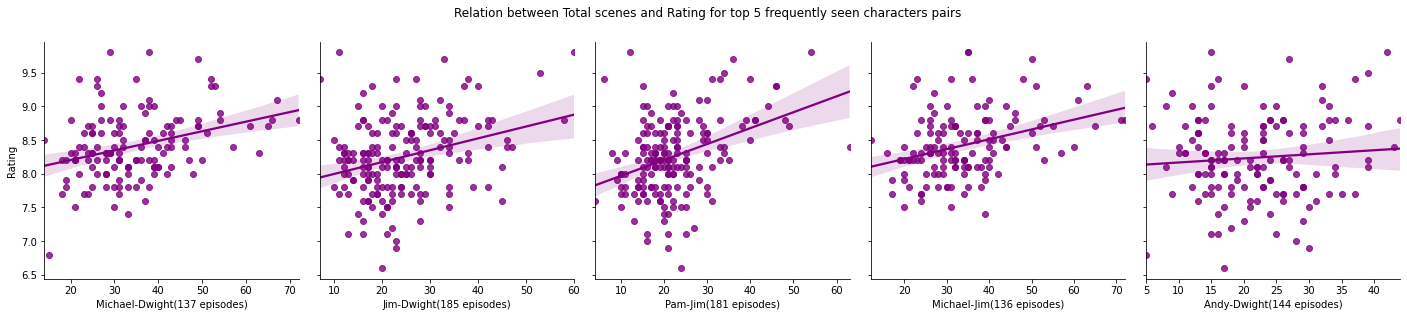

In [208]:
g = sns.PairGrid(df_charpair_scenes, y_vars=["Rating"],x_vars=[ 'Michael-Dwight(137 episodes)', 'Jim-Dwight(185 episodes)', 
                              'Pam-Jim(181 episodes)','Michael-Jim(136 episodes)','Andy-Dwight(144 episodes)'],height=4)
g.map(sns.regplot,color="purple")
plt.suptitle('Relation between Total scenes and Rating for top 5 frequently seen characters pairs',y=1.08)

Upward trend seen for all pairs while Andy-Dwight only have a slightly upward slope.

### Ques 5 - Is there a relation between particular directors/writers and Rating?

In [126]:
import plotly.express as px
fig = px.box(df_dir,x='DirectedBy', y='Rating', points="all",title="Relation between Directors(who directed atleast 6 episodes) and Rating",
             hover_data=["Season","Title"])
fig.show()

• Greg Daniels has the highest median rating while Ken Kwapis and Paul Feig have all episode ratings above 8(except 1 which is Pilot episode) along with second highest median rating.
<br>• While Matt Sohn's episodes comparatively have lower ratings, for David Rogers who has the lowest median rating it was just one episode that was rated high.

In [292]:
import plotly.express as px
fig = px.box(df_wri,x='WrittenBy', y='Rating', points="all",title="Relation between Writers(who wrote atleast 6 episodes) and Rating",
             hover_data=["Season","Title"])

fig.show()

• Greg Daniels has the highest median rating of 8.7,followed by Paul Lieberstein who has the median rating of 8.5. 
<br>• Michael Schur and Justin Spitzer have all episodes rated above 8(except one from season 8) while Mindy Kaling and B.J.Novak have a similar ratings distribution. Aaron Shure has the lowest median rating of 7.9

#### Ques 5.1 - Is there a relation between the number of co-writers and Rating?

<br>• Nothing conclusive can be said since the number of episodes written by more than one writer is only 33/186 making the data too skewed for conclusive observations.

#### Ques 5.2 - Do any particular director-writer combination fare better ratings?

<br>• Director-Writer pairs who have worked together in more than one episode seem to rake in slightly better ratings than those pairs who have worked together in only one episode.

<br>• For (Jeffrey Blitz, Paul Lieberstein)-2/2 episodes,(Ken Kwapis, Greg Daniels)-2/3 episodes and (Paul Feig, Gene Stupnitsky | Lee Eisenberg)-3/4 episodes that they worked together on have ratings > 75th percentile of ratings(>8.6).
While for (Matt Sohn, Allison Silverman)-2/2 episodes that they worked together on have ratings < 25th percentile of ratings(<7.8).

In [293]:
fig=go.Figure()


fig.add_trace(go.Bar(x=seasons, y=dp1,name='Worked together in atleast 2 episodes',
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",   
                            text=dpp1,textposition='auto',
))
fig.add_trace(go.Bar(x=seasons, y=dp2,name='Worked together in only 1 episode',
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=dpp2,textposition='auto',
))
fig.update_layout(barmode='stack',title="Season-wise number of director-writer pairs distribution")
fig.update_xaxes(title="Season",tickvals=[1,2,3,4,5,6,7,8,9])
fig.update_yaxes(title="Number of director-writer pairs")
fig.show()

• Percentage shown is with respect to total number of episodes per season. Season 6 and 8 experimented with the most number of new director-writer pairs(who worked together in just one episode) hence accounting for almost 80% of the episodes in both seasons.

#### Ques 5.3 - Do actors make good directors/writers considering they know the show from a different perspective?

<br>• Although the number of episodes(19) involved are too less to form any conclusive observations,in Season 6 and 8, 5/7 actors directed an episode possibly to revive the low ratings. 

<br>• Half of the episodes belong to seasons 8 and 9 and most episodes are below median rating of 8.2. All three episodes directed by John Krasinski are lowly rated. 

<br>• Some iconic episodes like "Scott's Tots", "Michael's last dundies" and "Garage sale" feature in the list. Two iconic episodes "Casino Night" and "Survivor Man" were written by Steve Carell.

### Ques 6 - Do the Top 10 best episodes(based on rating and votes) have any peculiar features associated with them?

In [209]:
df_ep.sort_values(by=['Rating','Num_Votes'],ascending=False).head(10)

season  episode                  Title    AirDate  Rating  Num_Votes  \
185       9       23                 Finale 2013-05-16     9.8       9269   
135       7       21       Goodbye, Michael 2011-04-28     9.8       6909   
77        5       13          Stress Relief 2009-02-01     9.7       7058   
184       9       22               A.A.R.M. 2013-05-09     9.5       3401   
59        4        9           Dinner Party 2008-04-10     9.4       4824   
130       7       16  Threat Level Midnight 2011-02-17     9.4       4236   
27        2       22           Casino Night 2006-05-11     9.4       4195   
94        6        4    Niagara: Part 1 & 2 2009-10-08     9.4       4055   
50        3       23                The Job 2007-05-17     9.3       3461   
64        4       14          Goodbye, Toby 2008-05-15     9.3       3453   

        DirectedBy                            WrittenBy  year  month  day  \
185     Ken Kwapis                         Greg Daniels  2013      5    3   
135      Paul Feig                         Greg Daniels  2011      4    3   
77   Jeffrey Blitz                     Paul Lieberstein  2009      2    6   
184   David Rogers                      Brent Forrester  2013      5    3   
59       Paul Feig      Gene Stupnitsky | Lee Eisenberg  2008      4    3   
130   Tucker Gates                          B. J. Novak  2011      2    3   
27      Ken Kwapis                         Steve Carell  2006      5    3   
94       Paul Feig          Greg Daniels | Mindy Kaling  2009     10    3   
50      Ken Kwapis     Paul Lieberstein | Michael Schur  2007      5    3   
64       Paul Feig  Jennifer Celotta | Paul Lieberstein  2008      5    3   

     Difference in days between air dates(season-wise)  \
185                                              238.0   
135                                              217.0   
77                                               129.0   
184                                              231.0   
59                                               196.0   
130                                              147.0   
27                                               233.0   
94                                                21.0   
50                                               238.0   
64                                               231.0   

                                             Combined  episode_no  \
185                        (Ken Kwapis, Greg Daniels)         186   
135                         (Paul Feig, Greg Daniels)         136   
77                  (Jeffrey Blitz, Paul Lieberstein)          78   
184                   (David Rogers, Brent Forrester)         185   
59       (Paul Feig, Gene Stupnitsky | Lee Eisenberg)          60   
130                       (Tucker Gates, B. J. Novak)         131   
27                         (Ken Kwapis, Steve Carell)          28   
94           (Paul Feig, Greg Daniels | Mindy Kaling)          95   
50     (Ken Kwapis, Paul Lieberstein | Michael Schur)          51   
64   (Paul Feig, Jennifer Celotta | Paul Lieberstein)          65   

     Total_lines  Total_scenes  
185          522           116  
135          329            53  
77           416            70  
184          501            70  
59           331            31  
130           72            26  
27           385            57  
94           552            78  
50           544            88  
64           617           103

Peculiar features - 
<br>1) Episodes belong to all seasons except season 1(new show and style of humour hence people take time to get accustomed) and season 8(complete focus on Andy's story arc and Michael's absence not the greatest season). 
<br>2) Ken Kwapis and Paul Feig each directed 3 and 4 episodes in this list respectively - they both have directed the second and third highest number of episodes of the show with all rated above 8. 
<br>3) 3 episodes were written/co-written by Greg Daniels while 3 episodes were written/co-written by Paul Lieberstein - both of them are regular writers of the show having the top two highest median ratings. 
<br>4) Episode 'Casino Night' written by Steve Carell features in the top 10. 
<br>5) The director-writer pairs of top 5 episodes in this list have worked together in atleast 1 other episode throughout the show.
<br>6) Two episodes from season 4,7 and 9 each feature in the top 10.
<br>7) 6 episodes in this list are either either season finale episodes or belong to last few episodes of the season.
<br>8) 9/10 episodes (except "Threat-level Midnight" episode which has an inconsitency in recording of lines and scenes in the dataset because it featured clips mainly) have total lines>75th percentile of lines(323) while 8/10 episodes have total scenes>75th percentile of scenes(52) confirming the trends seen earlier.

Peculiar features - 

<br>• Episodes belong to all seasons except season 1(new show and style of humour hence people take time to get accustomed) and season 8(complete focus on Andy's story arc and Michael's absence not the greatest season). 

<br>• Ken Kwapis and Paul Feig each directed 3 and 4 episodes in this list respectively - they both have directed the second and third highest number of episodes of the show with all rated above 8. 

<br>• 3 episodes were written/co-written by Greg Daniels while 3 episodes were written/co-written by Paul Lieberstein - both of them are regular writers of the show having the top two highest median ratings. 

<br>• The director-writer pairs of top 5 episodes in this list have worked together in atleast 1 other episode throughout the show.

<br>• 9/10 episodes (except "Threat-level Midnight" episode which has an inconsitency in recording of lines and scenes in the dataset because it featured clips mainly) have total lines>75th percentile of lines(323) while 8/10 episodes have total scenes>75th percentile of scenes(52) confirming the trends seen earlier.

In [210]:
highest_lines=df.groupby(['season','episode'])['speaker'].agg(lambda x: (x.value_counts().index[0:5],x.value_counts()[0:5])).tolist()

In [211]:
df_ep['Top5_max_lines']=highest_lines

In [212]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Swarnita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



##### Season wise top rated episodes:

In [213]:
df_ep.sort_values(['Rating','Num_Votes']).groupby(['season']).tail(1)

season  episode                Title    AirDate  Rating  Num_Votes  \
139  8       1        The List            2011-09-22  8.2     2102        
4    1       5        Basketball          2005-04-19  8.4     3745        
50   3       23       The Job             2007-05-17  9.3     3461        
94   6       4        Niagara: Part 1 & 2 2009-10-08  9.4     4055        
27   2       22       Casino Night        2006-05-11  9.4     4195        
59   4       9        Dinner Party        2008-04-10  9.4     4824        
77   5       13       Stress Relief       2009-02-01  9.7     7058        
135  7       21       Goodbye, Michael    2011-04-28  9.8     6909        
185  9       23       Finale              2013-05-16  9.8     9269        

        DirectedBy                         WrittenBy  year  month  day  \
139  B. J. Novak    B. J. Novak                       2011  9      3     
4    Greg Daniels   Greg Daniels                      2005  4      1     
50   Ken Kwapis     Paul Lieberstein | Michael Schur  2007  5      3     
94   Paul Feig      Greg Daniels | Mindy Kaling       2009  10     3     
27   Ken Kwapis     Steve Carell                      2006  5      3     
59   Paul Feig      Gene Stupnitsky | Lee Eisenberg   2008  4      3     
77   Jeffrey Blitz  Paul Lieberstein                  2009  2      6     
135  Paul Feig      Greg Daniels                      2011  4      3     
185  Ken Kwapis     Greg Daniels                      2013  5      3     

     Difference in days between air dates(season-wise)  \
139  0.0                                                 
4    26.0                                                
50   238.0                                               
94   21.0                                                
27   233.0                                               
59   196.0                                               
77   129.0                                               
135  217.0                                               
185  238.0                                               

                                           Combined  episode_no  Total_lines  \
139  (B. J. Novak, B. J. Novak)                      140         274           
4    (Greg Daniels, Greg Daniels)                    5           235           
50   (Ken Kwapis, Paul Lieberstein | Michael Schur)  51          544           
94   (Paul Feig, Greg Daniels | Mindy Kaling)        95          552           
27   (Ken Kwapis, Steve Carell)                      28          385           
59   (Paul Feig, Gene Stupnitsky | Lee Eisenberg)    60          331           
77   (Jeffrey Blitz, Paul Lieberstein)               78          416           
135  (Paul Feig, Greg Daniels)                       136         329           
185  (Ken Kwapis, Greg Daniels)                      186         522           

     Total_scenes  \
139  60             
4    40             
50   88             
94   78             
27   57             
59   31             
77   70             
135  53             
185  116            

                                                    Top5_max_lines  
139  ([Andy, Dwight, Jim, Robert, Pam], [52, 38, 38, 33, 25])       
4    ([Michael, Dwight, Jim, Darryl, Pam], [106, 26, 22, 15, 14])   
50   ([Michael, Dwight, Jim, Pam, David], [123, 70, 65, 51, 47])    
94   ([Michael, Dwight, Pam, Jim, Andy], [129, 84, 70, 56, 33])     
27   ([Michael, Jim, Pam, Jan, Dwight], [103, 52, 45, 40, 34])      
59   ([Michael, Jan, Jim, Pam, Dwight], [101, 90, 42, 35, 18])      
77   ([Michael, Dwight, Jim, Pam, Stanley], [118, 73, 35, 32, 28])  
135  ([Michael, DeAngelo, Andy, Pam, Jim], [116, 25, 24, 20, 18])   
185  ([Dwight, Jim, Pam, Kevin, Andy], [76, 73, 45, 31, 31])

Maximum lines tell us about the character plotlines around whom these episodes revolved. Michael is present with significantly higher lines at the top in all episodes except the seasons where he left.Focus on Pam-Jim relationship plotline can be seen in atleast 3 episodes(Casino Night,The Job,Niagara: Part 1 & 2)

### Ques 7 - Do the Top 10 worst episodes(based on rating and votes) have any peculiar features associated with them?

In [214]:
df_ep.sort_values(by=['Rating','Num_Votes'],ascending=[True,False]).head(10)

season  episode              Title    AirDate  Rating  Num_Votes  \
157  8       19       Get the Girl      2012-03-15  6.6     1944        
103  6       13       The Banker        2010-01-21  6.8     2665        
146  8       8        Gettysburg        2011-11-17  6.9     1850        
167  9       5        Here Comes Treble 2012-10-25  7.0     1780        
159  8       21       Angry Andy        2012-04-19  7.1     1857        
158  8       20       Welcome Party     2012-04-12  7.1     1739        
160  8       22       Fundraiser        2012-04-26  7.1     1694        
164  9       2        Roy's Wedding     2012-09-27  7.2     1730        
141  8       3        Lotto             2011-10-06  7.3     1858        
177  9       15       Couples Discount  2013-02-07  7.3     1655        

         DirectedBy          WrittenBy  year  month  day  \
157  Rainn Wilson    Charlie Grandy     2012  3      3     
103  Jeffrey Blitz   Jason Kessler      2010  1      3     
146  Jeffrey Blitz   Robert Padnick     2011  11     3     
167  Claire Scanlon  Owen Ellickson     2012  10     3     
159  Claire Scanlon  Justin Spitzer     2012  4      3     
158  Ed Helms        Steve Hely         2012  4      3     
160  David Rogers    Owen Ellickson     2012  4      3     
164  Matt Sohn       Allison Silverman  2012  9      3     
141  John Krasinski  Charlie Grandy     2011  10     3     
177  Troy Miller     Allison Silverman  2013  2      3     

     Difference in days between air dates(season-wise)  \
157  175.0                                               
103  126.0                                               
146  56.0                                                
167  35.0                                                
159  210.0                                               
158  203.0                                               
160  217.0                                               
164  7.0                                                 
141  14.0                                                
177  140.0                                               

                             Combined  episode_no  Total_lines  Total_scenes  \
157  (Rainn Wilson, Charlie Grandy)    158         261          41             
103  (Jeffrey Blitz, Jason Kessler)    104         131          21             
146  (Jeffrey Blitz, Robert Padnick)   147         282          45             
167  (Claire Scanlon, Owen Ellickson)  168         292          39             
159  (Claire Scanlon, Justin Spitzer)  160         292          51             
158  (Ed Helms, Steve Hely)            159         307          25             
160  (David Rogers, Owen Ellickson)    161         239          38             
164  (Matt Sohn, Allison Silverman)    165         296          47             
141  (John Krasinski, Charlie Grandy)  142         317          42             
177  (Troy Miller, Allison Silverman)  178         260          35             

                                                       Top5_max_lines  
157  ([Nellie, Jim, Andy, Erin, Robert], [42, 38, 33, 32, 24])         
103  ([Michael, Eric, Toby, Dwight, Computron], [44, 26, 18, 17, 10])  
146  ([Andy, Dwight, Jim, Robert, Oscar], [58, 30, 25, 24, 20])        
167  ([Andy, Dwight, Jim, Pam, Erin], [50, 39, 35, 32, 24])            
159  ([Andy, Nellie, Ryan, Pam, Erin], [53, 36, 30, 29, 24])           
158  ([Andy, Jim, Pam, Erin, Nellie], [48, 39, 32, 25, 22])            
160  ([Andy, Jim, Pam, Kevin, Nellie], [41, 24, 22, 18, 17])           
164  ([Jim, Pam, Andy, Dwight, Erin], [39, 34, 33, 31, 31])            
141  ([Andy, Jim, Darryl, Dwight, Pam], [63, 52, 49, 37, 23])          
177  ([Andy, Dwight, Pam, Jim, Erin], [62, 32, 28, 26, 26])

Peculiar features - 

<br>• All episodes belong to seasons 8 and 9(after Michael leaves the show!) 

<br>• Jeffrey Blitz and Claire Scanlon directed 2 episodes each-Jeffery Blitz's all other episodes have high ratings except the two that feature in this list while Claire Scanlon has directed only these two episodes. 

<br>• Charlie Grandy, Owen Ellickson and Allison Silverman wrote 2 episodes each. 

<br>• Episodes directed by the shows's actors Rainn Wilson,Ed Helms and John Krasinski feature in the list. 

<br>• While for (Matt Sohn, Allison Silverman)-2/2 episodes that they worked together on have ratings < 25th percentile of ratings(<7.8),none of the other director-writer pairs have worked together in another episode.

<br>• None of the episodes have total lines>75th percentile of lines(323) or total scenes>75th percentile of scenes(52) confirming the trends seen earlier.

##### Season wise worst rated episodes:

In [215]:
df_ep.sort_values(['Rating','Num_Votes']).groupby(['season']).head(1)

season  episode              Title    AirDate  Rating  Num_Votes  \
157  8       19       Get the Girl      2012-03-15  6.6     1944        
103  6       13       The Banker        2010-01-21  6.8     2665        
167  9       5        Here Comes Treble 2012-10-25  7.0     1780        
121  7       7        Christening       2010-11-04  7.4     1966        
0    1       1        Pilot             2005-03-24  7.5     4349        
63   4       13       Job Fair          2008-05-08  7.8     2305        
19   2       14       The Carpet        2006-01-26  7.9     2745        
80   5       16       Blood Drive       2009-03-05  8.0     2164        
31   3       4        Grief Counseling  2006-10-12  8.0     2686        

            DirectedBy                                        WrittenBy  year  \
157  Rainn Wilson       Charlie Grandy                                   2012   
103  Jeffrey Blitz      Jason Kessler                                    2010   
167  Claire Scanlon     Owen Ellickson                                   2012   
121  Alex Hardcastle    Peter Ocko                                       2010   
0    Ken Kwapis         Ricky Gervais | Stephen Merchant | Greg Daniels  2005   
63   Tucker Gates       Gene Stupnitsky | Lee Eisenberg                  2008   
19   Victor Nelli, Jr.  Paul Lieberstein                                 2006   
80   Randall Einhorn    Brent Forrester                                  2009   
31   Roger Nygard       Jennifer Celotta                                 2006   

     month  day  Difference in days between air dates(season-wise)  \
157  3      3    175.0                                               
103  1      3    126.0                                               
167  10     3    35.0                                                
121  11     3    42.0                                                
0    3      3    0.0                                                 
63   5      3    224.0                                               
19   1      3    128.0                                               
80   3      3    161.0                                               
31   10     3    21.0                                                

                                                          Combined  \
157  (Rainn Wilson, Charlie Grandy)                                  
103  (Jeffrey Blitz, Jason Kessler)                                  
167  (Claire Scanlon, Owen Ellickson)                                
121  (Alex Hardcastle, Peter Ocko)                                   
0    (Ken Kwapis, Ricky Gervais | Stephen Merchant | Greg Daniels)   
63   (Tucker Gates, Gene Stupnitsky | Lee Eisenberg)                 
19   (Victor Nelli, Jr., Paul Lieberstein)                           
80   (Randall Einhorn, Brent Forrester)                              
31   (Roger Nygard, Jennifer Celotta)                                

     episode_no  Total_lines  Total_scenes  \
157  158         261          41             
103  104         131          21             
167  168         292          39             
121  122         286          48             
0    1           229          39             
63   64          252          52             
19   20          276          60             
80   81          300          39             
31   32          313          55             

                                                       Top5_max_lines  
157  ([Nellie, Jim, Andy, Erin, Robert], [42, 38, 33, 32, 24])         
103  ([Michael, Eric, Toby, Dwight, Computron], [44, 26, 18, 17, 10])  
167  ([Andy, Dwight, Jim, Pam, Erin], [50, 39, 35, 32, 24])            
121  ([Michael, Jim, Pam, Andy, Dwight], [74, 38, 33, 25, 16])         
0    ([Michael, Pam, Jim, Dwight, Jan], [81, 41, 36, 29, 12])          
63   ([Michael, Pam, Jim, Brad, Justin], [76, 34, 21, 18, 14])         
19   ([Michael, Jim, Pam, Dwight, Ryan], [101, 33, 28, 25, 13])        
80   ([Michael, Jim, Pam

Clearly not everyone's favourite episodes with scattered storylines and not much continuity. Andy, Nellie and Erin can be seen having top 5 lines apart from the usual main characters. 

### Ques 8 - Does a decrease in ratings and votes over time mean lesser people watched the show?

##### Relation between Season and Rating:

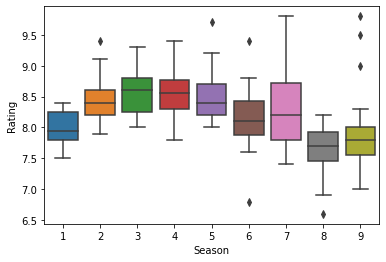

In [103]:
sns.boxplot(x=df_imdb['Season'], y=df_imdb['Rating']);

Season 3 has highest median rating, with the median line present towards upper half of the plot (positive skewness)indicating most episodes have higher ratings  above 8.6. Season 8 has the lowest median rating.
The highest rated episode of the show belongs to season 7 and 9 while lowest rated belongs to season 8.

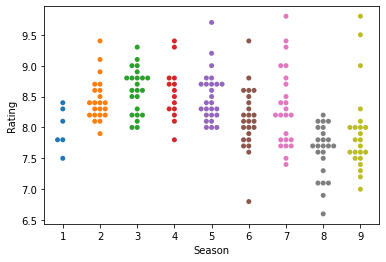

In [104]:
#for better representation of distribution of the ratings
sns.swarmplot(x=df_imdb['Season'], y=df_imdb['Rating']);

Seasons 2 to 5 ratings have been steady and good, above 8 for most time; season 6 and 7 half the episodes are highly rated while the other half dip below 8,also a general decline from the previously steady rated seasons begins to be seen; season 8 and 9 have consistently low ratings except for 3 episodes in season 9. Most of the low ratings below the median rating of 8.2 is seen concentrated from season 6 onwards.

• Season 3 has highest median rating, with the median line present towards upper half of the plot (positive skewness)indicating most episodes have higher ratings above 8.6. Season 8 has the lowest median rating. 
<br>• Seasons 2 to 5 ratings have been steady and good,from season 6 onwards a general decline begins to be seen; a slight revival in season 7 does not continue in season 8 and 9 which have consistently low ratings except for 3 episodes in season 9.

##### Relation between Season and Votes - How far have the number of votes decreased over seasons? 

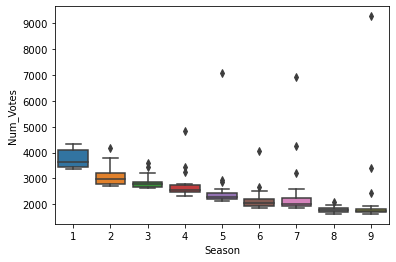

In [114]:
sns.boxplot(x=df_imdb['Season'], y=df_imdb['Num_Votes']);
#seeing a decrease in the number of votes from season 1 to 9

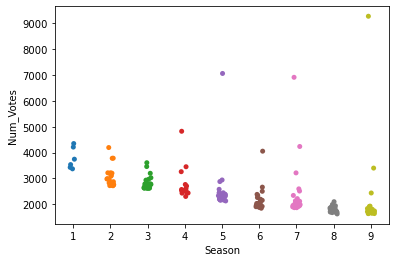

In [115]:
sns.stripplot(x=df_imdb['Season'], y=df_imdb['Num_Votes']);

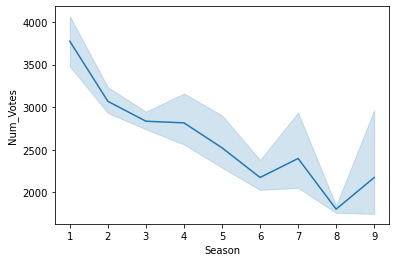

In [116]:
sns.lineplot(x=df_imdb['Season'], y=df_imdb['Num_Votes']);

• A decreasing trend in votes can be seen as we move towards later seasons, with a sharp dip from season 7 to 8.

##### Relation between Votes and Rating - How far do ratings increase as the number of votes received increases?

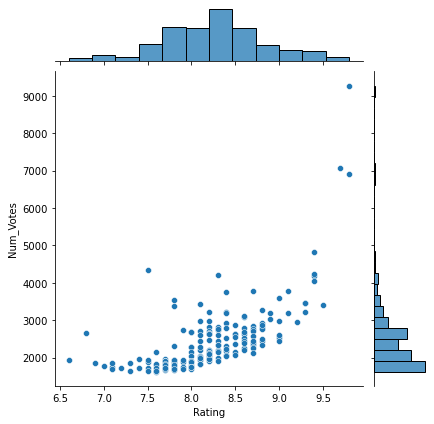

In [119]:
#Jointplot showing relationship between Rating and Votes and their individual distributions.
sns.jointplot(x=df_imdb['Rating'], y=df_imdb['Num_Votes']);

• Positive linear relation seen upto certain extent between ratings and votes. High density of votes are mostly seen around 2000 upto 3000 for ratings between 8-8.8.Votes go above 6000 only at 4 instances.

In [216]:
ggg=df_ep.groupby('season') #grouping season-wise to check ratings and votes
ggg1=ggg.get_group(1)
ggg2=ggg.get_group(2)
ggg3=ggg.get_group(3)
ggg4=ggg.get_group(4)
ggg5=ggg.get_group(5)
ggg6=ggg.get_group(6)
ggg7=ggg.get_group(7)
ggg8=ggg.get_group(8)
ggg9=ggg.get_group(9)

In [217]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

text1 = ['for Season 'f"<b>{str(k)}</b>,"'episode 'f"<b>{str(m)}</b>"'<br>titled 'f"<b>{str(v)}</b>"  for (k,m,v) in 
         zip(df_ep['season'].tolist(),df_ep['episode'].tolist(),df_ep['Title'].tolist())]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])


#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg1['episode_no'], y=ggg1['Rating'],
    mode='lines',
    name="Season 1",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(127, 60, 141)'),
),secondary_y=False,)


#Median Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg1['episode_no'], y=[ggg1['Rating'].median()]*len(ggg1['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(127, 60, 141)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg2['episode_no'], y=ggg2['Rating'],
    mode='lines',
    name="Season 2",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(17, 165, 121)'),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg2['episode_no'], y=[ggg2['Rating'].median()]*len(ggg2['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(17, 165, 121)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg3['episode_no'], y=ggg3['Rating'],
    mode='lines',
    name="Season 3",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color= 'rgb(57, 105, 172)'),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg3['episode_no'], y=[ggg3['Rating'].median()]*len(ggg3['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(57, 105, 172)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)


#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg4['episode_no'], y=ggg4['Rating'],
    mode='lines',
    name="Season 4",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(242, 183, 1)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg4['episode_no'], y=[ggg4['Rating'].median()]*len(ggg4['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(242, 183, 1)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg5['episode_no'], y=ggg5['Rating'],
    mode='lines',
    name="Season 5",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(231, 63, 116)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg5['episode_no'], y=[ggg5['Rating'].median()]*len(ggg5['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(231, 63, 116)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg6['episode_no'], y=ggg6['Rating'],
    mode='lines',
    name="Season 6",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(128, 186, 90)'),
),secondary_y=False,)


fig.add_trace(go.Scatter(
    x=ggg6['episode_no'], y=[ggg6['Rating'].median()]*len(ggg6['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(128, 186, 90)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg7['episode_no'], y=ggg7['Rating'],
    mode='lines',
    name="Season 7",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(230, 131, 16)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg7['episode_no'], y=[ggg7['Rating'].median()]*len(ggg7['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(230, 131, 16)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg8['episode_no'], y=ggg8['Rating'],
    mode='lines',
    name="Season 8",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(0, 134, 149)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg8['episode_no'], y=[ggg8['Rating'].median()]*len(ggg8['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(0, 134, 149)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)

#Rating-LineChart
fig.add_trace(go.Scatter(
    x=ggg9['episode_no'], y=ggg9['Rating'],
    mode='lines',
    name="Season 9",
    hovertemplate='Rating:%{y}<extra></extra>',
    line=dict(width=2, color='rgb(249, 123, 114)'),
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=ggg9['episode_no'], y=[ggg9['Rating'].median()]*len(ggg9['episode_no']),
    mode='lines',
    name="Season median",
    showlegend=False,
    line=dict(
        color='rgb(249, 123, 114)',
        width=2,
        dash="dot",
    ),
),secondary_y=False,)



#Number of Votes-Filled Area Chart
fig.add_trace(go.Scatter(
     x=ep_no, y=df_ep['Num_Votes'],fill='tozeroy', #fill down to x-axis
     text=text1,
     name="Votes",
     mode='lines',
     hovertemplate='Votes:%{y}<br>%{text}<extra></extra>',
     opacity=0.2,
     line=dict(width=1.8,color='violet'),
),secondary_y=True,)


#Adding logo
fig.add_layout_image(
    dict(
        source="https://images-na.ssl-images-amazon.com/images/I/41kl2e8bYiL._AC_SX355_.jpg",
        xref="paper", yref="paper",
        x=0.29, y=1.02,
        sizex=0.32, sizey=0.34,
        xanchor="right", yanchor="bottom"
    )
)


fig.update_layout(
      paper_bgcolor='white',
      plot_bgcolor='white',
      annotations=[
            dict(
                text='Note:The ratings for each episode are calculated using a weighted average system by IMDB based on votes casted by registered users(on a scale of 1 to 10).',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.5,
                y=-0.185,
                font=dict(
                family="Arial",
                size=10,
            ),
            ),
        ],

        hoverlabel=dict(font=dict(family='Courier New,monospace')),
        hovermode="x unified",
        width=1000,height=500,
        title_font_family="Courier New,monospace",
        font_family="Courier New,monospace",
        font_color="black",
        font_size=11.5,
        title_font_color='rgb(36, 73, 147)',
        title_font_size=16.5,
        margin=dict(
        l=80,
        r=80,
        b=60,
        t=110,),
    title={
        'text': "<b>Season-wise summary of IMDB Ratings and Votes for each episode</b><br><sub>Decline in ratings and stagnant votes after Michael leaves except last few episodes;major<br>peaks seen at same instances between ratings and votes indicating popularity of those episodes.</sub>",
        'y':0.925,
        'x':0.64,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)
fig.add_annotation(x=185, y=9.75,
            text="Finale episode<br>(Michael's cameo)",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(249, 123, 114)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-80,
        ay=-0.2,)

fig.add_annotation(x=135, y=9.75,
            text="Michael's last<br>episode",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(230, 131, 16)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-75,
        ay=-0.2,)

fig.add_annotation(x=103, y=6.85,
            text="Previous clips<br>compilation episode",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(128, 186, 90)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-90,
        ay=-0.2,)

fig.add_annotation(x=157, y=6.65,
            text="Nellie comes to<br>Scranton episode",
            showarrow=True,
            arrowhead=1,
            font=dict(
            family="Courier New, monospace",
            size=11,
            color='rgb(0, 134, 149)'
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor="#636363",
        ax=-80,
        ay=-0.2,)


# Set x-axis title
fig.update_xaxes(title_text="Episode")

# Set y-axes titles
fig.update_yaxes(title_text="Ratings", secondary_y=False)
fig.update_yaxes(title_text="Number of Votes", secondary_y=True)

fig.show(config={"displayModeBar": False, "showTips": False})

Ratings seem to pick up after season 1 (naturally because audience took time to get accustomed to the style of humour) but the votes begin to decrease. The decrease in votes does not necessarily suggest decline in viewership as highly rated peaks are in tow with highly voted peaks in places. This means those were the audience-favourite,most-loved and famous episodes of the show and hence attracted more viewers. Even though season 9 wasn’t as bad as season 8 probably because of the way season 8's story arc went many viewers would not have wanted to watch season 9 which explains why it isn’t voted high(saturated votes).

1) The season finale episodes end on a higher rating than the first episode of the season except for season 6 and 8 which particularly see a declining trend in the ratings towards the last few episodes. The show’s finales are scripted with partial closure to storylines which hypes the anticipation for the next season making them highly rated. The season 6 finale episode “Whistleblower” hinted Holly’s return but it was the lowest rated finale compared to all previous seasons (except season 1). While season 8 finale episode “Free Family Portrait Studio” showing Andy’s dramatic janitor-to-manager return to the office was a sad conclusion to an already disappointing season.
<br>2) Season 6 and 8 experimented with the most number of new director-writer pairs (who worked together in just one episode) accounting for almost 80% of the episodes in both seasons. This explains why the season 6 episodes seemed different from the previous seasons and were not so engaging. Besides season 6 was also the longest running season with Jim as co-manager and the Sabre storylines. 
<br>3) Whole of season 8 was focused on Andy’s character (him as Regional manager, his family, personal life) and the mediocre writing merely reduced him to a caricature trying to portray him as a replacement to Michael’s character. The season also saw diversion into the Florida storyline and the introduction of two eccentric characters - Robert California and Nellie Bertram which did not favour the ratings.

<br>• Ratings pick up after season 1 (naturally because audience took time to get accustomed to the style of humour) but the votes begin to decrease. The decrease in votes does not necessarily suggest decline in viewership as highly rated peaks are in tow with highly voted peaks for the audience favorite episodes hence explaining why it attracted more viewers. Even though season 9 wasn’t as bad as season 8 probably because of the way season 8's story arc progressed many viewers would not have wanted to watch it explaining why it isn’t voted high(saturated votes).

<br>• The season finale episodes end on a higher rating than the first episode of the season except for season 6 and 8 which particularly see a decline in the ratings suggesting weaker finale episodes.

<br>• Season 6 and 8 experimented with the most number of new director-writer pairs(who worked together in just one episode) accounting for almost 80% of the episodes in both seasons explaining why especially the season 6 episodes with Jim as co-manager and the Sabre storylines seemed not so engaging compared to the previous seasons. 

In [218]:
import plotly.express as px

print(px.colors.qualitative.Bold)

['rgb(127, 60, 141)', 'rgb(17, 165, 121)', 'rgb(57, 105, 172)', 'rgb(242, 183, 1)', 'rgb(231, 63, 116)', 'rgb(128, 186, 90)', 'rgb(230, 131, 16)', 'rgb(0, 134, 149)', 'rgb(207, 28, 144)', 'rgb(249, 123, 114)', 'rgb(165, 170, 153)']


### Ques 9 - Decoding season 8 and 9 : What went wrong in season 8 and a slightly better season 9? (apart from Michael's absence)

Looking for any peculiar features associated from the charts created above and some additional analysis:

1) Though season 8(7083) and season 9(7111) have similar total number of lines, season 9 had the highest number of speakers amongst all seasons(around 50 more speakers than season 8) considering it was the last season and brought back characters like Roy and Jan along with introduction of many new characters due to the scattered storylines(Clark,Pete,Dwight's family and friends,Jim's Philly office).

<br>2) From the season-wise distribution of lines and scenes (line charts) that we saw earlier we can conclude that:
   <br>2.1 - Erin, Darryl and Andy had their all time highest lines and scenes in season 8 while Kevin and Jim had their all time highest scenes.
   <br>2.2 - Angela and Oscar had their all time highest lines and scenes in season 9 while Pam and Kevin had their all time highest lines and Meredith had her all time highest scenes.
   
<br>3) Season 8 experimented with the most number of new director-writer pairs(who worked together in just one episode) accounting for almost 80% of the episodes in the season.
   
<br>4) Episodes with higher lines and scenes tend to have higher ratings but season 8 particularly does not have even one episode with high lines and scenes - all episodes concentrated within 400 lines and 60 scenes.

<br>5) Seasons 8 and 9 saw the lowest and saturated number of votes(apart from last few episodes) but season 9's ratings seem to see an increase towards the end.

##### Lines distribution: Who had the maximum lines?

In [221]:
df_8=df[df['season']==8] #isolating seasons 8 and 9 lines
df_9=df[df['season']==9]

<AxesSubplot:>

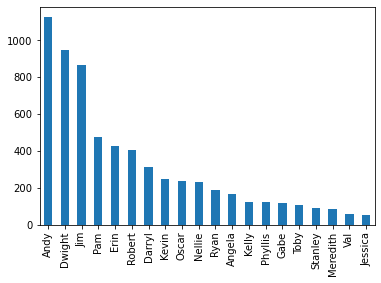

In [222]:
df_8['speaker'].value_counts().head(20).plot(kind='bar')

Andy's story arc was completely focused upon - besides him becoming the Regional Manager and his ways of managing the office,his family and personal life were also shown leading him to top the highest lines. A diversion into the Florida storyline and the introduction of two eccentric characters - Robert California and Nellie Bertram was seen. Darryl's story arc brought to focus while Dwight and Jim along with the other supporting characters continued to try saving the storyline. 

<AxesSubplot:>

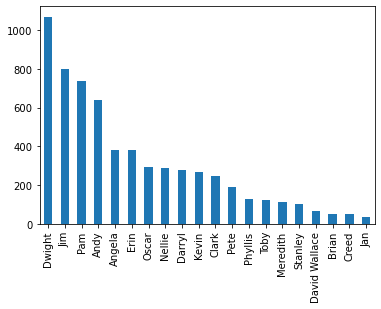

In [254]:
df_9['speaker'].value_counts().head(20).plot(kind='bar')

Focus shifted to Dwight's story arc(farm life,friends,manager position,relationship with Angela) and Jim's story arc(relationship stress with Pam,his own sports company in Philly). While the initial episodes did focus on Andy's character, since Ed Helms was away for some episodes shooting for The Hangover Part III movie the focus was shifted onto other characters which seems to have helped the show's ratings. Oscar and Angela also got their dues because of the Senator angle jumping onto the top 5th and 7th spots. Clark and Pete were introduced.

##### Scenes distribution: Who had the maximum scenes?

In [224]:
dfs_8=dff1[dff1['season']==8] #isolating seasons 8 and 9 scenes
dfs_9=dff1[dff1['season']==9]

<AxesSubplot:>

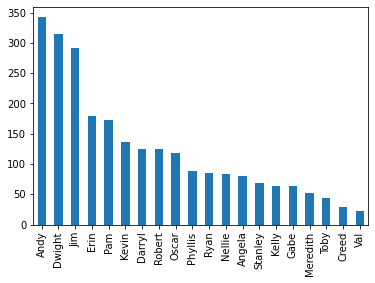

In [225]:
dfs_8['speaker'].value_counts().head(20).plot(kind='bar')

Robert California spoke more lines than Kevin who appeared in more scenes while Nellie spoke more lines than Ryan and Phyliss  who appeared in more scenes indicating emphasis placed on guest stars.

<AxesSubplot:>

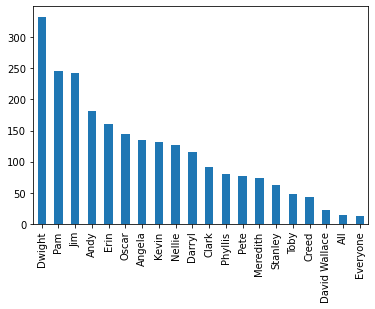

In [226]:
dfs_9['speaker'].value_counts().head(20).plot(kind='bar')

Though Pam appeared in more scenes, Jim had more lines. Similarly Angela appeared in lesser scenes than Erin and Oscar but spoke more lines than them explaining her all time highest lines in this season. Bringing back Nellie to show her character development in the background by humanising her and showing her friendhsip with Pam seemed forced.

##### Who directed episodes in seasons 8 and 9?

In [227]:
df_imdb_8=df_imdb[df_imdb['Season']==8]
df_imdb_9=df_imdb[df_imdb['Season']==9]

In [228]:
df_imdb['DirectedBy'].value_counts()

Randall Einhorn      15
Paul Feig            14
Greg Daniels         13
Ken Kwapis           13
Jeffrey Blitz        11
Ken Whittingham      9 
David Rogers         9 
Charles McDougall    8 
Matt Sohn            8 
Paul Lieberstein     7 
B. J. Novak          5 
Brent Forrester      4 
Tucker Gates         4 
Steve Carell         3 
John Krasinski       3 
Harold Ramis         3 
Troy Miller          3 
Rainn Wilson         3 
Jennifer Celotta     3 
Claire Scanlon       2 
Seth Gordon          2 
Dean Holland         2 
Jason Reitman        2 
Julian Farino        2 
Rodman Flender       2 
Bryan Gordon         2 
Joss Whedon          2 
Ed Helms             2 
Victor Nelli, Jr.    2 
Mindy Kaling         2 
Dennie Gordon        2 
Miguel Arteta        1 
Kelly Cantley        1 
Eric Appel           1 
John Stuart Scott    1 
Lee Eisenberg        1 
Gene Stupnitsky      1 
Reggie Hudlin        1 
Charlie Grandy       1 
Asaad Kelada         1 
Stephen Merchant     1 
Danny Leiner    

In [229]:
df_imdb_8['DirectedBy'].value_counts()

Matt Sohn            3
David Rogers         3
B. J. Novak          3
Charles McDougall    2
Ed Helms             2
Charlie Grandy       1
Jeffrey Blitz        1
Brent Forrester      1
Troy Miller          1
Daniel Chun          1
Claire Scanlon       1
Eric Appel           1
Randall Einhorn      1
John Krasinski       1
Brian Baumgartner    1
Rainn Wilson         1
Name: DirectedBy, dtype: int64

In [230]:
df_imdb_9['DirectedBy'].value_counts()

David Rogers         3
Matt Sohn            3
Rodman Flender       2
Jesse Peretz         1
John Krasinski       1
Ken Kwapis           1
Kelly Cantley        1
Bryan Cranston       1
Jennifer Celotta     1
Claire Scanlon       1
Brent Forrester      1
Troy Miller          1
Paul Lieberstein     1
Charles McDougall    1
Jeffrey Blitz        1
Jon Favreau          1
Lee Kirk             1
Greg Daniels         1
Name: DirectedBy, dtype: int64

In [231]:
l1=df_imdb['DirectedBy'].value_counts().index[:10]
l1 #regular directors

Index(['Randall Einhorn', 'Paul Feig', 'Greg Daniels', 'Ken Kwapis',
       'Jeffrey Blitz', 'Ken Whittingham', 'David Rogers', 'Charles McDougall',
       'Matt Sohn', 'Paul Lieberstein'],
      dtype='object')

In [232]:
l2=df_imdb['DirectedBy'].value_counts().index[10:]
l2 #not regular directors

Index(['B. J. Novak', 'Brent Forrester', 'Tucker Gates', 'Steve Carell',
       'John Krasinski', 'Harold Ramis', 'Troy Miller', 'Rainn Wilson',
       'Jennifer Celotta', 'Claire Scanlon', 'Seth Gordon', 'Dean Holland',
       'Jason Reitman', 'Julian Farino', 'Rodman Flender', 'Bryan Gordon',
       'Joss Whedon', 'Ed Helms', 'Victor Nelli, Jr.', 'Mindy Kaling',
       'Dennie Gordon', 'Miguel Arteta', 'Kelly Cantley', 'Eric Appel',
       'John Stuart Scott', 'Lee Eisenberg', 'Gene Stupnitsky',
       'Reggie Hudlin', 'Charlie Grandy', 'Asaad Kelada', 'Stephen Merchant',
       'Danny Leiner', 'J. J. Abrams', 'Marc Webb', 'Jon Favreau',
       'Amy Heckerling', 'Jesse Peretz', 'Brian Baumgartner',
       'Michael Spiller', 'Bryan Cranston', 'Lee Kirk', 'Craig Zisk',
       'Roger Nygard', 'Daniel Chun', 'Alex Hardcastle'],
      dtype='object')

In [233]:
df_rdir=df_imdb[df_imdb['DirectedBy'].isin(l1)]
df_nrdir=df_imdb[df_imdb['DirectedBy'].isin(l2)]

In [234]:
rd=df_rdir.groupby('Season')['DirectedBy'].count().tolist()
nrd=df_nrdir.groupby('Season')['DirectedBy'].count().tolist()

In [235]:
rdp=(df_rdir.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
rdp=np.around(rdp,1)
rdp

array([66.7, 77.3, 56.5, 64.3, 69.2, 50. , 54.2, 41.7, 47.8])

In [236]:
nrdp=(df_nrdir.groupby('Season')['DirectedBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
nrdp=np.around(nrdp,1)
nrdp

array([33.3, 22.7, 43.5, 35.7, 30.8, 50. , 45.8, 58.3, 52.2])

In [295]:
fig=go.Figure()
fig.add_trace(go.Bar(x=seasons, y=nrd,name='Not regular directors',#not regular directors
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=nrdp,textposition='auto'
))
fig.add_trace(go.Bar(x=seasons, y=rd, name='Regular directors',#regular directors
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=rdp,textposition='auto'
))

fig.update_layout(barmode='stack',title="Season-wise number of regular/not regular directors distribution")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of directors")
fig.show()

• Considering "Regular director" as a director who has directed atleast 6 episodes(length of season 1) and "Not regular director" as a director who has directed less than 6 episodes throughout the show hence using this graph to draw conclusions for initial seasons might not be correct and sensible but can be used for analysing later seasons(especially season 8 and 9). 
<br>• Season 8 and 9 saw highest(>50%) percent of episodes being directed by not regular directors compared to other seasons.

##### Who wrote episodes in seasons 8 and 9?

In [238]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                       20
B. J. Novak                                        15
Gene Stupnitsky | Lee Eisenberg                    13
Paul Lieberstein                                   13
Greg Daniels                                       9 
Brent Forrester                                    9 
Justin Spitzer                                     9 
Jennifer Celotta                                   8 
Charlie Grandy                                     7 
Michael Schur                                      7 
Halsted Sullivan | Warren Lieberstein              7 
Daniel Chun                                        6 
Aaron Shure                                        6 
Robert Padnick                                     4 
Owen Ellickson                                     4 
Carrie Kemper                                      4 
Steve Hely                                         3 
Allison Silverman                                  3 
Jennifer Celotta | Paul Lieb

In [239]:
df_imdb_8['WrittenBy'].value_counts()

Charlie Grandy                           2
B. J. Novak                              2
Owen Ellickson                           2
Halsted Sullivan | Warren Lieberstein    2
Mindy Kaling                             2
Steve Hely                               2
Robert Padnick                           2
Daniel Chun                              2
Justin Spitzer                           2
Amelie Gillette                          1
Carrie Kemper                            1
Allison Silverman                        1
Paul Lieberstein                         1
Dan Greaney                              1
Aaron Shure                              1
Name: WrittenBy, dtype: int64

In [240]:
df_imdb_9['WrittenBy'].value_counts()

Brent Forrester                          2
Niki Schwartz-Wright                     2
Allison Silverman                        2
Owen Ellickson                           2
Dan Sterling                             2
Graham Wagner                            2
Jonathan Green | Gabe Miller             2
Carrie Kemper                            2
Greg Daniels                             2
Paul Lieberstein                         1
Tim McAuliffe                            1
Halsted Sullivan | Warren Lieberstein    1
Robert Padnick                           1
Dan Greaney                              1
Name: WrittenBy, dtype: int64

In [241]:
l11=df_imdb['WrittenBy'].value_counts().index[:13]
l11 #regular writers

Index(['Mindy Kaling', 'B. J. Novak', 'Gene Stupnitsky | Lee Eisenberg',
       'Paul Lieberstein', 'Greg Daniels', 'Brent Forrester', 'Justin Spitzer',
       'Jennifer Celotta', 'Charlie Grandy', 'Michael Schur',
       'Halsted Sullivan | Warren Lieberstein', 'Daniel Chun', 'Aaron Shure'],
      dtype='object')

In [242]:
l22=df_imdb['WrittenBy'].value_counts().index[13:]
l22

Index(['Robert Padnick', 'Owen Ellickson', 'Carrie Kemper', 'Steve Hely',
       'Allison Silverman', 'Jennifer Celotta | Paul Lieberstein', 'Ryan Koh',
       'Dan Greaney', 'Lee Eisenberg | Gene Stupnitsky | Michael Schur',
       'Niki Schwartz-Wright', 'Jon Vitti', 'Steve Carell',
       'Brent Forrester | Justin Spitzer', 'Jonathan Green | Gabe Miller',
       'Amelie Gillette', 'Dan Sterling', 'Lester Lewis', 'Graham Wagner',
       'Anthony Q. Farrell', 'Caroline Williams',
       'Ricky Gervais | Stephen Merchant | Greg Daniels', 'Peter Ocko',
       'Ricky Gervais | Stephen Merchant', 'Jonathan Hughes', 'Larry Wilmore',
       'Jason Kessler', 'Tim McAuliffe', 'Paul Lieberstein | Michael Schur',
       'Greg Daniels | Mindy Kaling', 'Jennifer Celotta | Greg Daniels'],
      dtype='object')

In [243]:
df_rwri=df_imdb[df_imdb['WrittenBy'].isin(l11)]
df_nrwri=df_imdb[df_imdb['WrittenBy'].isin(l22)]

In [244]:
rw=df_rwri.groupby('Season')['WrittenBy'].count().tolist()
nrw=df_nrwri.groupby('Season')['WrittenBy'].count().tolist()

In [245]:
rwp=(df_rwri.groupby('Season')['WrittenBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
#saving percent wrt number of episodes
rwp=np.around(rwp,1)
rwp

array([83.3, 90.9, 69.6, 71.4, 76.9, 87.5, 70.8, 58.3, 26.1])

In [246]:
nrwp=(df_nrwri.groupby('Season')['WrittenBy'].count()*100/df.groupby('season')['episode'].nunique()).tolist() 
nrwp=np.around(nrwp,1)
nrwp

array([16.7,  9.1, 30.4, 28.6, 23.1, 12.5, 29.2, 41.7, 73.9])

In [294]:
fig=go.Figure()
fig.add_trace(go.Bar(x=seasons, y=nrw,name='Not regular writers',#not regular writers
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=nrwp,textposition='auto'
))
fig.add_trace(go.Bar(x=seasons, y=rw, name='Regular writers',#regular writers
                            customdata=[str(i) for i in episodes],
                            hovertemplate= "%{y}/%{customdata}",  
                            text=rwp,textposition='auto'
))
fig.update_layout(barmode='stack',title="Season-wise number of regular/not regular writers distribution")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Number of writers")
fig.show()

Similar assumptions as "Regular and not regular director", considering "Regular writer" as a writer who has written atleast 6 episodes(length of season 1) and "Not regular writer" as a writer who has written less than 6 episodes throughout the show hence using this graph to draw conclusions for initial seasons might not be correct and sensible but can be used for analysing later seasons(especially season 8 and 9). Season 8 and 9 saw highest percent of episodes being written by not regular writers with season 9 having more than 70% episodes written by not regular writers compared to other seasons.

• Similar assumptions as "Regular and not regular director" for "Regular writer and not regular writer" hence using this graph to draw conclusions for initial seasons might not be correct and sensible but can be used for analysing later seasons(especially season 8 and 9). 
<br>• Season 8 and 9 saw highest percent of episodes being written by not regular writers with season 9 having more than 70% episodes written by not regular writers compared to other seasons.

### Conclusion:

SEASON 8:
<br>•	Given the fact that Andy Bernard is a great character on paper and Ed Helms is a good actor, the mediocre writing and storytelling merely reduced him to a caricature trying to portray him as a replacement to Michael’s character. Also put in too much of Andy Bernard in every episode throughout the season. The writers apparently wanted to make Darryl (Craig Robinson) the manager but thought he was too smart to take decisions leading to comical situations.
<br>•	The season also saw unnecessarily extended storylines (Gabe cribbing over Erin in the background), randomly abandoned storylines (Darryl-Val, Cathy) and haphazard storylines (Florida store). 
<br>•	The cast additions also didn’t help - Robert California’s and Nellie Bertram’s storylines did more damage to the ratings than expected.

SEASON 9:
<br>•	As Ed Helms (Andy) was away filming Hangover part III, Andy’s scenes were slashed by half and dialogues by 40 % from season 8, which might have worked in favour for the ratings.
<br>•	The storylines got more real and personal with new friendships like Nellie-Pam, Dwight-Erin, Jim-Darryl along with a peak into the documentary crew.

Conclusion for SEASON 8:

<br>• The entire season was focused on Andy’s character(him as Regional manager, his family, personal life) and given the fact that Ed Helms is a good actor, the mediocre writing merely reduced Andy to a caricature trying to portray him as a replacement to Michael’s character. The writers apparently wanted to make Darryl (Craig Robinson) the manager but thought he was too smart to take decisions leading to comical situations.

<br>• The season also saw unnecessarily extended storylines(Gabe cribbing over Erin in the background), randomly abandoned storylines(Darryl-Val, Cathy) and haphazard storylines(Florida store).

<br>• The cast additions also didn’t help - Robert California’s and Nellie Bertram’s storylines did more damage to the ratings than expected.


Conclusion for SEASON 9:

<br>• Focus on Dwight's story arc(farm life,friends,manager position,relationship with Angela) and Jim's story arc(relationship stress with Pam,his own sports company in Philly). While the initial episodes did focus on Andy's character, since Ed Helms was away for some episodes shooting for The Hangover Part III movie, his scenes were slashed by half and dialogues by 40% from season 8, shifting focus onto other characters which seems to have helped the show's ratings.

<br>• The storylines got more real and personal with new friendships like Nellie-Pam, Dwight-Erin, Jim-Darryl along with a peak into the documentary crew.

<br>• Not only did it bring back characters like Roy and Jan along with many new characters due to the scattered storylines(Clark,Pete,Dwight's family and friends,Jim's Philly office) but regular supporting characters like Angela and Oscar got their dues as they had their all time highest lines and scenes in season 9.


For the complete code and analysis visit my github repo - https://github.com/swarnitav08/EDA-for-The-Office-Story

![display image](giphy.gif)